In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn.functional import relu

In [10]:
print('test')

test


In [52]:
print('test')
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(1, 20)
        self.l2=nn.Linear(20, 20)
        self.l3=nn.Linear(20, 20)
        self.l4=nn.Linear(20, 20)
        self.l5=nn.Linear(20, 1)
        
    def forward(self, x):
        out=torch.tanh(self.l1(x)) #does not work wth only relu, tanh better than sigmoid
        out=torch.tanh(self.l2(out))
        out=torch.tanh(self.l3(out))
        out=torch.tanh(self.l4(out))
        out=self.l5(out)
        return out

def f(net,t,k):
    u=net(t)
    #v = torch.autograd.grad(u, t, create_graph=True,grad_outputs=torch.ones_like(u))[0] is the same
    v = torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    a = torch.autograd.grad(v.sum(), t, create_graph=True)[0]
    
    mse1=nn.MSELoss()
    pt02 = Variable(torch.from_numpy(np.zeros((100,1))).float(), requires_grad=False).to(device)
    return mse1(k*u+a,pt02)

def u_err(net,t0,u0):
    u=net(t0)
    mse1=nn.MSELoss()
    return mse1(u,u0)

def u_err_v(net,t0,v0):
    u=net(t0)
    v0net=torch.autograd.grad(u.sum(), t0, create_graph=True)[0]
    
    mse1=nn.MSELoss()
    return mse1(v0net,v0)


test
Using cpu device


In [56]:

model = NeuralNetwork().to(device)
#register parameter k for optimisation
k = torch.tensor([0.5], requires_grad=True).to(device)
k = torch.nn.Parameter(k)
model.register_parameter('k', k)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer=torch.optim.Adam(model.parameters())
for i in range(20000):
    optimizer.zero_grad()
    pt_t_bc_u = Variable(torch.tensor([[0.0],[np.pi],[np.pi/2]]), requires_grad=False).to(device) #true
    pt_u_bc = Variable(torch.tensor([[0.0],[0.0],[1.0]]), requires_grad=False).to(device)
    pt_t_bc_v = Variable(torch.tensor([[0.0]]), requires_grad=True).to(device)
    pt_v_bc = Variable(torch.tensor([[1.0]]), requires_grad=False).to(device)
    
    loss1=u_err(model,pt_t_bc_u,pt_u_bc)+u_err_v(model,pt_t_bc_v,pt_v_bc)
    print(f'i={i}')
    print(f'loss1={loss1}')
    t=np.random.rand(100,1)*10.0#*min((3+7.0/10000.0*i),10.0)
    pt_t= Variable(torch.from_numpy(t).float(), requires_grad=True).to(device)
    
    loss2=f(model,pt_t,k)
    print(f'loss2={loss2}')
    loss = loss1+loss2

    # Backpropagation
    loss.backward()
    optimizer.step()
    
    print(k)
    print(loss)

i=0
loss1=1.198793649673462
loss2=0.005078425630927086
Parameter containing:
tensor([0.4990], requires_grad=True)
tensor(1.2039, grad_fn=<AddBackward0>)
i=1
loss1=1.1598587036132812
loss2=0.0065224976278841496
Parameter containing:
tensor([0.4980], requires_grad=True)
tensor(1.1664, grad_fn=<AddBackward0>)
i=2
loss1=1.1204373836517334
loss2=0.00882269348949194
Parameter containing:
tensor([0.4970], requires_grad=True)
tensor(1.1293, grad_fn=<AddBackward0>)
i=3
loss1=1.0804070234298706
loss2=0.010768669657409191
Parameter containing:
tensor([0.4960], requires_grad=True)
tensor(1.0912, grad_fn=<AddBackward0>)
i=4
loss1=1.0397450923919678
loss2=0.01289041992276907
Parameter containing:
tensor([0.4950], requires_grad=True)
tensor(1.0526, grad_fn=<AddBackward0>)
i=5
loss1=0.9984686374664307
loss2=0.016958292573690414
Parameter containing:
tensor([0.4940], requires_grad=True)
tensor(1.0154, grad_fn=<AddBackward0>)
i=6
loss1=0.9566391706466675
loss2=0.019151786342263222
Parameter containing:


Parameter containing:
tensor([0.4287], requires_grad=True)
tensor(0.2152, grad_fn=<AddBackward0>)
i=92
loss1=0.13410831987857819
loss2=0.06825969368219376
Parameter containing:
tensor([0.4285], requires_grad=True)
tensor(0.2024, grad_fn=<AddBackward0>)
i=93
loss1=0.1325729936361313
loss2=0.0851491391658783
Parameter containing:
tensor([0.4284], requires_grad=True)
tensor(0.2177, grad_fn=<AddBackward0>)
i=94
loss1=0.1312417834997177
loss2=0.08341887593269348
Parameter containing:
tensor([0.4282], requires_grad=True)
tensor(0.2147, grad_fn=<AddBackward0>)
i=95
loss1=0.13010181486606598
loss2=0.08597202599048615
Parameter containing:
tensor([0.4281], requires_grad=True)
tensor(0.2161, grad_fn=<AddBackward0>)
i=96
loss1=0.12915930151939392
loss2=0.06596913933753967
Parameter containing:
tensor([0.4279], requires_grad=True)
tensor(0.1951, grad_fn=<AddBackward0>)
i=97
loss1=0.12819541990756989
loss2=0.06280966103076935
Parameter containing:
tensor([0.4278], requires_grad=True)
tensor(0.1910,

Parameter containing:
tensor([0.4363], requires_grad=True)
tensor(0.1090, grad_fn=<AddBackward0>)
i=183
loss1=0.04392501711845398
loss2=0.04880448430776596
Parameter containing:
tensor([0.4364], requires_grad=True)
tensor(0.0927, grad_fn=<AddBackward0>)
i=184
loss1=0.04357784986495972
loss2=0.047877632081508636
Parameter containing:
tensor([0.4365], requires_grad=True)
tensor(0.0915, grad_fn=<AddBackward0>)
i=185
loss1=0.04287757724523544
loss2=0.04101454094052315
Parameter containing:
tensor([0.4366], requires_grad=True)
tensor(0.0839, grad_fn=<AddBackward0>)
i=186
loss1=0.04185304045677185
loss2=0.07243979722261429
Parameter containing:
tensor([0.4368], requires_grad=True)
tensor(0.1143, grad_fn=<AddBackward0>)
i=187
loss1=0.04114019498229027
loss2=0.04609472677111626
Parameter containing:
tensor([0.4369], requires_grad=True)
tensor(0.0872, grad_fn=<AddBackward0>)
i=188
loss1=0.04028451070189476
loss2=0.043987616896629333
Parameter containing:
tensor([0.4370], requires_grad=True)
ten

tensor(0.0680, grad_fn=<AddBackward0>)
i=283
loss1=0.02280782163143158
loss2=0.05727992206811905
Parameter containing:
tensor([0.4501], requires_grad=True)
tensor(0.0801, grad_fn=<AddBackward0>)
i=284
loss1=0.02340632863342762
loss2=0.056172389537096024
Parameter containing:
tensor([0.4503], requires_grad=True)
tensor(0.0796, grad_fn=<AddBackward0>)
i=285
loss1=0.024164030328392982
loss2=0.04309161752462387
Parameter containing:
tensor([0.4505], requires_grad=True)
tensor(0.0673, grad_fn=<AddBackward0>)
i=286
loss1=0.02428535744547844
loss2=0.06070129945874214
Parameter containing:
tensor([0.4508], requires_grad=True)
tensor(0.0850, grad_fn=<AddBackward0>)
i=287
loss1=0.024235807359218597
loss2=0.05547661706805229
Parameter containing:
tensor([0.4510], requires_grad=True)
tensor(0.0797, grad_fn=<AddBackward0>)
i=288
loss1=0.024285821244120598
loss2=0.05056619644165039
Parameter containing:
tensor([0.4513], requires_grad=True)
tensor(0.0749, grad_fn=<AddBackward0>)
i=289
loss1=0.0243595

Parameter containing:
tensor([0.4910], requires_grad=True)
tensor(0.0679, grad_fn=<AddBackward0>)
i=384
loss1=0.019907910376787186
loss2=0.04248899593949318
Parameter containing:
tensor([0.4916], requires_grad=True)
tensor(0.0624, grad_fn=<AddBackward0>)
i=385
loss1=0.01957385428249836
loss2=0.03905988112092018
Parameter containing:
tensor([0.4921], requires_grad=True)
tensor(0.0586, grad_fn=<AddBackward0>)
i=386
loss1=0.0175999253988266
loss2=0.0427456870675087
Parameter containing:
tensor([0.4927], requires_grad=True)
tensor(0.0603, grad_fn=<AddBackward0>)
i=387
loss1=0.01646730862557888
loss2=0.04192149639129639
Parameter containing:
tensor([0.4932], requires_grad=True)
tensor(0.0584, grad_fn=<AddBackward0>)
i=388
loss1=0.016169745475053787
loss2=0.05473651364445686
Parameter containing:
tensor([0.4937], requires_grad=True)
tensor(0.0709, grad_fn=<AddBackward0>)
i=389
loss1=0.016226282343268394
loss2=0.04683288186788559
Parameter containing:
tensor([0.4943], requires_grad=True)
tens

Parameter containing:
tensor([0.5245], requires_grad=True)
tensor(0.0483, grad_fn=<AddBackward0>)
i=440
loss1=0.013082331977784634
loss2=0.030998360365629196
Parameter containing:
tensor([0.5251], requires_grad=True)
tensor(0.0441, grad_fn=<AddBackward0>)
i=441
loss1=0.012406137771904469
loss2=0.0352681465446949
Parameter containing:
tensor([0.5257], requires_grad=True)
tensor(0.0477, grad_fn=<AddBackward0>)
i=442
loss1=0.012110847048461437
loss2=0.046670593321323395
Parameter containing:
tensor([0.5263], requires_grad=True)
tensor(0.0588, grad_fn=<AddBackward0>)
i=443
loss1=0.01246509701013565
loss2=0.043073173612356186
Parameter containing:
tensor([0.5269], requires_grad=True)
tensor(0.0555, grad_fn=<AddBackward0>)
i=444
loss1=0.013746794313192368
loss2=0.047807689756155014
Parameter containing:
tensor([0.5276], requires_grad=True)
tensor(0.0616, grad_fn=<AddBackward0>)
i=445
loss1=0.013282221741974354
loss2=0.0430150181055069
Parameter containing:
tensor([0.5282], requires_grad=True

Parameter containing:
tensor([0.5860], requires_grad=True)
tensor(0.0433, grad_fn=<AddBackward0>)
i=532
loss1=0.009509459137916565
loss2=0.03424294665455818
Parameter containing:
tensor([0.5866], requires_grad=True)
tensor(0.0438, grad_fn=<AddBackward0>)
i=533
loss1=0.010070299729704857
loss2=0.0344574935734272
Parameter containing:
tensor([0.5871], requires_grad=True)
tensor(0.0445, grad_fn=<AddBackward0>)
i=534
loss1=0.008844088762998581
loss2=0.03168371319770813
Parameter containing:
tensor([0.5877], requires_grad=True)
tensor(0.0405, grad_fn=<AddBackward0>)
i=535
loss1=0.007956815883517265
loss2=0.03242477774620056
Parameter containing:
tensor([0.5882], requires_grad=True)
tensor(0.0404, grad_fn=<AddBackward0>)
i=536
loss1=0.007567239459604025
loss2=0.030296750366687775
Parameter containing:
tensor([0.5887], requires_grad=True)
tensor(0.0379, grad_fn=<AddBackward0>)
i=537
loss1=0.007995729334652424
loss2=0.03669577091932297
Parameter containing:
tensor([0.5892], requires_grad=True)

Parameter containing:
tensor([0.6355], requires_grad=True)
tensor(0.0399, grad_fn=<AddBackward0>)
i=625
loss1=0.006452856119722128
loss2=0.03299136087298393
Parameter containing:
tensor([0.6360], requires_grad=True)
tensor(0.0394, grad_fn=<AddBackward0>)
i=626
loss1=0.008517607115209103
loss2=0.03285113722085953
Parameter containing:
tensor([0.6364], requires_grad=True)
tensor(0.0414, grad_fn=<AddBackward0>)
i=627
loss1=0.00850608292967081
loss2=0.02989422343671322
Parameter containing:
tensor([0.6369], requires_grad=True)
tensor(0.0384, grad_fn=<AddBackward0>)
i=628
loss1=0.007811482064425945
loss2=0.036187008023262024
Parameter containing:
tensor([0.6373], requires_grad=True)
tensor(0.0440, grad_fn=<AddBackward0>)
i=629
loss1=0.008023523725569248
loss2=0.03532123565673828
Parameter containing:
tensor([0.6378], requires_grad=True)
tensor(0.0433, grad_fn=<AddBackward0>)
i=630
loss1=0.007894269190728664
loss2=0.033408984541893005
Parameter containing:
tensor([0.6383], requires_grad=True

loss2=0.024410663172602654
Parameter containing:
tensor([0.6740], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=731
loss1=0.008929789066314697
loss2=0.030677130445837975
Parameter containing:
tensor([0.6743], requires_grad=True)
tensor(0.0396, grad_fn=<AddBackward0>)
i=732
loss1=0.007333363872021437
loss2=0.026279881596565247
Parameter containing:
tensor([0.6746], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=733
loss1=0.005370494443923235
loss2=0.029230637475848198
Parameter containing:
tensor([0.6748], requires_grad=True)
tensor(0.0346, grad_fn=<AddBackward0>)
i=734
loss1=0.005126904230564833
loss2=0.03233148157596588
Parameter containing:
tensor([0.6751], requires_grad=True)
tensor(0.0375, grad_fn=<AddBackward0>)
i=735
loss1=0.005475890357047319
loss2=0.028111068531870842
Parameter containing:
tensor([0.6753], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=736
loss1=0.007609505206346512
loss2=0.028705723583698273
Parameter containing:
tens

i=786
loss1=0.008931327611207962
loss2=0.029294798150658607
Parameter containing:
tensor([0.6868], requires_grad=True)
tensor(0.0382, grad_fn=<AddBackward0>)
i=787
loss1=0.008154367096722126
loss2=0.028185827657580376
Parameter containing:
tensor([0.6871], requires_grad=True)
tensor(0.0363, grad_fn=<AddBackward0>)
i=788
loss1=0.005551555659621954
loss2=0.026897305622696877
Parameter containing:
tensor([0.6873], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=789
loss1=0.0055398219265043736
loss2=0.03364887461066246
Parameter containing:
tensor([0.6875], requires_grad=True)
tensor(0.0392, grad_fn=<AddBackward0>)
i=790
loss1=0.005463313776999712
loss2=0.02936032973229885
Parameter containing:
tensor([0.6877], requires_grad=True)
tensor(0.0348, grad_fn=<AddBackward0>)
i=791
loss1=0.006338641047477722
loss2=0.026276852935552597
Parameter containing:
tensor([0.6879], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=792
loss1=0.007361946627497673
loss2=0.028850827366

i=841
loss1=0.005219846963882446
loss2=0.032771237194538116
Parameter containing:
tensor([0.6994], requires_grad=True)
tensor(0.0380, grad_fn=<AddBackward0>)
i=842
loss1=0.004662266932427883
loss2=0.027586927637457848
Parameter containing:
tensor([0.6996], requires_grad=True)
tensor(0.0322, grad_fn=<AddBackward0>)
i=843
loss1=0.004808214493095875
loss2=0.027965951710939407
Parameter containing:
tensor([0.6998], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=844
loss1=0.005715031176805496
loss2=0.03566565364599228
Parameter containing:
tensor([0.6999], requires_grad=True)
tensor(0.0414, grad_fn=<AddBackward0>)
i=845
loss1=0.010236017405986786
loss2=0.032647375017404556
Parameter containing:
tensor([0.7001], requires_grad=True)
tensor(0.0429, grad_fn=<AddBackward0>)
i=846
loss1=0.00940805021673441
loss2=0.027825262397527695
Parameter containing:
tensor([0.7003], requires_grad=True)
tensor(0.0372, grad_fn=<AddBackward0>)
i=847
loss1=0.006146506872028112
loss2=0.0273106545209

i=931
loss1=0.007458713836967945
loss2=0.025995919480919838
Parameter containing:
tensor([0.7156], requires_grad=True)
tensor(0.0335, grad_fn=<AddBackward0>)
i=932
loss1=0.006665373686701059
loss2=0.027398379519581795
Parameter containing:
tensor([0.7159], requires_grad=True)
tensor(0.0341, grad_fn=<AddBackward0>)
i=933
loss1=0.0053322650492191315
loss2=0.032092951238155365
Parameter containing:
tensor([0.7161], requires_grad=True)
tensor(0.0374, grad_fn=<AddBackward0>)
i=934
loss1=0.005023709964007139
loss2=0.033240970224142075
Parameter containing:
tensor([0.7163], requires_grad=True)
tensor(0.0383, grad_fn=<AddBackward0>)
i=935
loss1=0.005438830237835646
loss2=0.02562919445335865
Parameter containing:
tensor([0.7165], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=936
loss1=0.005872510373592377
loss2=0.032406605780124664
Parameter containing:
tensor([0.7167], requires_grad=True)
tensor(0.0383, grad_fn=<AddBackward0>)
i=937
loss1=0.006623760797083378
loss2=0.02381321974

Parameter containing:
tensor([0.7308], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=1029
loss1=0.004749437794089317
loss2=0.03335702419281006
Parameter containing:
tensor([0.7308], requires_grad=True)
tensor(0.0381, grad_fn=<AddBackward0>)
i=1030
loss1=0.005226741079241037
loss2=0.029559921473264694
Parameter containing:
tensor([0.7309], requires_grad=True)
tensor(0.0348, grad_fn=<AddBackward0>)
i=1031
loss1=0.005404408555477858
loss2=0.03382398188114166
Parameter containing:
tensor([0.7310], requires_grad=True)
tensor(0.0392, grad_fn=<AddBackward0>)
i=1032
loss1=0.006099871825426817
loss2=0.030704211443662643
Parameter containing:
tensor([0.7311], requires_grad=True)
tensor(0.0368, grad_fn=<AddBackward0>)
i=1033
loss1=0.006591467186808586
loss2=0.028525294736027718
Parameter containing:
tensor([0.7313], requires_grad=True)
tensor(0.0351, grad_fn=<AddBackward0>)
i=1034
loss1=0.006704709958285093
loss2=0.03072333335876465
Parameter containing:
tensor([0.7314], requires_g

Parameter containing:
tensor([0.7372], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=1084
loss1=0.006194508168846369
loss2=0.029351359233260155
Parameter containing:
tensor([0.7374], requires_grad=True)
tensor(0.0355, grad_fn=<AddBackward0>)
i=1085
loss1=0.006603818386793137
loss2=0.02769194170832634
Parameter containing:
tensor([0.7375], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=1086
loss1=0.006163354497402906
loss2=0.023119816556572914
Parameter containing:
tensor([0.7377], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=1087
loss1=0.005202040076255798
loss2=0.031178582459688187
Parameter containing:
tensor([0.7378], requires_grad=True)
tensor(0.0364, grad_fn=<AddBackward0>)
i=1088
loss1=0.004362670239061117
loss2=0.03068319708108902
Parameter containing:
tensor([0.7379], requires_grad=True)
tensor(0.0350, grad_fn=<AddBackward0>)
i=1089
loss1=0.004416824784129858
loss2=0.03201285004615784
Parameter containing:
tensor([0.7379], requires_g

loss2=0.023117519915103912
Parameter containing:
tensor([0.7421], requires_grad=True)
tensor(0.0289, grad_fn=<AddBackward0>)
i=1140
loss1=0.004770645406097174
loss2=0.02900773286819458
Parameter containing:
tensor([0.7422], requires_grad=True)
tensor(0.0338, grad_fn=<AddBackward0>)
i=1141
loss1=0.004503029398620129
loss2=0.026840953156352043
Parameter containing:
tensor([0.7422], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=1142
loss1=0.004364569205790758
loss2=0.026424558833241463
Parameter containing:
tensor([0.7423], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=1143
loss1=0.004305687732994556
loss2=0.027758276090025902
Parameter containing:
tensor([0.7423], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=1144
loss1=0.0044452352449297905
loss2=0.029902849346399307
Parameter containing:
tensor([0.7423], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=1145
loss1=0.003921918570995331
loss2=0.03001188114285469
Parameter containing

Parameter containing:
tensor([0.7477], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=1194
loss1=0.007084655109792948
loss2=0.02564416453242302
Parameter containing:
tensor([0.7477], requires_grad=True)
tensor(0.0327, grad_fn=<AddBackward0>)
i=1195
loss1=0.005777848418802023
loss2=0.028884800150990486
Parameter containing:
tensor([0.7477], requires_grad=True)
tensor(0.0347, grad_fn=<AddBackward0>)
i=1196
loss1=0.005032616201788187
loss2=0.026636874303221703
Parameter containing:
tensor([0.7478], requires_grad=True)
tensor(0.0317, grad_fn=<AddBackward0>)
i=1197
loss1=0.004576981998980045
loss2=0.025619717314839363
Parameter containing:
tensor([0.7478], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=1198
loss1=0.004507904406636953
loss2=0.028719283640384674
Parameter containing:
tensor([0.7479], requires_grad=True)
tensor(0.0332, grad_fn=<AddBackward0>)
i=1199
loss1=0.005158082116395235
loss2=0.028993820771574974
Parameter containing:
tensor([0.7479], requires

Parameter containing:
tensor([0.7528], requires_grad=True)
tensor(0.0362, grad_fn=<AddBackward0>)
i=1250
loss1=0.004649612121284008
loss2=0.027350682765245438
Parameter containing:
tensor([0.7529], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=1251
loss1=0.005126976873725653
loss2=0.02578592300415039
Parameter containing:
tensor([0.7530], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=1252
loss1=0.005994103383272886
loss2=0.027008501812815666
Parameter containing:
tensor([0.7531], requires_grad=True)
tensor(0.0330, grad_fn=<AddBackward0>)
i=1253
loss1=0.006038363091647625
loss2=0.027478687465190887
Parameter containing:
tensor([0.7533], requires_grad=True)
tensor(0.0335, grad_fn=<AddBackward0>)
i=1254
loss1=0.004232119768857956
loss2=0.02805137448012829
Parameter containing:
tensor([0.7534], requires_grad=True)
tensor(0.0323, grad_fn=<AddBackward0>)
i=1255
loss1=0.004031074699014425
loss2=0.03184058889746666
Parameter containing:
tensor([0.7535], requires_g

Parameter containing:
tensor([0.7586], requires_grad=True)
tensor(0.0355, grad_fn=<AddBackward0>)
i=1305
loss1=0.005892794579267502
loss2=0.02765144407749176
Parameter containing:
tensor([0.7587], requires_grad=True)
tensor(0.0335, grad_fn=<AddBackward0>)
i=1306
loss1=0.004138755612075329
loss2=0.02945755235850811
Parameter containing:
tensor([0.7589], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=1307
loss1=0.004166376776993275
loss2=0.028741225600242615
Parameter containing:
tensor([0.7589], requires_grad=True)
tensor(0.0329, grad_fn=<AddBackward0>)
i=1308
loss1=0.004273627884685993
loss2=0.025571877136826515
Parameter containing:
tensor([0.7590], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=1309
loss1=0.005162998102605343
loss2=0.02839183621108532
Parameter containing:
tensor([0.7591], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=1310
loss1=0.006223086733371019
loss2=0.027382010594010353
Parameter containing:
tensor([0.7592], requires_g

loss2=0.027343625202775
Parameter containing:
tensor([0.7614], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=1361
loss1=0.005159792955964804
loss2=0.026666555553674698
Parameter containing:
tensor([0.7614], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=1362
loss1=0.007100020069628954
loss2=0.02501637302339077
Parameter containing:
tensor([0.7614], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=1363
loss1=0.006701268721371889
loss2=0.028647530823946
Parameter containing:
tensor([0.7614], requires_grad=True)
tensor(0.0353, grad_fn=<AddBackward0>)
i=1364
loss1=0.004585379734635353
loss2=0.03169871121644974
Parameter containing:
tensor([0.7615], requires_grad=True)
tensor(0.0363, grad_fn=<AddBackward0>)
i=1365
loss1=0.004676361568272114
loss2=0.02666226401925087
Parameter containing:
tensor([0.7615], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=1366
loss1=0.004970052279531956
loss2=0.030273936688899994
Parameter containing:
tensor

i=1415
loss1=0.005464470479637384
loss2=0.02894134260714054
Parameter containing:
tensor([0.7647], requires_grad=True)
tensor(0.0344, grad_fn=<AddBackward0>)
i=1416
loss1=0.00576433539390564
loss2=0.02470649778842926
Parameter containing:
tensor([0.7648], requires_grad=True)
tensor(0.0305, grad_fn=<AddBackward0>)
i=1417
loss1=0.006113662384450436
loss2=0.03147517889738083
Parameter containing:
tensor([0.7649], requires_grad=True)
tensor(0.0376, grad_fn=<AddBackward0>)
i=1418
loss1=0.006086671259254217
loss2=0.025835420936346054
Parameter containing:
tensor([0.7649], requires_grad=True)
tensor(0.0319, grad_fn=<AddBackward0>)
i=1419
loss1=0.005507302936166525
loss2=0.02726692147552967
Parameter containing:
tensor([0.7649], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=1420
loss1=0.005796998739242554
loss2=0.033182453364133835
Parameter containing:
tensor([0.7650], requires_grad=True)
tensor(0.0390, grad_fn=<AddBackward0>)
i=1421
loss1=0.004864668007940054
loss2=0.025784716

loss2=0.02997475117444992
Parameter containing:
tensor([0.7691], requires_grad=True)
tensor(0.0347, grad_fn=<AddBackward0>)
i=1471
loss1=0.005091483239084482
loss2=0.027429496869444847
Parameter containing:
tensor([0.7690], requires_grad=True)
tensor(0.0325, grad_fn=<AddBackward0>)
i=1472
loss1=0.005980330985039473
loss2=0.027615409344434738
Parameter containing:
tensor([0.7690], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=1473
loss1=0.006319028325378895
loss2=0.025047369301319122
Parameter containing:
tensor([0.7690], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=1474
loss1=0.004809258971363306
loss2=0.024899983778595924
Parameter containing:
tensor([0.7690], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=1475
loss1=0.004936734214425087
loss2=0.03066641092300415
Parameter containing:
tensor([0.7689], requires_grad=True)
tensor(0.0356, grad_fn=<AddBackward0>)
i=1476
loss1=0.005041155032813549
loss2=0.02927255444228649
Parameter containing:


loss2=0.02992357686161995
Parameter containing:
tensor([0.7708], requires_grad=True)
tensor(0.0361, grad_fn=<AddBackward0>)
i=1526
loss1=0.005334998480975628
loss2=0.02568420022726059
Parameter containing:
tensor([0.7708], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=1527
loss1=0.004408893641084433
loss2=0.028011929243803024
Parameter containing:
tensor([0.7709], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=1528
loss1=0.004457500297576189
loss2=0.029840650036931038
Parameter containing:
tensor([0.7709], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=1529
loss1=0.004690380301326513
loss2=0.031901586800813675
Parameter containing:
tensor([0.7709], requires_grad=True)
tensor(0.0366, grad_fn=<AddBackward0>)
i=1530
loss1=0.005421649664640427
loss2=0.029040487483143806
Parameter containing:
tensor([0.7710], requires_grad=True)
tensor(0.0345, grad_fn=<AddBackward0>)
i=1531
loss1=0.005718605127185583
loss2=0.02426784671843052
Parameter containing:


Parameter containing:
tensor([0.7779], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=1581
loss1=0.00531246792525053
loss2=0.03015502542257309
Parameter containing:
tensor([0.7780], requires_grad=True)
tensor(0.0355, grad_fn=<AddBackward0>)
i=1582
loss1=0.004851421806961298
loss2=0.027473444119095802
Parameter containing:
tensor([0.7781], requires_grad=True)
tensor(0.0323, grad_fn=<AddBackward0>)
i=1583
loss1=0.004491947125643492
loss2=0.02730696275830269
Parameter containing:
tensor([0.7782], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=1584
loss1=0.0061681801453232765
loss2=0.0305405855178833
Parameter containing:
tensor([0.7783], requires_grad=True)
tensor(0.0367, grad_fn=<AddBackward0>)
i=1585
loss1=0.008460997603833675
loss2=0.0323224700987339
Parameter containing:
tensor([0.7785], requires_grad=True)
tensor(0.0408, grad_fn=<AddBackward0>)
i=1586
loss1=0.005262177903205156
loss2=0.024973543360829353
Parameter containing:
tensor([0.7786], requires_grad

Parameter containing:
tensor([0.7801], requires_grad=True)
tensor(0.0391, grad_fn=<AddBackward0>)
i=1636
loss1=0.004657522309571505
loss2=0.031423915177583694
Parameter containing:
tensor([0.7801], requires_grad=True)
tensor(0.0361, grad_fn=<AddBackward0>)
i=1637
loss1=0.006285334471613169
loss2=0.02935468591749668
Parameter containing:
tensor([0.7800], requires_grad=True)
tensor(0.0356, grad_fn=<AddBackward0>)
i=1638
loss1=0.008038416504859924
loss2=0.029349682852625847
Parameter containing:
tensor([0.7800], requires_grad=True)
tensor(0.0374, grad_fn=<AddBackward0>)
i=1639
loss1=0.005985329393297434
loss2=0.03011176362633705
Parameter containing:
tensor([0.7800], requires_grad=True)
tensor(0.0361, grad_fn=<AddBackward0>)
i=1640
loss1=0.005578292068094015
loss2=0.02842472493648529
Parameter containing:
tensor([0.7800], requires_grad=True)
tensor(0.0340, grad_fn=<AddBackward0>)
i=1641
loss1=0.006503283511847258
loss2=0.03374123200774193
Parameter containing:
tensor([0.7800], requires_gr

Parameter containing:
tensor([0.7821], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=1692
loss1=0.004960049409419298
loss2=0.02844064310193062
Parameter containing:
tensor([0.7822], requires_grad=True)
tensor(0.0334, grad_fn=<AddBackward0>)
i=1693
loss1=0.005002788733690977
loss2=0.026599222794175148
Parameter containing:
tensor([0.7823], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=1694
loss1=0.004827112890779972
loss2=0.02661588229238987
Parameter containing:
tensor([0.7824], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=1695
loss1=0.004352913703769445
loss2=0.02986038289964199
Parameter containing:
tensor([0.7826], requires_grad=True)
tensor(0.0342, grad_fn=<AddBackward0>)
i=1696
loss1=0.0042939381673932076
loss2=0.024348530918359756
Parameter containing:
tensor([0.7827], requires_grad=True)
tensor(0.0286, grad_fn=<AddBackward0>)
i=1697
loss1=0.00456676771864295
loss2=0.02695365436375141
Parameter containing:
tensor([0.7828], requires_gr

Parameter containing:
tensor([0.7846], requires_grad=True)
tensor(0.0332, grad_fn=<AddBackward0>)
i=1744
loss1=0.006780529394745827
loss2=0.029548516497015953
Parameter containing:
tensor([0.7846], requires_grad=True)
tensor(0.0363, grad_fn=<AddBackward0>)
i=1745
loss1=0.004740656353533268
loss2=0.030064744874835014
Parameter containing:
tensor([0.7847], requires_grad=True)
tensor(0.0348, grad_fn=<AddBackward0>)
i=1746
loss1=0.004321312066167593
loss2=0.02814498171210289
Parameter containing:
tensor([0.7847], requires_grad=True)
tensor(0.0325, grad_fn=<AddBackward0>)
i=1747
loss1=0.0040250965394079685
loss2=0.0336681567132473
Parameter containing:
tensor([0.7846], requires_grad=True)
tensor(0.0377, grad_fn=<AddBackward0>)
i=1748
loss1=0.0036940895952284336
loss2=0.029833130538463593
Parameter containing:
tensor([0.7847], requires_grad=True)
tensor(0.0335, grad_fn=<AddBackward0>)
i=1749
loss1=0.0047764768823981285
loss2=0.026311056688427925
Parameter containing:
tensor([0.7847], require

i=1795
loss1=0.004803537391126156
loss2=0.025709830224514008
Parameter containing:
tensor([0.7846], requires_grad=True)
tensor(0.0305, grad_fn=<AddBackward0>)
i=1796
loss1=0.004867245443165302
loss2=0.026536772027611732
Parameter containing:
tensor([0.7846], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=1797
loss1=0.004700628574937582
loss2=0.025493554770946503
Parameter containing:
tensor([0.7847], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=1798
loss1=0.00459652254357934
loss2=0.030416317284107208
Parameter containing:
tensor([0.7847], requires_grad=True)
tensor(0.0350, grad_fn=<AddBackward0>)
i=1799
loss1=0.004742966964840889
loss2=0.029708271846175194
Parameter containing:
tensor([0.7848], requires_grad=True)
tensor(0.0345, grad_fn=<AddBackward0>)
i=1800
loss1=0.004742411896586418
loss2=0.029436765238642693
Parameter containing:
tensor([0.7849], requires_grad=True)
tensor(0.0342, grad_fn=<AddBackward0>)
i=1801
loss1=0.004469370003789663
loss2=0.02868

loss2=0.027007561177015305
Parameter containing:
tensor([0.7884], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=1891
loss1=0.003921269439160824
loss2=0.026815740391612053
Parameter containing:
tensor([0.7884], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=1892
loss1=0.004703454207628965
loss2=0.025011438876390457
Parameter containing:
tensor([0.7885], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=1893
loss1=0.005368642974644899
loss2=0.030640745535492897
Parameter containing:
tensor([0.7885], requires_grad=True)
tensor(0.0360, grad_fn=<AddBackward0>)
i=1894
loss1=0.004599541891366243
loss2=0.026096029207110405
Parameter containing:
tensor([0.7886], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=1895
loss1=0.00445692939683795
loss2=0.026870574802160263
Parameter containing:
tensor([0.7886], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=1896
loss1=0.004621334373950958
loss2=0.03213316574692726
Parameter containing:

Parameter containing:
tensor([0.7923], requires_grad=True)
tensor(0.0325, grad_fn=<AddBackward0>)
i=1986
loss1=0.005302932113409042
loss2=0.027664408087730408
Parameter containing:
tensor([0.7922], requires_grad=True)
tensor(0.0330, grad_fn=<AddBackward0>)
i=1987
loss1=0.004758715629577637
loss2=0.02593134343624115
Parameter containing:
tensor([0.7921], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=1988
loss1=0.004316303413361311
loss2=0.025518059730529785
Parameter containing:
tensor([0.7920], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=1989
loss1=0.004160902928560972
loss2=0.030750563368201256
Parameter containing:
tensor([0.7919], requires_grad=True)
tensor(0.0349, grad_fn=<AddBackward0>)
i=1990
loss1=0.0044501107186079025
loss2=0.025715487077832222
Parameter containing:
tensor([0.7918], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=1991
loss1=0.004465477075427771
loss2=0.02867828868329525
Parameter containing:
tensor([0.7918], requires

i=2038
loss1=0.006349002942442894
loss2=0.029066020622849464
Parameter containing:
tensor([0.7918], requires_grad=True)
tensor(0.0354, grad_fn=<AddBackward0>)
i=2039
loss1=0.005280544515699148
loss2=0.030183572322130203
Parameter containing:
tensor([0.7918], requires_grad=True)
tensor(0.0355, grad_fn=<AddBackward0>)
i=2040
loss1=0.0055577936582267284
loss2=0.025957169011235237
Parameter containing:
tensor([0.7919], requires_grad=True)
tensor(0.0315, grad_fn=<AddBackward0>)
i=2041
loss1=0.006398661527782679
loss2=0.02794457972049713
Parameter containing:
tensor([0.7920], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=2042
loss1=0.005202775355428457
loss2=0.026299167424440384
Parameter containing:
tensor([0.7920], requires_grad=True)
tensor(0.0315, grad_fn=<AddBackward0>)
i=2043
loss1=0.006187110673636198
loss2=0.0231989286839962
Parameter containing:
tensor([0.7920], requires_grad=True)
tensor(0.0294, grad_fn=<AddBackward0>)
i=2044
loss1=0.008108585141599178
loss2=0.028624

tensor(0.0341, grad_fn=<AddBackward0>)
i=2140
loss1=0.005672278814017773
loss2=0.02544262632727623
Parameter containing:
tensor([0.7964], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=2141
loss1=0.005193720106035471
loss2=0.027653660625219345
Parameter containing:
tensor([0.7964], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=2142
loss1=0.004815037827938795
loss2=0.029824279248714447
Parameter containing:
tensor([0.7963], requires_grad=True)
tensor(0.0346, grad_fn=<AddBackward0>)
i=2143
loss1=0.0047629340551793575
loss2=0.027108170092105865
Parameter containing:
tensor([0.7963], requires_grad=True)
tensor(0.0319, grad_fn=<AddBackward0>)
i=2144
loss1=0.004921292420476675
loss2=0.029449231922626495
Parameter containing:
tensor([0.7963], requires_grad=True)
tensor(0.0344, grad_fn=<AddBackward0>)
i=2145
loss1=0.005621658638119698
loss2=0.02626730501651764
Parameter containing:
tensor([0.7962], requires_grad=True)
tensor(0.0319, grad_fn=<AddBackward0>)
i=2146
l

Parameter containing:
tensor([0.7996], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=2231
loss1=0.004081500694155693
loss2=0.028487564995884895
Parameter containing:
tensor([0.7996], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=2232
loss1=0.004035795573145151
loss2=0.030743636190891266
Parameter containing:
tensor([0.7997], requires_grad=True)
tensor(0.0348, grad_fn=<AddBackward0>)
i=2233
loss1=0.00444519380107522
loss2=0.026779277250170708
Parameter containing:
tensor([0.7997], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=2234
loss1=0.0042656115256249905
loss2=0.02814176119863987
Parameter containing:
tensor([0.7997], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=2235
loss1=0.004183921031653881
loss2=0.0305634792894125
Parameter containing:
tensor([0.7997], requires_grad=True)
tensor(0.0347, grad_fn=<AddBackward0>)
i=2236
loss1=0.003960901405662298
loss2=0.028085198253393173
Parameter containing:
tensor([0.7997], requires_g

Parameter containing:
tensor([0.7991], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=2333
loss1=0.004756056237965822
loss2=0.02542445808649063
Parameter containing:
tensor([0.7992], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=2334
loss1=0.004959987010806799
loss2=0.027250636368989944
Parameter containing:
tensor([0.7994], requires_grad=True)
tensor(0.0322, grad_fn=<AddBackward0>)
i=2335
loss1=0.005596847273409367
loss2=0.02336403913795948
Parameter containing:
tensor([0.7995], requires_grad=True)
tensor(0.0290, grad_fn=<AddBackward0>)
i=2336
loss1=0.0050790454261004925
loss2=0.02424948662519455
Parameter containing:
tensor([0.7995], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=2337
loss1=0.00416405126452446
loss2=0.027515731751918793
Parameter containing:
tensor([0.7995], requires_grad=True)
tensor(0.0317, grad_fn=<AddBackward0>)
i=2338
loss1=0.0038744513876736164
loss2=0.025196120142936707
Parameter containing:
tensor([0.7996], requires_

loss2=0.0273512601852417
Parameter containing:
tensor([0.8050], requires_grad=True)
tensor(0.0335, grad_fn=<AddBackward0>)
i=2386
loss1=0.006502888631075621
loss2=0.031024262309074402
Parameter containing:
tensor([0.8051], requires_grad=True)
tensor(0.0375, grad_fn=<AddBackward0>)
i=2387
loss1=0.004580129403620958
loss2=0.024841833859682083
Parameter containing:
tensor([0.8052], requires_grad=True)
tensor(0.0294, grad_fn=<AddBackward0>)
i=2388
loss1=0.003972543403506279
loss2=0.030329285189509392
Parameter containing:
tensor([0.8054], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=2389
loss1=0.004038993269205093
loss2=0.02909155935049057
Parameter containing:
tensor([0.8055], requires_grad=True)
tensor(0.0331, grad_fn=<AddBackward0>)
i=2390
loss1=0.003432074561715126
loss2=0.027001628652215004
Parameter containing:
tensor([0.8056], requires_grad=True)
tensor(0.0304, grad_fn=<AddBackward0>)
i=2391
loss1=0.004307523835450411
loss2=0.025208421051502228
Parameter containing:


loss2=0.026234939694404602
Parameter containing:
tensor([0.8073], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=2438
loss1=0.0055641187354922295
loss2=0.027987277135252953
Parameter containing:
tensor([0.8074], requires_grad=True)
tensor(0.0336, grad_fn=<AddBackward0>)
i=2439
loss1=0.005225078668445349
loss2=0.026013845577836037
Parameter containing:
tensor([0.8073], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=2440
loss1=0.004146798979490995
loss2=0.026178164407610893
Parameter containing:
tensor([0.8073], requires_grad=True)
tensor(0.0303, grad_fn=<AddBackward0>)
i=2441
loss1=0.0035783816128969193
loss2=0.029065389186143875
Parameter containing:
tensor([0.8073], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=2442
loss1=0.003568588523194194
loss2=0.02667299471795559
Parameter containing:
tensor([0.8072], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=2443
loss1=0.003950780723243952
loss2=0.027424674481153488
Parameter containi

loss2=0.027932925149798393
Parameter containing:
tensor([0.8083], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=2524
loss1=0.003993569873273373
loss2=0.027200760319828987
Parameter containing:
tensor([0.8083], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=2525
loss1=0.0045564607717096806
loss2=0.026841960847377777
Parameter containing:
tensor([0.8082], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=2526
loss1=0.004279145039618015
loss2=0.023119864985346794
Parameter containing:
tensor([0.8081], requires_grad=True)
tensor(0.0274, grad_fn=<AddBackward0>)
i=2527
loss1=0.004209472797811031
loss2=0.027931543067097664
Parameter containing:
tensor([0.8080], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=2528
loss1=0.0045473212376236916
loss2=0.025299662724137306
Parameter containing:
tensor([0.8080], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=2529
loss1=0.0049179610796272755
loss2=0.027517318725585938
Parameter contai

Parameter containing:
tensor([0.8059], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=2577
loss1=0.005244593136012554
loss2=0.02708747424185276
Parameter containing:
tensor([0.8059], requires_grad=True)
tensor(0.0323, grad_fn=<AddBackward0>)
i=2578
loss1=0.004185856785625219
loss2=0.028552623465657234
Parameter containing:
tensor([0.8058], requires_grad=True)
tensor(0.0327, grad_fn=<AddBackward0>)
i=2579
loss1=0.004430048633366823
loss2=0.02662300504744053
Parameter containing:
tensor([0.8058], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=2580
loss1=0.004536633845418692
loss2=0.0254224706441164
Parameter containing:
tensor([0.8058], requires_grad=True)
tensor(0.0300, grad_fn=<AddBackward0>)
i=2581
loss1=0.004186773207038641
loss2=0.024336500093340874
Parameter containing:
tensor([0.8058], requires_grad=True)
tensor(0.0285, grad_fn=<AddBackward0>)
i=2582
loss1=0.00491666654124856
loss2=0.024615179747343063
Parameter containing:
tensor([0.8058], requires_gra

Parameter containing:
tensor([0.8084], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=2632
loss1=0.003610634244978428
loss2=0.02919725701212883
Parameter containing:
tensor([0.8084], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=2633
loss1=0.0038275497499853373
loss2=0.02371528558433056
Parameter containing:
tensor([0.8085], requires_grad=True)
tensor(0.0275, grad_fn=<AddBackward0>)
i=2634
loss1=0.0038811443373560905
loss2=0.02870878390967846
Parameter containing:
tensor([0.8085], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=2635
loss1=0.004099301528185606
loss2=0.025338513776659966
Parameter containing:
tensor([0.8085], requires_grad=True)
tensor(0.0294, grad_fn=<AddBackward0>)
i=2636
loss1=0.005147160962224007
loss2=0.028115257620811462
Parameter containing:
tensor([0.8085], requires_grad=True)
tensor(0.0333, grad_fn=<AddBackward0>)
i=2637
loss1=0.0047863544896245
loss2=0.02715056948363781
Parameter containing:
tensor([0.8085], requires_gr

Parameter containing:
tensor([0.8107], requires_grad=True)
tensor(0.0271, grad_fn=<AddBackward0>)
i=2686
loss1=0.009079436771571636
loss2=0.029033305123448372
Parameter containing:
tensor([0.8105], requires_grad=True)
tensor(0.0381, grad_fn=<AddBackward0>)
i=2687
loss1=0.005715834442526102
loss2=0.026999738067388535
Parameter containing:
tensor([0.8103], requires_grad=True)
tensor(0.0327, grad_fn=<AddBackward0>)
i=2688
loss1=0.004599302541464567
loss2=0.030135495588183403
Parameter containing:
tensor([0.8102], requires_grad=True)
tensor(0.0347, grad_fn=<AddBackward0>)
i=2689
loss1=0.006781094707548618
loss2=0.0311952643096447
Parameter containing:
tensor([0.8101], requires_grad=True)
tensor(0.0380, grad_fn=<AddBackward0>)
i=2690
loss1=0.005206603091210127
loss2=0.02800254337489605
Parameter containing:
tensor([0.8099], requires_grad=True)
tensor(0.0332, grad_fn=<AddBackward0>)
i=2691
loss1=0.005629636812955141
loss2=0.028900904580950737
Parameter containing:
tensor([0.8098], requires_g

i=2741
loss1=0.0032322811894118786
loss2=0.029411636292934418
Parameter containing:
tensor([0.8085], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=2742
loss1=0.003055626293644309
loss2=0.03145269304513931
Parameter containing:
tensor([0.8086], requires_grad=True)
tensor(0.0345, grad_fn=<AddBackward0>)
i=2743
loss1=0.0030234260484576225
loss2=0.0286431722342968
Parameter containing:
tensor([0.8087], requires_grad=True)
tensor(0.0317, grad_fn=<AddBackward0>)
i=2744
loss1=0.003910926170647144
loss2=0.03067621961236
Parameter containing:
tensor([0.8087], requires_grad=True)
tensor(0.0346, grad_fn=<AddBackward0>)
i=2745
loss1=0.004738288931548595
loss2=0.028253020718693733
Parameter containing:
tensor([0.8088], requires_grad=True)
tensor(0.0330, grad_fn=<AddBackward0>)
i=2746
loss1=0.003921453841030598
loss2=0.023670459166169167
Parameter containing:
tensor([0.8089], requires_grad=True)
tensor(0.0276, grad_fn=<AddBackward0>)
i=2747
loss1=0.0037271068431437016
loss2=0.02775689

loss2=0.024044005200266838
Parameter containing:
tensor([0.8143], requires_grad=True)
tensor(0.0288, grad_fn=<AddBackward0>)
i=2837
loss1=0.004043012857437134
loss2=0.024512605741620064
Parameter containing:
tensor([0.8145], requires_grad=True)
tensor(0.0286, grad_fn=<AddBackward0>)
i=2838
loss1=0.003913200926035643
loss2=0.02759568765759468
Parameter containing:
tensor([0.8145], requires_grad=True)
tensor(0.0315, grad_fn=<AddBackward0>)
i=2839
loss1=0.003690143581479788
loss2=0.028758510947227478
Parameter containing:
tensor([0.8146], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=2840
loss1=0.003381212241947651
loss2=0.030413389205932617
Parameter containing:
tensor([0.8148], requires_grad=True)
tensor(0.0338, grad_fn=<AddBackward0>)
i=2841
loss1=0.003700065426528454
loss2=0.032477498054504395
Parameter containing:
tensor([0.8151], requires_grad=True)
tensor(0.0362, grad_fn=<AddBackward0>)
i=2842
loss1=0.0037687039002776146
loss2=0.028818028047680855
Parameter containin

Parameter containing:
tensor([0.8144], requires_grad=True)
tensor(0.0301, grad_fn=<AddBackward0>)
i=2942
loss1=0.006090388633310795
loss2=0.024669716134667397
Parameter containing:
tensor([0.8144], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=2943
loss1=0.004981732927262783
loss2=0.02872106060385704
Parameter containing:
tensor([0.8143], requires_grad=True)
tensor(0.0337, grad_fn=<AddBackward0>)
i=2944
loss1=0.003907109145075083
loss2=0.025009742006659508
Parameter containing:
tensor([0.8143], requires_grad=True)
tensor(0.0289, grad_fn=<AddBackward0>)
i=2945
loss1=0.004103583283722401
loss2=0.028454167768359184
Parameter containing:
tensor([0.8143], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=2946
loss1=0.003286751452833414
loss2=0.030073367059230804
Parameter containing:
tensor([0.8142], requires_grad=True)
tensor(0.0334, grad_fn=<AddBackward0>)
i=2947
loss1=0.003688591765239835
loss2=0.02968657948076725
Parameter containing:
tensor([0.8140], requires_

i=3039
loss1=0.004702976439148188
loss2=0.027064230293035507
Parameter containing:
tensor([0.8149], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=3040
loss1=0.0043537369929254055
loss2=0.027319729328155518
Parameter containing:
tensor([0.8150], requires_grad=True)
tensor(0.0317, grad_fn=<AddBackward0>)
i=3041
loss1=0.004286065232008696
loss2=0.025106700137257576
Parameter containing:
tensor([0.8152], requires_grad=True)
tensor(0.0294, grad_fn=<AddBackward0>)
i=3042
loss1=0.0038627604953944683
loss2=0.026973892003297806
Parameter containing:
tensor([0.8154], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=3043
loss1=0.00429685041308403
loss2=0.024240773171186447
Parameter containing:
tensor([0.8155], requires_grad=True)
tensor(0.0285, grad_fn=<AddBackward0>)
i=3044
loss1=0.004929940216243267
loss2=0.025677740573883057
Parameter containing:
tensor([0.8156], requires_grad=True)
tensor(0.0306, grad_fn=<AddBackward0>)
i=3045
loss1=0.004289992619305849
loss2=0.022

Parameter containing:
tensor([0.8129], requires_grad=True)
tensor(0.0331, grad_fn=<AddBackward0>)
i=3139
loss1=0.006155309267342091
loss2=0.02365105412900448
Parameter containing:
tensor([0.8130], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=3140
loss1=0.004767863545566797
loss2=0.02500760369002819
Parameter containing:
tensor([0.8130], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=3141
loss1=0.003629232756793499
loss2=0.023858435451984406
Parameter containing:
tensor([0.8130], requires_grad=True)
tensor(0.0275, grad_fn=<AddBackward0>)
i=3142
loss1=0.0036787360440939665
loss2=0.029696421697735786
Parameter containing:
tensor([0.8129], requires_grad=True)
tensor(0.0334, grad_fn=<AddBackward0>)
i=3143
loss1=0.003494635922834277
loss2=0.024872399866580963
Parameter containing:
tensor([0.8129], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=3144
loss1=0.003823544830083847
loss2=0.027262918651103973
Parameter containing:
tensor([0.8129], requires

tensor(0.0315, grad_fn=<AddBackward0>)
i=3238
loss1=0.007297788746654987
loss2=0.028811154887080193
Parameter containing:
tensor([0.8166], requires_grad=True)
tensor(0.0361, grad_fn=<AddBackward0>)
i=3239
loss1=0.007369885221123695
loss2=0.02664356492459774
Parameter containing:
tensor([0.8163], requires_grad=True)
tensor(0.0340, grad_fn=<AddBackward0>)
i=3240
loss1=0.005473204888403416
loss2=0.025876550003886223
Parameter containing:
tensor([0.8162], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=3241
loss1=0.005521454382687807
loss2=0.030260147526860237
Parameter containing:
tensor([0.8160], requires_grad=True)
tensor(0.0358, grad_fn=<AddBackward0>)
i=3242
loss1=0.006713108159601688
loss2=0.029806599020957947
Parameter containing:
tensor([0.8158], requires_grad=True)
tensor(0.0365, grad_fn=<AddBackward0>)
i=3243
loss1=0.0051695965230464935
loss2=0.02647627331316471
Parameter containing:
tensor([0.8157], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=3244
l

Parameter containing:
tensor([0.8191], requires_grad=True)
tensor(0.0296, grad_fn=<AddBackward0>)
i=3293
loss1=0.003097990993410349
loss2=0.02238001674413681
Parameter containing:
tensor([0.8193], requires_grad=True)
tensor(0.0255, grad_fn=<AddBackward0>)
i=3294
loss1=0.0026462534442543983
loss2=0.03205959498882294
Parameter containing:
tensor([0.8194], requires_grad=True)
tensor(0.0347, grad_fn=<AddBackward0>)
i=3295
loss1=0.0030947255436331034
loss2=0.029122496023774147
Parameter containing:
tensor([0.8195], requires_grad=True)
tensor(0.0322, grad_fn=<AddBackward0>)
i=3296
loss1=0.004594023339450359
loss2=0.028264574706554413
Parameter containing:
tensor([0.8195], requires_grad=True)
tensor(0.0329, grad_fn=<AddBackward0>)
i=3297
loss1=0.004683455917984247
loss2=0.027303127571940422
Parameter containing:
tensor([0.8195], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=3298
loss1=0.004110173787921667
loss2=0.02481882832944393
Parameter containing:
tensor([0.8193], requires

Parameter containing:
tensor([0.8184], requires_grad=True)
tensor(0.0303, grad_fn=<AddBackward0>)
i=3394
loss1=0.0038797310553491116
loss2=0.026836005970835686
Parameter containing:
tensor([0.8183], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=3395
loss1=0.0044967723079025745
loss2=0.029674317687749863
Parameter containing:
tensor([0.8181], requires_grad=True)
tensor(0.0342, grad_fn=<AddBackward0>)
i=3396
loss1=0.004303768277168274
loss2=0.02307329885661602
Parameter containing:
tensor([0.8179], requires_grad=True)
tensor(0.0274, grad_fn=<AddBackward0>)
i=3397
loss1=0.004247130826115608
loss2=0.028288008645176888
Parameter containing:
tensor([0.8179], requires_grad=True)
tensor(0.0325, grad_fn=<AddBackward0>)
i=3398
loss1=0.005206147208809853
loss2=0.027141772210597992
Parameter containing:
tensor([0.8179], requires_grad=True)
tensor(0.0323, grad_fn=<AddBackward0>)
i=3399
loss1=0.005765738897025585
loss2=0.02654271200299263
Parameter containing:
tensor([0.8179], require

i=3474
loss1=0.003406491130590439
loss2=0.025051578879356384
Parameter containing:
tensor([0.8244], requires_grad=True)
tensor(0.0285, grad_fn=<AddBackward0>)
i=3475
loss1=0.004576697014272213
loss2=0.027495715767145157
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=3476
loss1=0.004361866507679224
loss2=0.03042704425752163
Parameter containing:
tensor([0.8240], requires_grad=True)
tensor(0.0348, grad_fn=<AddBackward0>)
i=3477
loss1=0.004073646850883961
loss2=0.02422112040221691
Parameter containing:
tensor([0.8238], requires_grad=True)
tensor(0.0283, grad_fn=<AddBackward0>)
i=3478
loss1=0.004169911611825228
loss2=0.025668246671557426
Parameter containing:
tensor([0.8237], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=3479
loss1=0.004923147149384022
loss2=0.03010321408510208
Parameter containing:
tensor([0.8236], requires_grad=True)
tensor(0.0350, grad_fn=<AddBackward0>)
i=3480
loss1=0.004904715809971094
loss2=0.0246939

Parameter containing:
tensor([0.8197], requires_grad=True)
tensor(0.0317, grad_fn=<AddBackward0>)
i=3554
loss1=0.004557980690151453
loss2=0.026043646037578583
Parameter containing:
tensor([0.8197], requires_grad=True)
tensor(0.0306, grad_fn=<AddBackward0>)
i=3555
loss1=0.00529206357896328
loss2=0.02314763143658638
Parameter containing:
tensor([0.8196], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=3556
loss1=0.0057798270136117935
loss2=0.02765541337430477
Parameter containing:
tensor([0.8196], requires_grad=True)
tensor(0.0334, grad_fn=<AddBackward0>)
i=3557
loss1=0.004004599992185831
loss2=0.02424234338104725
Parameter containing:
tensor([0.8195], requires_grad=True)
tensor(0.0282, grad_fn=<AddBackward0>)
i=3558
loss1=0.0030199105385690928
loss2=0.02911624126136303
Parameter containing:
tensor([0.8194], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=3559
loss1=0.002690043766051531
loss2=0.026752715930342674
Parameter containing:
tensor([0.8191], requires_g

loss2=0.025690358132123947
Parameter containing:
tensor([0.8234], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=3656
loss1=0.006090740207582712
loss2=0.025886984542012215
Parameter containing:
tensor([0.8234], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=3657
loss1=0.006037819664925337
loss2=0.026966920122504234
Parameter containing:
tensor([0.8234], requires_grad=True)
tensor(0.0330, grad_fn=<AddBackward0>)
i=3658
loss1=0.005157754756510258
loss2=0.02199110947549343
Parameter containing:
tensor([0.8235], requires_grad=True)
tensor(0.0271, grad_fn=<AddBackward0>)
i=3659
loss1=0.004785414319485426
loss2=0.027812248095870018
Parameter containing:
tensor([0.8235], requires_grad=True)
tensor(0.0326, grad_fn=<AddBackward0>)
i=3660
loss1=0.005328026134520769
loss2=0.025738321244716644
Parameter containing:
tensor([0.8237], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=3661
loss1=0.005129658151417971
loss2=0.026286624372005463
Parameter containing

Parameter containing:
tensor([0.8215], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=3756
loss1=0.0038232977967709303
loss2=0.027952753007411957
Parameter containing:
tensor([0.8217], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=3757
loss1=0.0041110338643193245
loss2=0.02976825088262558
Parameter containing:
tensor([0.8217], requires_grad=True)
tensor(0.0339, grad_fn=<AddBackward0>)
i=3758
loss1=0.004582275170832872
loss2=0.024358801543712616
Parameter containing:
tensor([0.8219], requires_grad=True)
tensor(0.0289, grad_fn=<AddBackward0>)
i=3759
loss1=0.004443111829459667
loss2=0.022637546062469482
Parameter containing:
tensor([0.8220], requires_grad=True)
tensor(0.0271, grad_fn=<AddBackward0>)
i=3760
loss1=0.003940782975405455
loss2=0.025093702599406242
Parameter containing:
tensor([0.8223], requires_grad=True)
tensor(0.0290, grad_fn=<AddBackward0>)
i=3761
loss1=0.0036943608429282904
loss2=0.02939278446137905
Parameter containing:
tensor([0.8225], requir

loss2=0.025495732203125954
Parameter containing:
tensor([0.8249], requires_grad=True)
tensor(0.0291, grad_fn=<AddBackward0>)
i=3848
loss1=0.0034401272423565388
loss2=0.024964792653918266
Parameter containing:
tensor([0.8250], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=3849
loss1=0.0035533152986317873
loss2=0.029892239719629288
Parameter containing:
tensor([0.8252], requires_grad=True)
tensor(0.0334, grad_fn=<AddBackward0>)
i=3850
loss1=0.003865515347570181
loss2=0.027392594143748283
Parameter containing:
tensor([0.8252], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=3851
loss1=0.004274823237210512
loss2=0.02489824779331684
Parameter containing:
tensor([0.8254], requires_grad=True)
tensor(0.0292, grad_fn=<AddBackward0>)
i=3852
loss1=0.0037465833593159914
loss2=0.03199780732393265
Parameter containing:
tensor([0.8252], requires_grad=True)
tensor(0.0357, grad_fn=<AddBackward0>)
i=3853
loss1=0.0036466990131884813
loss2=0.02579614706337452
Parameter containi

i=3899
loss1=0.0049798754043877125
loss2=0.025967488065361977
Parameter containing:
tensor([0.8285], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=3900
loss1=0.004861326888203621
loss2=0.02292039804160595
Parameter containing:
tensor([0.8285], requires_grad=True)
tensor(0.0278, grad_fn=<AddBackward0>)
i=3901
loss1=0.0043763951398432255
loss2=0.024951787665486336
Parameter containing:
tensor([0.8285], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=3902
loss1=0.0035530871246010065
loss2=0.026999885216355324
Parameter containing:
tensor([0.8286], requires_grad=True)
tensor(0.0306, grad_fn=<AddBackward0>)
i=3903
loss1=0.003602259326726198
loss2=0.027061836794018745
Parameter containing:
tensor([0.8287], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=3904
loss1=0.004998916760087013
loss2=0.023243386298418045
Parameter containing:
tensor([0.8286], requires_grad=True)
tensor(0.0282, grad_fn=<AddBackward0>)
i=3905
loss1=0.005425713025033474
loss2=0.03

i=4002
loss1=0.004520752001553774
loss2=0.023369431495666504
Parameter containing:
tensor([0.8244], requires_grad=True)
tensor(0.0279, grad_fn=<AddBackward0>)
i=4003
loss1=0.003722437657415867
loss2=0.028187217190861702
Parameter containing:
tensor([0.8244], requires_grad=True)
tensor(0.0319, grad_fn=<AddBackward0>)
i=4004
loss1=0.0031838782597333193
loss2=0.025199590250849724
Parameter containing:
tensor([0.8245], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=4005
loss1=0.0034769130870699883
loss2=0.024735024198889732
Parameter containing:
tensor([0.8245], requires_grad=True)
tensor(0.0282, grad_fn=<AddBackward0>)
i=4006
loss1=0.0034688885789364576
loss2=0.02920810878276825
Parameter containing:
tensor([0.8245], requires_grad=True)
tensor(0.0327, grad_fn=<AddBackward0>)
i=4007
loss1=0.0027266000397503376
loss2=0.025023767724633217
Parameter containing:
tensor([0.8247], requires_grad=True)
tensor(0.0278, grad_fn=<AddBackward0>)
i=4008
loss1=0.004053309094160795
loss2=0.0

i=4054
loss1=0.004746031016111374
loss2=0.026232173666357994
Parameter containing:
tensor([0.8254], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=4055
loss1=0.0036621149629354477
loss2=0.026221439242362976
Parameter containing:
tensor([0.8252], requires_grad=True)
tensor(0.0299, grad_fn=<AddBackward0>)
i=4056
loss1=0.003907836973667145
loss2=0.027716977521777153
Parameter containing:
tensor([0.8250], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=4057
loss1=0.0041810013353824615
loss2=0.027080563828349113
Parameter containing:
tensor([0.8249], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=4058
loss1=0.004295865073800087
loss2=0.027526531368494034
Parameter containing:
tensor([0.8247], requires_grad=True)
tensor(0.0318, grad_fn=<AddBackward0>)
i=4059
loss1=0.004383763298392296
loss2=0.02697802521288395
Parameter containing:
tensor([0.8246], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=4060
loss1=0.004934057593345642
loss2=0.025

Parameter containing:
tensor([0.8180], requires_grad=True)
tensor(0.0323, grad_fn=<AddBackward0>)
i=4157
loss1=0.003970938269048929
loss2=0.026895426213741302
Parameter containing:
tensor([0.8178], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=4158
loss1=0.00456378236413002
loss2=0.024900034070014954
Parameter containing:
tensor([0.8176], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=4159
loss1=0.006373357959091663
loss2=0.021768316626548767
Parameter containing:
tensor([0.8176], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=4160
loss1=0.006112927570939064
loss2=0.026686983183026314
Parameter containing:
tensor([0.8176], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=4161
loss1=0.00405348464846611
loss2=0.02698066085577011
Parameter containing:
tensor([0.8176], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=4162
loss1=0.003496425459161401
loss2=0.02424406073987484
Parameter containing:
tensor([0.8178], requires_gr

Parameter containing:
tensor([0.8241], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=4260
loss1=0.004865563008934259
loss2=0.025672078132629395
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0305, grad_fn=<AddBackward0>)
i=4261
loss1=0.0046776337549090385
loss2=0.03093748167157173
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0356, grad_fn=<AddBackward0>)
i=4262
loss1=0.004132515750825405
loss2=0.021750643849372864
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0259, grad_fn=<AddBackward0>)
i=4263
loss1=0.005310393404215574
loss2=0.02627267688512802
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=4264
loss1=0.006643190979957581
loss2=0.024437785148620605
Parameter containing:
tensor([0.8242], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=4265
loss1=0.00570317916572094
loss2=0.025472765788435936
Parameter containing:
tensor([0.8242], requires_

Parameter containing:
tensor([0.8283], requires_grad=True)
tensor(0.0353, grad_fn=<AddBackward0>)
i=4336
loss1=0.006360416300594807
loss2=0.026050319895148277
Parameter containing:
tensor([0.8282], requires_grad=True)
tensor(0.0324, grad_fn=<AddBackward0>)
i=4337
loss1=0.004149242769926786
loss2=0.0301323514431715
Parameter containing:
tensor([0.8281], requires_grad=True)
tensor(0.0343, grad_fn=<AddBackward0>)
i=4338
loss1=0.0033678379841148853
loss2=0.025888603180646896
Parameter containing:
tensor([0.8280], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4339
loss1=0.003995613660663366
loss2=0.024760453030467033
Parameter containing:
tensor([0.8280], requires_grad=True)
tensor(0.0288, grad_fn=<AddBackward0>)
i=4340
loss1=0.004441491328179836
loss2=0.0235371645539999
Parameter containing:
tensor([0.8280], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=4341
loss1=0.00437685614451766
loss2=0.029049206525087357
Parameter containing:
tensor([0.8280], requires_gr

Parameter containing:
tensor([0.8221], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4426
loss1=0.004224744625389576
loss2=0.027049517259001732
Parameter containing:
tensor([0.8223], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=4427
loss1=0.0036814396735280752
loss2=0.02720712684094906
Parameter containing:
tensor([0.8225], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=4428
loss1=0.0036658381577581167
loss2=0.029148388653993607
Parameter containing:
tensor([0.8227], requires_grad=True)
tensor(0.0328, grad_fn=<AddBackward0>)
i=4429
loss1=0.004049262963235378
loss2=0.02522973343729973
Parameter containing:
tensor([0.8230], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4430
loss1=0.003941023256629705
loss2=0.02236761525273323
Parameter containing:
tensor([0.8234], requires_grad=True)
tensor(0.0263, grad_fn=<AddBackward0>)
i=4431
loss1=0.004065121989697218
loss2=0.025449411943554878
Parameter containing:
tensor([0.8237], requires

Parameter containing:
tensor([0.8305], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=4479
loss1=0.0036371727474033833
loss2=0.027127297595143318
Parameter containing:
tensor([0.8305], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=4480
loss1=0.0037517198361456394
loss2=0.0272686667740345
Parameter containing:
tensor([0.8304], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=4481
loss1=0.0043969787657260895
loss2=0.029538478702306747
Parameter containing:
tensor([0.8302], requires_grad=True)
tensor(0.0339, grad_fn=<AddBackward0>)
i=4482
loss1=0.00450273510068655
loss2=0.027059072628617287
Parameter containing:
tensor([0.8302], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=4483
loss1=0.004330693278461695
loss2=0.02960469014942646
Parameter containing:
tensor([0.8301], requires_grad=True)
tensor(0.0339, grad_fn=<AddBackward0>)
i=4484
loss1=0.004109000321477652
loss2=0.024408595636487007
Parameter containing:
tensor([0.8303], requires

Parameter containing:
tensor([0.8289], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=4576
loss1=0.0030114136170595884
loss2=0.025101931765675545
Parameter containing:
tensor([0.8289], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=4577
loss1=0.0029759795870631933
loss2=0.02904931828379631
Parameter containing:
tensor([0.8287], requires_grad=True)
tensor(0.0320, grad_fn=<AddBackward0>)
i=4578
loss1=0.0029244553297758102
loss2=0.025698594748973846
Parameter containing:
tensor([0.8286], requires_grad=True)
tensor(0.0286, grad_fn=<AddBackward0>)
i=4579
loss1=0.002904631895944476
loss2=0.025443019345402718
Parameter containing:
tensor([0.8285], requires_grad=True)
tensor(0.0283, grad_fn=<AddBackward0>)
i=4580
loss1=0.0035515534691512585
loss2=0.027623074129223824
Parameter containing:
tensor([0.8284], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=4581
loss1=0.004107628017663956
loss2=0.021879998967051506
Parameter containing:
tensor([0.8284], requ

i=4673
loss1=0.0036621252074837685
loss2=0.02757062390446663
Parameter containing:
tensor([0.8349], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=4674
loss1=0.004580784123390913
loss2=0.028526920825242996
Parameter containing:
tensor([0.8346], requires_grad=True)
tensor(0.0331, grad_fn=<AddBackward0>)
i=4675
loss1=0.003971724770963192
loss2=0.028699729591608047
Parameter containing:
tensor([0.8344], requires_grad=True)
tensor(0.0327, grad_fn=<AddBackward0>)
i=4676
loss1=0.003898035269230604
loss2=0.02748563326895237
Parameter containing:
tensor([0.8342], requires_grad=True)
tensor(0.0314, grad_fn=<AddBackward0>)
i=4677
loss1=0.004070853814482689
loss2=0.02431994117796421
Parameter containing:
tensor([0.8340], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=4678
loss1=0.004417277406901121
loss2=0.025612490251660347
Parameter containing:
tensor([0.8340], requires_grad=True)
tensor(0.0300, grad_fn=<AddBackward0>)
i=4679
loss1=0.004693446680903435
loss2=0.022652

i=4727
loss1=0.005047103390097618
loss2=0.027152685448527336
Parameter containing:
tensor([0.8308], requires_grad=True)
tensor(0.0322, grad_fn=<AddBackward0>)
i=4728
loss1=0.0035777809098362923
loss2=0.025705011561512947
Parameter containing:
tensor([0.8309], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4729
loss1=0.003065012628212571
loss2=0.025575142353773117
Parameter containing:
tensor([0.8312], requires_grad=True)
tensor(0.0286, grad_fn=<AddBackward0>)
i=4730
loss1=0.003221650840714574
loss2=0.030443789437413216
Parameter containing:
tensor([0.8315], requires_grad=True)
tensor(0.0337, grad_fn=<AddBackward0>)
i=4731
loss1=0.0034228397998958826
loss2=0.024159492924809456
Parameter containing:
tensor([0.8318], requires_grad=True)
tensor(0.0276, grad_fn=<AddBackward0>)
i=4732
loss1=0.004186735954135656
loss2=0.025268642231822014
Parameter containing:
tensor([0.8321], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=4733
loss1=0.005023172590881586
loss2=0.02

Parameter containing:
tensor([0.8369], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=4781
loss1=0.0034127477556467056
loss2=0.026260199025273323
Parameter containing:
tensor([0.8370], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=4782
loss1=0.003134613623842597
loss2=0.026213563978672028
Parameter containing:
tensor([0.8370], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4783
loss1=0.0032077289652079344
loss2=0.026065252721309662
Parameter containing:
tensor([0.8371], requires_grad=True)
tensor(0.0293, grad_fn=<AddBackward0>)
i=4784
loss1=0.0034238742664456367
loss2=0.023441141471266747
Parameter containing:
tensor([0.8373], requires_grad=True)
tensor(0.0269, grad_fn=<AddBackward0>)
i=4785
loss1=0.00356172863394022
loss2=0.02567538432776928
Parameter containing:
tensor([0.8374], requires_grad=True)
tensor(0.0292, grad_fn=<AddBackward0>)
i=4786
loss1=0.0033807121217250824
loss2=0.02502484619617462
Parameter containing:
tensor([0.8375], requir

i=4872
loss1=0.004171731881797314
loss2=0.026710936799645424
Parameter containing:
tensor([0.8376], requires_grad=True)
tensor(0.0309, grad_fn=<AddBackward0>)
i=4873
loss1=0.0043479520827531815
loss2=0.024861346930265427
Parameter containing:
tensor([0.8374], requires_grad=True)
tensor(0.0292, grad_fn=<AddBackward0>)
i=4874
loss1=0.004279958549886942
loss2=0.0262284055352211
Parameter containing:
tensor([0.8374], requires_grad=True)
tensor(0.0305, grad_fn=<AddBackward0>)
i=4875
loss1=0.004010851960629225
loss2=0.023955781012773514
Parameter containing:
tensor([0.8374], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=4876
loss1=0.00359183456748724
loss2=0.02521946281194687
Parameter containing:
tensor([0.8373], requires_grad=True)
tensor(0.0288, grad_fn=<AddBackward0>)
i=4877
loss1=0.0030736259650439024
loss2=0.02599405311048031
Parameter containing:
tensor([0.8371], requires_grad=True)
tensor(0.0291, grad_fn=<AddBackward0>)
i=4878
loss1=0.0029272499959915876
loss2=0.029210

tensor(0.0230, grad_fn=<AddBackward0>)
i=4960
loss1=0.004702266771346331
loss2=0.025442829355597496
Parameter containing:
tensor([0.8354], requires_grad=True)
tensor(0.0301, grad_fn=<AddBackward0>)
i=4961
loss1=0.0046206251718103886
loss2=0.024905221536755562
Parameter containing:
tensor([0.8360], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=4962
loss1=0.0038815345615148544
loss2=0.025239508599042892
Parameter containing:
tensor([0.8365], requires_grad=True)
tensor(0.0291, grad_fn=<AddBackward0>)
i=4963
loss1=0.0034345323219895363
loss2=0.027828678488731384
Parameter containing:
tensor([0.8372], requires_grad=True)
tensor(0.0313, grad_fn=<AddBackward0>)
i=4964
loss1=0.003500495571643114
loss2=0.02403992973268032
Parameter containing:
tensor([0.8379], requires_grad=True)
tensor(0.0275, grad_fn=<AddBackward0>)
i=4965
loss1=0.0031101410277187824
loss2=0.026809025555849075
Parameter containing:
tensor([0.8385], requires_grad=True)
tensor(0.0299, grad_fn=<AddBackward0>)
i=49

Parameter containing:
tensor([0.8369], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=5066
loss1=0.003352148225530982
loss2=0.027301669120788574
Parameter containing:
tensor([0.8369], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=5067
loss1=0.0038129533641040325
loss2=0.02658344805240631
Parameter containing:
tensor([0.8369], requires_grad=True)
tensor(0.0304, grad_fn=<AddBackward0>)
i=5068
loss1=0.003744690213352442
loss2=0.022478923201560974
Parameter containing:
tensor([0.8369], requires_grad=True)
tensor(0.0262, grad_fn=<AddBackward0>)
i=5069
loss1=0.0038939383812248707
loss2=0.02396777831017971
Parameter containing:
tensor([0.8370], requires_grad=True)
tensor(0.0279, grad_fn=<AddBackward0>)
i=5070
loss1=0.004228889476507902
loss2=0.025432009249925613
Parameter containing:
tensor([0.8371], requires_grad=True)
tensor(0.0297, grad_fn=<AddBackward0>)
i=5071
loss1=0.004378823563456535
loss2=0.024507299065589905
Parameter containing:
tensor([0.8372], require

i=5121
loss1=0.003692146623507142
loss2=0.022976228967308998
Parameter containing:
tensor([0.8359], requires_grad=True)
tensor(0.0267, grad_fn=<AddBackward0>)
i=5122
loss1=0.0033585643395781517
loss2=0.025549182668328285
Parameter containing:
tensor([0.8357], requires_grad=True)
tensor(0.0289, grad_fn=<AddBackward0>)
i=5123
loss1=0.0028029996901750565
loss2=0.02660558745265007
Parameter containing:
tensor([0.8357], requires_grad=True)
tensor(0.0294, grad_fn=<AddBackward0>)
i=5124
loss1=0.002785808639600873
loss2=0.021662892773747444
Parameter containing:
tensor([0.8357], requires_grad=True)
tensor(0.0244, grad_fn=<AddBackward0>)
i=5125
loss1=0.0028181124944239855
loss2=0.02876272052526474
Parameter containing:
tensor([0.8355], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=5126
loss1=0.0028330162167549133
loss2=0.027139993384480476
Parameter containing:
tensor([0.8354], requires_grad=True)
tensor(0.0300, grad_fn=<AddBackward0>)
i=5127
loss1=0.0029084940906614065
loss2=0.0

Parameter containing:
tensor([0.8383], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=5176
loss1=0.00314842420630157
loss2=0.024655494838953018
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0278, grad_fn=<AddBackward0>)
i=5177
loss1=0.002664783038198948
loss2=0.0283806249499321
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=5178
loss1=0.002855726284906268
loss2=0.032421477138996124
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0353, grad_fn=<AddBackward0>)
i=5179
loss1=0.003176330355927348
loss2=0.02780854143202305
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0310, grad_fn=<AddBackward0>)
i=5180
loss1=0.0038443587254732847
loss2=0.026367062702775
Parameter containing:
tensor([0.8385], requires_grad=True)
tensor(0.0302, grad_fn=<AddBackward0>)
i=5181
loss1=0.0047700065188109875
loss2=0.029182637110352516
Parameter containing:
tensor([0.8388], requires_gra

Parameter containing:
tensor([0.8350], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=5233
loss1=0.004548537544906139
loss2=0.028341956436634064
Parameter containing:
tensor([0.8351], requires_grad=True)
tensor(0.0329, grad_fn=<AddBackward0>)
i=5234
loss1=0.0035852338187396526
loss2=0.024188289418816566
Parameter containing:
tensor([0.8354], requires_grad=True)
tensor(0.0278, grad_fn=<AddBackward0>)
i=5235
loss1=0.003656465094536543
loss2=0.030490178614854813
Parameter containing:
tensor([0.8355], requires_grad=True)
tensor(0.0341, grad_fn=<AddBackward0>)
i=5236
loss1=0.004237871151417494
loss2=0.02371218055486679
Parameter containing:
tensor([0.8357], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=5237
loss1=0.003398527391254902
loss2=0.029834991320967674
Parameter containing:
tensor([0.8357], requires_grad=True)
tensor(0.0332, grad_fn=<AddBackward0>)
i=5238
loss1=0.0032564224675297737
loss2=0.02487153559923172
Parameter containing:
tensor([0.8359], require

i=5288
loss1=0.00348228239454329
loss2=0.027703924104571342
Parameter containing:
tensor([0.8300], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=5289
loss1=0.0040113418363034725
loss2=0.021731514483690262
Parameter containing:
tensor([0.8299], requires_grad=True)
tensor(0.0257, grad_fn=<AddBackward0>)
i=5290
loss1=0.0040151216089725494
loss2=0.030039098113775253
Parameter containing:
tensor([0.8299], requires_grad=True)
tensor(0.0341, grad_fn=<AddBackward0>)
i=5291
loss1=0.004272999707609415
loss2=0.02345300279557705
Parameter containing:
tensor([0.8299], requires_grad=True)
tensor(0.0277, grad_fn=<AddBackward0>)
i=5292
loss1=0.0043900771997869015
loss2=0.02509842813014984
Parameter containing:
tensor([0.8300], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=5293
loss1=0.004308230709284544
loss2=0.024785751476883888
Parameter containing:
tensor([0.8301], requires_grad=True)
tensor(0.0291, grad_fn=<AddBackward0>)
i=5294
loss1=0.003914254251867533
loss2=0.0302

Parameter containing:
tensor([0.8368], requires_grad=True)
tensor(0.0386, grad_fn=<AddBackward0>)
i=5342
loss1=0.004979866091161966
loss2=0.024208514019846916
Parameter containing:
tensor([0.8366], requires_grad=True)
tensor(0.0292, grad_fn=<AddBackward0>)
i=5343
loss1=0.006591130513697863
loss2=0.02317184768617153
Parameter containing:
tensor([0.8364], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=5344
loss1=0.006193019915372133
loss2=0.023755842819809914
Parameter containing:
tensor([0.8363], requires_grad=True)
tensor(0.0299, grad_fn=<AddBackward0>)
i=5345
loss1=0.004364226013422012
loss2=0.027089053764939308
Parameter containing:
tensor([0.8362], requires_grad=True)
tensor(0.0315, grad_fn=<AddBackward0>)
i=5346
loss1=0.003884481731802225
loss2=0.027218135073781013
Parameter containing:
tensor([0.8360], requires_grad=True)
tensor(0.0311, grad_fn=<AddBackward0>)
i=5347
loss1=0.004083762876689434
loss2=0.024194438010454178
Parameter containing:
tensor([0.8359], requires

Parameter containing:
tensor([0.8430], requires_grad=True)
tensor(0.0288, grad_fn=<AddBackward0>)
i=5398
loss1=0.0030458394903689623
loss2=0.027655508369207382
Parameter containing:
tensor([0.8430], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=5399
loss1=0.002865966409444809
loss2=0.026783645153045654
Parameter containing:
tensor([0.8429], requires_grad=True)
tensor(0.0296, grad_fn=<AddBackward0>)
i=5400
loss1=0.002760859439149499
loss2=0.02943635918200016
Parameter containing:
tensor([0.8428], requires_grad=True)
tensor(0.0322, grad_fn=<AddBackward0>)
i=5401
loss1=0.003000749507918954
loss2=0.02508523501455784
Parameter containing:
tensor([0.8426], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=5402
loss1=0.004419541452080011
loss2=0.027665745466947556
Parameter containing:
tensor([0.8425], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=5403
loss1=0.004889261443167925
loss2=0.025966037064790726
Parameter containing:
tensor([0.8422], requires

Parameter containing:
tensor([0.8472], requires_grad=True)
tensor(0.0285, grad_fn=<AddBackward0>)
i=5454
loss1=0.003614917630329728
loss2=0.023546703159809113
Parameter containing:
tensor([0.8471], requires_grad=True)
tensor(0.0272, grad_fn=<AddBackward0>)
i=5455
loss1=0.003835416864603758
loss2=0.024264413863420486
Parameter containing:
tensor([0.8471], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=5456
loss1=0.003996165003627539
loss2=0.027647050097584724
Parameter containing:
tensor([0.8470], requires_grad=True)
tensor(0.0316, grad_fn=<AddBackward0>)
i=5457
loss1=0.004294621292501688
loss2=0.026463715359568596
Parameter containing:
tensor([0.8469], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=5458
loss1=0.004596485290676355
loss2=0.0266211349517107
Parameter containing:
tensor([0.8467], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=5459
loss1=0.004758644383400679
loss2=0.02352767065167427
Parameter containing:
tensor([0.8466], requires_g

i=5509
loss1=0.002202339470386505
loss2=0.02553441934287548
Parameter containing:
tensor([0.8481], requires_grad=True)
tensor(0.0277, grad_fn=<AddBackward0>)
i=5510
loss1=0.002307445742189884
loss2=0.027330301702022552
Parameter containing:
tensor([0.8480], requires_grad=True)
tensor(0.0296, grad_fn=<AddBackward0>)
i=5511
loss1=0.0029796920716762543
loss2=0.02779638208448887
Parameter containing:
tensor([0.8479], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=5512
loss1=0.004146885126829147
loss2=0.0262136347591877
Parameter containing:
tensor([0.8479], requires_grad=True)
tensor(0.0304, grad_fn=<AddBackward0>)
i=5513
loss1=0.003947706893086433
loss2=0.025528833270072937
Parameter containing:
tensor([0.8478], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=5514
loss1=0.0036602853797376156
loss2=0.025398103520274162
Parameter containing:
tensor([0.8475], requires_grad=True)
tensor(0.0291, grad_fn=<AddBackward0>)
i=5515
loss1=0.003937447443604469
loss2=0.026983

i=5565
loss1=0.0035658555570989847
loss2=0.024636641144752502
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0282, grad_fn=<AddBackward0>)
i=5566
loss1=0.0036790960002690554
loss2=0.02444739080965519
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0281, grad_fn=<AddBackward0>)
i=5567
loss1=0.0038118355441838503
loss2=0.0269152894616127
Parameter containing:
tensor([0.8385], requires_grad=True)
tensor(0.0307, grad_fn=<AddBackward0>)
i=5568
loss1=0.0037400778383016586
loss2=0.022747917100787163
Parameter containing:
tensor([0.8384], requires_grad=True)
tensor(0.0265, grad_fn=<AddBackward0>)
i=5569
loss1=0.003619458293542266
loss2=0.027131669223308563
Parameter containing:
tensor([0.8385], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=5570
loss1=0.003417183645069599
loss2=0.023022066801786423
Parameter containing:
tensor([0.8387], requires_grad=True)
tensor(0.0264, grad_fn=<AddBackward0>)
i=5571
loss1=0.0030949341598898172
loss2=0.02

Parameter containing:
tensor([0.8454], requires_grad=True)
tensor(0.0255, grad_fn=<AddBackward0>)
i=5621
loss1=0.003162441775202751
loss2=0.02894103340804577
Parameter containing:
tensor([0.8454], requires_grad=True)
tensor(0.0321, grad_fn=<AddBackward0>)
i=5622
loss1=0.003418750362470746
loss2=0.020841607823967934
Parameter containing:
tensor([0.8456], requires_grad=True)
tensor(0.0243, grad_fn=<AddBackward0>)
i=5623
loss1=0.003596995025873184
loss2=0.02304663136601448
Parameter containing:
tensor([0.8457], requires_grad=True)
tensor(0.0266, grad_fn=<AddBackward0>)
i=5624
loss1=0.0037305704317986965
loss2=0.024693338200449944
Parameter containing:
tensor([0.8460], requires_grad=True)
tensor(0.0284, grad_fn=<AddBackward0>)
i=5625
loss1=0.0036560818552970886
loss2=0.024932222440838814
Parameter containing:
tensor([0.8463], requires_grad=True)
tensor(0.0286, grad_fn=<AddBackward0>)
i=5626
loss1=0.00379746756516397
loss2=0.023269396275281906
Parameter containing:
tensor([0.8464], requires

loss2=0.02367943711578846
Parameter containing:
tensor([0.8570], requires_grad=True)
tensor(0.0269, grad_fn=<AddBackward0>)
i=5676
loss1=0.0024118099827319384
loss2=0.02558360993862152
Parameter containing:
tensor([0.8568], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=5677
loss1=0.002503815572708845
loss2=0.028738772496581078
Parameter containing:
tensor([0.8565], requires_grad=True)
tensor(0.0312, grad_fn=<AddBackward0>)
i=5678
loss1=0.00271235266700387
loss2=0.026254141703248024
Parameter containing:
tensor([0.8562], requires_grad=True)
tensor(0.0290, grad_fn=<AddBackward0>)
i=5679
loss1=0.0029138722456991673
loss2=0.023565402254462242
Parameter containing:
tensor([0.8559], requires_grad=True)
tensor(0.0265, grad_fn=<AddBackward0>)
i=5680
loss1=0.002987778978422284
loss2=0.027780814096331596
Parameter containing:
tensor([0.8556], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=5681
loss1=0.002987839514389634
loss2=0.025488462299108505
Parameter containing

Parameter containing:
tensor([0.8508], requires_grad=True)
tensor(0.0303, grad_fn=<AddBackward0>)
i=5731
loss1=0.0033291117288172245
loss2=0.027494240552186966
Parameter containing:
tensor([0.8507], requires_grad=True)
tensor(0.0308, grad_fn=<AddBackward0>)
i=5732
loss1=0.003948742989450693
loss2=0.024004079401493073
Parameter containing:
tensor([0.8506], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=5733
loss1=0.004335659556090832
loss2=0.024212408810853958
Parameter containing:
tensor([0.8506], requires_grad=True)
tensor(0.0285, grad_fn=<AddBackward0>)
i=5734
loss1=0.003936951048672199
loss2=0.02293618768453598
Parameter containing:
tensor([0.8507], requires_grad=True)
tensor(0.0269, grad_fn=<AddBackward0>)
i=5735
loss1=0.003992333542555571
loss2=0.025948621332645416
Parameter containing:
tensor([0.8509], requires_grad=True)
tensor(0.0299, grad_fn=<AddBackward0>)
i=5736
loss1=0.0038078823126852512
loss2=0.023365886881947517
Parameter containing:
tensor([0.8511], requir

Parameter containing:
tensor([0.8554], requires_grad=True)
tensor(0.0256, grad_fn=<AddBackward0>)
i=5787
loss1=0.0020407296251505613
loss2=0.025927413254976273
Parameter containing:
tensor([0.8556], requires_grad=True)
tensor(0.0280, grad_fn=<AddBackward0>)
i=5788
loss1=0.0020806370303034782
loss2=0.028270602226257324
Parameter containing:
tensor([0.8556], requires_grad=True)
tensor(0.0304, grad_fn=<AddBackward0>)
i=5789
loss1=0.0022968421690165997
loss2=0.023046135902404785
Parameter containing:
tensor([0.8557], requires_grad=True)
tensor(0.0253, grad_fn=<AddBackward0>)
i=5790
loss1=0.002524718875065446
loss2=0.023959673941135406
Parameter containing:
tensor([0.8558], requires_grad=True)
tensor(0.0265, grad_fn=<AddBackward0>)
i=5791
loss1=0.0025909303221851587
loss2=0.024747157469391823
Parameter containing:
tensor([0.8558], requires_grad=True)
tensor(0.0273, grad_fn=<AddBackward0>)
i=5792
loss1=0.002819421235471964
loss2=0.02397434413433075
Parameter containing:
tensor([0.8561], requ

Parameter containing:
tensor([0.8642], requires_grad=True)
tensor(0.0295, grad_fn=<AddBackward0>)
i=5843
loss1=0.002685396233573556
loss2=0.023538045585155487
Parameter containing:
tensor([0.8642], requires_grad=True)
tensor(0.0262, grad_fn=<AddBackward0>)
i=5844
loss1=0.0028256960213184357
loss2=0.024364979937672615
Parameter containing:
tensor([0.8642], requires_grad=True)
tensor(0.0272, grad_fn=<AddBackward0>)
i=5845
loss1=0.002881721593439579
loss2=0.02279711700975895
Parameter containing:
tensor([0.8643], requires_grad=True)
tensor(0.0257, grad_fn=<AddBackward0>)
i=5846
loss1=0.0031642948742955923
loss2=0.025503721088171005
Parameter containing:
tensor([0.8643], requires_grad=True)
tensor(0.0287, grad_fn=<AddBackward0>)
i=5847
loss1=0.00368440430611372
loss2=0.02219836227595806
Parameter containing:
tensor([0.8642], requires_grad=True)
tensor(0.0259, grad_fn=<AddBackward0>)
i=5848
loss1=0.0038116667419672012
loss2=0.02480989135801792
Parameter containing:
tensor([0.8642], requires

Parameter containing:
tensor([0.8746], requires_grad=True)
tensor(0.0257, grad_fn=<AddBackward0>)
i=5897
loss1=0.0021112547256052494
loss2=0.024259526282548904
Parameter containing:
tensor([0.8743], requires_grad=True)
tensor(0.0264, grad_fn=<AddBackward0>)
i=5898
loss1=0.0025644528213888407
loss2=0.02331473119556904
Parameter containing:
tensor([0.8741], requires_grad=True)
tensor(0.0259, grad_fn=<AddBackward0>)
i=5899
loss1=0.002495656255632639
loss2=0.023043446242809296
Parameter containing:
tensor([0.8740], requires_grad=True)
tensor(0.0255, grad_fn=<AddBackward0>)
i=5900
loss1=0.002540692687034607
loss2=0.022365620359778404
Parameter containing:
tensor([0.8738], requires_grad=True)
tensor(0.0249, grad_fn=<AddBackward0>)
i=5901
loss1=0.002846125513315201
loss2=0.022061342373490334
Parameter containing:
tensor([0.8737], requires_grad=True)
tensor(0.0249, grad_fn=<AddBackward0>)
i=5902
loss1=0.0029595333617180586
loss2=0.02459254115819931
Parameter containing:
tensor([0.8736], requir

Parameter containing:
tensor([0.8844], requires_grad=True)
tensor(0.0236, grad_fn=<AddBackward0>)
i=5949
loss1=0.0023669742513448
loss2=0.023240573704242706
Parameter containing:
tensor([0.8845], requires_grad=True)
tensor(0.0256, grad_fn=<AddBackward0>)
i=5950
loss1=0.0023853511083871126
loss2=0.027444278821349144
Parameter containing:
tensor([0.8847], requires_grad=True)
tensor(0.0298, grad_fn=<AddBackward0>)
i=5951
loss1=0.0024764402769505978
loss2=0.020541446283459663
Parameter containing:
tensor([0.8849], requires_grad=True)
tensor(0.0230, grad_fn=<AddBackward0>)
i=5952
loss1=0.002732270397245884
loss2=0.02503511682152748
Parameter containing:
tensor([0.8851], requires_grad=True)
tensor(0.0278, grad_fn=<AddBackward0>)
i=5953
loss1=0.0033042309805750847
loss2=0.021848304197192192
Parameter containing:
tensor([0.8855], requires_grad=True)
tensor(0.0252, grad_fn=<AddBackward0>)
i=5954
loss1=0.003741238731890917
loss2=0.022775378078222275
Parameter containing:
tensor([0.8857], require

Parameter containing:
tensor([0.9220], requires_grad=True)
tensor(0.0224, grad_fn=<AddBackward0>)
i=6048
loss1=0.0020387175027281046
loss2=0.019612329080700874
Parameter containing:
tensor([0.9227], requires_grad=True)
tensor(0.0217, grad_fn=<AddBackward0>)
i=6049
loss1=0.002106802072376013
loss2=0.022943949326872826
Parameter containing:
tensor([0.9233], requires_grad=True)
tensor(0.0251, grad_fn=<AddBackward0>)
i=6050
loss1=0.0019879783503711224
loss2=0.01516454853117466
Parameter containing:
tensor([0.9238], requires_grad=True)
tensor(0.0172, grad_fn=<AddBackward0>)
i=6051
loss1=0.0019364572362974286
loss2=0.022500623017549515
Parameter containing:
tensor([0.9243], requires_grad=True)
tensor(0.0244, grad_fn=<AddBackward0>)
i=6052
loss1=0.0017825608374550939
loss2=0.02257830835878849
Parameter containing:
tensor([0.9247], requires_grad=True)
tensor(0.0244, grad_fn=<AddBackward0>)
i=6053
loss1=0.0017329230904579163
loss2=0.01984620839357376
Parameter containing:
tensor([0.9251], requi

tensor(0.0214, grad_fn=<AddBackward0>)
i=6100
loss1=0.0015694606117904186
loss2=0.019426262006163597
Parameter containing:
tensor([0.9374], requires_grad=True)
tensor(0.0210, grad_fn=<AddBackward0>)
i=6101
loss1=0.00166167295537889
loss2=0.017600560560822487
Parameter containing:
tensor([0.9375], requires_grad=True)
tensor(0.0193, grad_fn=<AddBackward0>)
i=6102
loss1=0.0016221177065744996
loss2=0.019459255039691925
Parameter containing:
tensor([0.9376], requires_grad=True)
tensor(0.0211, grad_fn=<AddBackward0>)
i=6103
loss1=0.0017528210300952196
loss2=0.018536176532506943
Parameter containing:
tensor([0.9376], requires_grad=True)
tensor(0.0203, grad_fn=<AddBackward0>)
i=6104
loss1=0.002000511856749654
loss2=0.023093199357390404
Parameter containing:
tensor([0.9378], requires_grad=True)
tensor(0.0251, grad_fn=<AddBackward0>)
i=6105
loss1=0.0017070575850084424
loss2=0.020025329664349556
Parameter containing:
tensor([0.9380], requires_grad=True)
tensor(0.0217, grad_fn=<AddBackward0>)
i=61

Parameter containing:
tensor([0.9531], requires_grad=True)
tensor(0.0176, grad_fn=<AddBackward0>)
i=6153
loss1=0.001457260106690228
loss2=0.016848107799887657
Parameter containing:
tensor([0.9535], requires_grad=True)
tensor(0.0183, grad_fn=<AddBackward0>)
i=6154
loss1=0.001657969201914966
loss2=0.01818220317363739
Parameter containing:
tensor([0.9539], requires_grad=True)
tensor(0.0198, grad_fn=<AddBackward0>)
i=6155
loss1=0.0012820186093449593
loss2=0.01752716861665249
Parameter containing:
tensor([0.9543], requires_grad=True)
tensor(0.0188, grad_fn=<AddBackward0>)
i=6156
loss1=0.001860897638835013
loss2=0.016612224280834198
Parameter containing:
tensor([0.9547], requires_grad=True)
tensor(0.0185, grad_fn=<AddBackward0>)
i=6157
loss1=0.0022069800179451704
loss2=0.016329800710082054
Parameter containing:
tensor([0.9551], requires_grad=True)
tensor(0.0185, grad_fn=<AddBackward0>)
i=6158
loss1=0.00122521398589015
loss2=0.014613457955420017
Parameter containing:
tensor([0.9553], requires

loss2=0.014926958829164505
Parameter containing:
tensor([0.9668], requires_grad=True)
tensor(0.0162, grad_fn=<AddBackward0>)
i=6206
loss1=0.0017274720594286919
loss2=0.014752405695617199
Parameter containing:
tensor([0.9671], requires_grad=True)
tensor(0.0165, grad_fn=<AddBackward0>)
i=6207
loss1=0.0019427407532930374
loss2=0.01480135414749384
Parameter containing:
tensor([0.9675], requires_grad=True)
tensor(0.0167, grad_fn=<AddBackward0>)
i=6208
loss1=0.0010993984760716558
loss2=0.013312467373907566
Parameter containing:
tensor([0.9681], requires_grad=True)
tensor(0.0144, grad_fn=<AddBackward0>)
i=6209
loss1=0.0012216862523928285
loss2=0.01343538984656334
Parameter containing:
tensor([0.9686], requires_grad=True)
tensor(0.0147, grad_fn=<AddBackward0>)
i=6210
loss1=0.0012341197580099106
loss2=0.010945823974907398
Parameter containing:
tensor([0.9690], requires_grad=True)
tensor(0.0122, grad_fn=<AddBackward0>)
i=6211
loss1=0.0011545810848474503
loss2=0.014753350988030434
Parameter conta

loss2=0.009200827218592167
Parameter containing:
tensor([0.9824], requires_grad=True)
tensor(0.0099, grad_fn=<AddBackward0>)
i=6259
loss1=0.0012266436824575067
loss2=0.010096043348312378
Parameter containing:
tensor([0.9827], requires_grad=True)
tensor(0.0113, grad_fn=<AddBackward0>)
i=6260
loss1=0.0010043366346508265
loss2=0.007551977410912514
Parameter containing:
tensor([0.9829], requires_grad=True)
tensor(0.0086, grad_fn=<AddBackward0>)
i=6261
loss1=0.0016167692374438047
loss2=0.009816249832510948
Parameter containing:
tensor([0.9833], requires_grad=True)
tensor(0.0114, grad_fn=<AddBackward0>)
i=6262
loss1=0.0019390053348615766
loss2=0.00864579901099205
Parameter containing:
tensor([0.9837], requires_grad=True)
tensor(0.0106, grad_fn=<AddBackward0>)
i=6263
loss1=0.0009641885990276933
loss2=0.008602283895015717
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0096, grad_fn=<AddBackward0>)
i=6264
loss1=0.000780913163907826
loss2=0.011518336832523346
Parameter conta

Parameter containing:
tensor([0.9890], requires_grad=True)
tensor(0.0078, grad_fn=<AddBackward0>)
i=6311
loss1=0.0015682863304391503
loss2=0.00957638118416071
Parameter containing:
tensor([0.9890], requires_grad=True)
tensor(0.0111, grad_fn=<AddBackward0>)
i=6312
loss1=0.0012686141999438405
loss2=0.008231166750192642
Parameter containing:
tensor([0.9890], requires_grad=True)
tensor(0.0095, grad_fn=<AddBackward0>)
i=6313
loss1=0.001169061055406928
loss2=0.00696542439982295
Parameter containing:
tensor([0.9890], requires_grad=True)
tensor(0.0081, grad_fn=<AddBackward0>)
i=6314
loss1=0.0027011188212782145
loss2=0.0067877317778766155
Parameter containing:
tensor([0.9890], requires_grad=True)
tensor(0.0095, grad_fn=<AddBackward0>)
i=6315
loss1=0.001192508963868022
loss2=0.00832847598940134
Parameter containing:
tensor([0.9889], requires_grad=True)
tensor(0.0095, grad_fn=<AddBackward0>)
i=6316
loss1=0.000733179331291467
loss2=0.006804921664297581
Parameter containing:
tensor([0.9889], requir

loss2=0.006052520126104355
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(0.0065, grad_fn=<AddBackward0>)
i=6364
loss1=0.00045704864896833897
loss2=0.00408189557492733
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(0.0045, grad_fn=<AddBackward0>)
i=6365
loss1=0.000339087622705847
loss2=0.003976785112172365
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0043, grad_fn=<AddBackward0>)
i=6366
loss1=0.0006011749501340091
loss2=0.005609596148133278
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(0.0062, grad_fn=<AddBackward0>)
i=6367
loss1=0.0008737613679841161
loss2=0.004170735366642475
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0050, grad_fn=<AddBackward0>)
i=6368
loss1=0.00038974802009761333
loss2=0.004250234458595514
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(0.0046, grad_fn=<AddBackward0>)
i=6369
loss1=0.0005853557377122343
loss2=0.005905464291572571
Parameter con

Parameter containing:
tensor([0.9962], requires_grad=True)
tensor(0.0036, grad_fn=<AddBackward0>)
i=6417
loss1=0.0003623254597187042
loss2=0.0029941541142761707
Parameter containing:
tensor([0.9963], requires_grad=True)
tensor(0.0034, grad_fn=<AddBackward0>)
i=6418
loss1=0.00021766631107311696
loss2=0.0035081037785857916
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(0.0037, grad_fn=<AddBackward0>)
i=6419
loss1=0.00018373673083260655
loss2=0.003592650406062603
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(0.0038, grad_fn=<AddBackward0>)
i=6420
loss1=0.00021404998551588506
loss2=0.002757949521765113
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(0.0030, grad_fn=<AddBackward0>)
i=6421
loss1=0.00027995844720862806
loss2=0.0027963181491941214
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(0.0031, grad_fn=<AddBackward0>)
i=6422
loss1=0.00023704092018306255
loss2=0.002931528026238084
Parameter containing:
tensor([0.

i=6469
loss1=0.00022922844800632447
loss2=0.0021151197142899036
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(0.0023, grad_fn=<AddBackward0>)
i=6470
loss1=0.0001772409159457311
loss2=0.0017478105146437883
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(0.0019, grad_fn=<AddBackward0>)
i=6471
loss1=0.00013806957576889545
loss2=0.001535263960249722
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(0.0017, grad_fn=<AddBackward0>)
i=6472
loss1=0.00022862070181872696
loss2=0.003241830738261342
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(0.0035, grad_fn=<AddBackward0>)
i=6473
loss1=0.00020782320643775165
loss2=0.002199033973738551
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0024, grad_fn=<AddBackward0>)
i=6474
loss1=0.00043755851220339537
loss2=0.0021347918082028627
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0026, grad_fn=<AddBackward0>)
i=6475
loss1=0.00012903257447760

Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0019, grad_fn=<AddBackward0>)
i=6522
loss1=0.00012878792767878622
loss2=0.0013424551580101252
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0015, grad_fn=<AddBackward0>)
i=6523
loss1=9.902841702569276e-05
loss2=0.0017295625293627381
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0018, grad_fn=<AddBackward0>)
i=6524
loss1=0.00025139329954981804
loss2=0.0019330659415572882
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(0.0022, grad_fn=<AddBackward0>)
i=6525
loss1=0.0001974508340936154
loss2=0.0015645858366042376
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(0.0018, grad_fn=<AddBackward0>)
i=6526
loss1=0.00013595231575891376
loss2=0.0015640284400433302
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(0.0017, grad_fn=<AddBackward0>)
i=6527
loss1=0.0001080346992239356
loss2=0.0022172254975885153
Parameter containing:
tensor([0

loss2=0.001005138154141605
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6576
loss1=6.299342203419656e-05
loss2=0.0012986649526283145
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(0.0014, grad_fn=<AddBackward0>)
i=6577
loss1=6.0794925957452506e-05
loss2=0.001098410109989345
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(0.0012, grad_fn=<AddBackward0>)
i=6578
loss1=6.404232408385724e-05
loss2=0.0014271215768530965
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(0.0015, grad_fn=<AddBackward0>)
i=6579
loss1=0.00019251671619713306
loss2=0.001551302382722497
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(0.0017, grad_fn=<AddBackward0>)
i=6580
loss1=6.24345921096392e-05
loss2=0.0011597597040235996
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(0.0012, grad_fn=<AddBackward0>)
i=6581
loss1=7.552059105364606e-05
loss2=0.00117058539763093
Parameter 

Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0010, grad_fn=<AddBackward0>)
i=6628
loss1=3.094529529334977e-05
loss2=0.0010794306872412562
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6629
loss1=4.583396730595268e-05
loss2=0.0010826464276760817
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6630
loss1=3.3323231036774814e-05
loss2=0.0011082601267844439
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6631
loss1=5.3879797633271664e-05
loss2=0.0009138889145106077
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(0.0010, grad_fn=<AddBackward0>)
i=6632
loss1=7.699323032284155e-05
loss2=0.0008378049242310226
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=6633
loss1=4.9004160246113315e-05
loss2=0.0012399381957948208
Parameter containing:
tensor([0

tensor(0.0008, grad_fn=<AddBackward0>)
i=6681
loss1=0.0002109397028107196
loss2=0.0008493002969771624
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6682
loss1=4.0767477912595496e-05
loss2=0.0007041705539450049
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6683
loss1=0.00013077547191642225
loss2=0.0011755370069295168
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(0.0013, grad_fn=<AddBackward0>)
i=6684
loss1=2.2904598154127598e-05
loss2=0.0009709610021673143
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0010, grad_fn=<AddBackward0>)
i=6685
loss1=0.00014042574912309647
loss2=0.0008618193678557873
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0010, grad_fn=<AddBackward0>)
i=6686
loss1=2.8609052606043406e-05
loss2=0.0008012191974557936
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0008, grad_fn=<AddBa

Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6733
loss1=2.4414141080342233e-05
loss2=0.0007190206670202315
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6734
loss1=3.267325519118458e-05
loss2=0.00065713154617697
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6735
loss1=7.643574645044282e-05
loss2=0.0006683772662654519
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6736
loss1=4.011984128737822e-05
loss2=0.0006489909719675779
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6737
loss1=1.8221751815872267e-05
loss2=0.0007469859556294978
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(0.0008, grad_fn=<AddBackward0>)
i=6738
loss1=3.124645445495844e-05
loss2=0.0007589741726405919
Parameter containing:
tensor([0.99

Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=6786
loss1=3.948118683183566e-05
loss2=0.0005870523164048791
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6787
loss1=0.00022685945441480726
loss2=0.0007050837739370763
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=6788
loss1=1.1879990779561922e-05
loss2=0.0006345710135065019
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6789
loss1=0.0002441683318465948
loss2=0.0008680218597874045
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=6790
loss1=3.619188646553084e-05
loss2=0.0005580988363362849
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6791
loss1=0.00016118040366563946
loss2=0.0008874490740709007
Parameter containing:
tensor([0

Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6839
loss1=3.8054262404330075e-05
loss2=0.0005784622044302523
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6840
loss1=3.3047032047761604e-05
loss2=0.0005134602542966604
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6841
loss1=2.8626458515645936e-05
loss2=0.00044709807843901217
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6842
loss1=1.4317095519800205e-05
loss2=0.0005043723504059017
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6843
loss1=2.5432776965317316e-05
loss2=0.0005789423012174666
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6844
loss1=2.0643637981265783e-05
loss2=0.0005727881798520684
Parameter containing:
tenso

Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6892
loss1=2.7287855118629523e-05
loss2=0.0006066951318643987
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6893
loss1=9.556546137901023e-05
loss2=0.0007229043403640389
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0008, grad_fn=<AddBackward0>)
i=6894
loss1=8.80633233464323e-05
loss2=0.0007637524395249784
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=6895
loss1=6.71342495479621e-05
loss2=0.0004882928915321827
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6896
loss1=9.648925333749503e-05
loss2=0.0005914575885981321
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=6897
loss1=8.302875357912853e-05
loss2=0.0004949041176587343
Parameter containing:
tensor([0.992

i=6944
loss1=1.3184943782107439e-05
loss2=0.000451274128863588
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6945
loss1=8.28549855214078e-06
loss2=0.0004608425369951874
Parameter containing:
tensor([0.9917], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6946
loss1=1.5222993170027621e-05
loss2=0.0005352286389097571
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6947
loss1=1.0650241165421903e-05
loss2=0.0004943719250150025
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6948
loss1=1.95084503502585e-05
loss2=0.0004590625176206231
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6949
loss1=5.2594259614124894e-05
loss2=0.00038341848994605243
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=6950
loss1=2.7194477297598496e

loss2=0.0005555855459533632
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=6996
loss1=4.312823875807226e-05
loss2=0.0004920331994071603
Parameter containing:
tensor([0.9919], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=6997
loss1=8.356123544217553e-06
loss2=0.00041856453754007816
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=6998
loss1=5.300189877743833e-05
loss2=0.00038135272916406393
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=6999
loss1=4.016648017568514e-05
loss2=0.0004022061766590923
Parameter containing:
tensor([0.9917], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7000
loss1=4.542456372291781e-05
loss2=0.0004290408396627754
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=7001
loss1=4.1357554437126964e-05
loss2=0.00037357720430009067
Pa

Parameter containing:
tensor([0.9903], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7089
loss1=1.3429405953502283e-05
loss2=0.00030008330941200256
Parameter containing:
tensor([0.9902], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7090
loss1=1.124219943449134e-05
loss2=0.0004271490906830877
Parameter containing:
tensor([0.9901], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7091
loss1=2.397552816546522e-05
loss2=0.0003627309633884579
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7092
loss1=8.30014960229164e-06
loss2=0.0002995549875777215
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7093
loss1=1.8304215700482018e-05
loss2=0.0003305166610516608
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7094
loss1=2.3909580704639666e-05
loss2=0.00032583079882897437
Parameter containing:
tensor([

Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7192
loss1=2.1746223865193315e-05
loss2=0.0002775323810055852
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7193
loss1=2.1679252313333564e-05
loss2=0.00024649128317832947
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7194
loss1=1.2153394891356584e-05
loss2=0.0002774291788227856
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7195
loss1=1.537279058538843e-05
loss2=0.00035466821282170713
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7196
loss1=2.8268586902413517e-05
loss2=0.0003279762458987534
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7197
loss1=2.2505166271002963e-05
loss2=0.0002956798707600683
Parameter containing:
tenso

Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=7245
loss1=8.364584573428147e-06
loss2=0.0003887011553160846
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7246
loss1=7.655987428734079e-05
loss2=0.00031344342278316617
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7247
loss1=1.127704126702156e-05
loss2=0.00029225621256045997
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7248
loss1=3.089397432631813e-05
loss2=0.00037381023867055774
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7249
loss1=2.912767740781419e-05
loss2=0.0002451770706102252
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7250
loss1=2.6826601242646575e-05
loss2=0.0003191618015989661
Parameter containing:
tensor([

Parameter containing:
tensor([0.9892], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7297
loss1=8.902008630684577e-06
loss2=0.00037198580685071647
Parameter containing:
tensor([0.9892], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7298
loss1=4.072809315402992e-05
loss2=0.0003758642706088722
Parameter containing:
tensor([0.9891], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7299
loss1=7.166331488406286e-05
loss2=0.00025630425079725683
Parameter containing:
tensor([0.9889], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7300
loss1=5.724392394768074e-05
loss2=0.00028890595422126353
Parameter containing:
tensor([0.9888], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7301
loss1=5.0737471610773355e-06
loss2=0.0003432963276281953
Parameter containing:
tensor([0.9888], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7302
loss1=6.84820261085406e-05
loss2=0.0002940711274277419
Parameter containing:
tensor([0

Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7351
loss1=1.3263887012726627e-05
loss2=0.00033193014678545296
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7352
loss1=1.3130601473676506e-05
loss2=0.0002687234664335847
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7353
loss1=1.802414408302866e-05
loss2=0.00026625205646269023
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7354
loss1=4.4415792217478156e-05
loss2=0.00017379422206431627
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7355
loss1=1.2279595466679893e-05
loss2=0.0002838711952790618
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7356
loss1=1.1934552276215982e-05
loss2=0.00031390078947879374
Parameter containing:
ten

Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7403
loss1=2.165605837944895e-05
loss2=0.0003048724611289799
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7404
loss1=2.2441152395913377e-05
loss2=0.0003602360957302153
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7405
loss1=8.802368938631844e-06
loss2=0.0002966905594803393
Parameter containing:
tensor([0.9896], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7406
loss1=1.4273394299380016e-05
loss2=0.0003055724373552948
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7407
loss1=1.2484535545809194e-05
loss2=0.00019049589172936976
Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7408
loss1=1.7203205061377957e-05
loss2=0.00018380094843450934
Parameter containing:
tensor

Parameter containing:
tensor([0.9881], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7456
loss1=2.7100280931335874e-05
loss2=0.00025874300627037883
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7457
loss1=2.5155775801977143e-05
loss2=0.0001960507215699181
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7458
loss1=1.9006009097211063e-05
loss2=0.0002996245166286826
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7459
loss1=4.200698822387494e-05
loss2=0.0002874049823731184
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7460
loss1=1.25904198284843e-05
loss2=0.00021951798407826573
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7461
loss1=2.0413259335327893e-05
loss2=0.00016132500604726374
Parameter containing:
tensor

i=7507
loss1=3.167093746014871e-05
loss2=0.00016510365821886808
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7508
loss1=5.093605432193726e-05
loss2=0.00037543359212577343
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7509
loss1=3.999616455985233e-05
loss2=0.00021442722936626524
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7510
loss1=0.0001265812898054719
loss2=0.00030280399369075894
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7511
loss1=8.023680857149884e-05
loss2=0.0006511398241855204
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=7512
loss1=2.082170067296829e-05
loss2=0.0002457555674482137
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7513
loss1=0.000128928048070

tensor(0.0003, grad_fn=<AddBackward0>)
i=7599
loss1=1.6566948033869267e-05
loss2=0.0002654637210071087
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7600
loss1=1.2579650501720607e-05
loss2=0.0002803831594064832
Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7601
loss1=1.7363026927341707e-05
loss2=0.00033297314075753093
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7602
loss1=2.302049870195333e-05
loss2=0.00025188116705976427
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7603
loss1=2.473674794600811e-05
loss2=0.0003260999801568687
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7604
loss1=4.5508757466450334e-05
loss2=0.00028137999470345676
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0003, grad_fn=<Add

loss2=0.00023051969765219837
Parameter containing:
tensor([0.9867], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7651
loss1=4.355912460596301e-05
loss2=0.00017341073544230312
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7652
loss1=4.4963351683691144e-05
loss2=0.000184400356374681
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7653
loss1=9.308567314292304e-06
loss2=0.00021504379401449114
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7654
loss1=1.1393183740437962e-05
loss2=0.0002124570746673271
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7655
loss1=2.943990330095403e-05
loss2=0.00033061436261050403
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7656
loss1=2.559650965849869e-05
loss2=0.0002316210448043421
P

tensor(0.0003, grad_fn=<AddBackward0>)
i=7703
loss1=1.1923545571335126e-05
loss2=0.00023759176838211715
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7704
loss1=4.429035107023083e-05
loss2=0.0001727747730910778
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7705
loss1=6.898759602336213e-05
loss2=0.00022943918884266168
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7706
loss1=1.505489126429893e-05
loss2=0.00020924305135849863
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7707
loss1=1.041306404658826e-05
loss2=0.0003335298097226769
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7708
loss1=0.00010574576299404725
loss2=0.0002651865652296692
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0004, grad_fn=<AddBa

tensor(0.0004, grad_fn=<AddBackward0>)
i=7755
loss1=1.883499135146849e-05
loss2=0.000255417573498562
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7756
loss1=2.515664709790144e-05
loss2=0.00034259355743415654
Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7757
loss1=3.7336634704843163e-05
loss2=0.00023104893625713885
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7758
loss1=4.0480721509084105e-05
loss2=0.0002277796302223578
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7759
loss1=2.57099891314283e-05
loss2=0.00020047789439558983
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7760
loss1=2.1316800484783016e-05
loss2=0.0002631325041875243
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0003, grad_fn=<AddBac

Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7844
loss1=2.0944595235050656e-05
loss2=0.00016503088409081101
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7845
loss1=1.2189327208034229e-05
loss2=0.0001790991664165631
Parameter containing:
tensor([0.9853], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7846
loss1=1.3903427316108719e-05
loss2=0.00023412144219037145
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7847
loss1=2.899836727010552e-05
loss2=0.0001271725632250309
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7848
loss1=4.589117907016771e-06
loss2=0.0002386176638538018
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7849
loss1=6.8895460572093725e-06
loss2=0.00016986002447083592
Parameter containing:
tenso

Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7947
loss1=7.407825250993483e-06
loss2=0.00017791910795494914
Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7948
loss1=5.494435390573926e-05
loss2=0.00017805842799134552
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=7949
loss1=1.902647090901155e-05
loss2=0.00024299263895954937
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7950
loss1=6.489578663604334e-05
loss2=0.000289011572021991
Parameter containing:
tensor([0.9839], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=7951
loss1=9.41242524277186e-06
loss2=0.00027098090504296124
Parameter containing:
tensor([0.9839], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=7952
loss1=8.736227755434811e-06
loss2=0.00018621476192492992
Parameter containing:
tensor([0

loss2=0.00035288126673549414
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8004
loss1=8.314863407576922e-06
loss2=0.000321893923683092
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8005
loss1=6.151090929051861e-05
loss2=0.000223191236727871
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8006
loss1=1.5063993487274274e-05
loss2=0.00029856120818294585
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8007
loss1=1.845484075602144e-05
loss2=0.00018403354624751955
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8008
loss1=6.461890006903559e-05
loss2=0.00039515591925010085
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8009
loss1=9.576895536156371e-06
loss2=0.00016042860806919634
Pa

Parameter containing:
tensor([0.9843], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8055
loss1=2.753302214841824e-05
loss2=0.00031555359601043165
Parameter containing:
tensor([0.9843], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8056
loss1=1.1818961866083555e-05
loss2=0.00017423706594854593
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8057
loss1=7.654516593902372e-06
loss2=0.00026238991995342076
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8058
loss1=6.793293869122863e-05
loss2=0.00020443284302018583
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8059
loss1=2.7944704925175756e-05
loss2=0.00020636417320929468
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8060
loss1=2.398747528786771e-05
loss2=0.00019421074830461293
Parameter containing:
tens

loss2=0.00021199721959419549
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8144
loss1=6.186699465615675e-06
loss2=0.00015914870891720057
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8145
loss1=3.9103424569475465e-06
loss2=0.0002781965595204383
Parameter containing:
tensor([0.9881], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8146
loss1=8.606324627180584e-06
loss2=0.00016114387835841626
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8147
loss1=5.450825938169146e-06
loss2=0.00021976970310788602
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8148
loss1=9.349680112791248e-06
loss2=0.000321981351589784
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8149
loss1=5.044493263994809e-06
loss2=0.00014729377289768308
P

Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8234
loss1=3.199576531187631e-05
loss2=0.0001724486064631492
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8235
loss1=7.430201367242262e-05
loss2=0.00021064475004095584
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8236
loss1=2.9139402613509446e-05
loss2=0.0005026657599955797
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8237
loss1=3.6528024793369696e-05
loss2=0.0003847156767733395
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8238
loss1=4.448470281204209e-05
loss2=0.0002930424816440791
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8239
loss1=1.1453497791080736e-05
loss2=0.0004032426804769784
Parameter containing:
tensor([

i=8320
loss1=2.5007451768033206e-05
loss2=0.00020995427621528506
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8321
loss1=3.877369817928411e-05
loss2=0.00018098200962413102
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8322
loss1=1.2832529137085658e-05
loss2=0.00012688692368101329
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=8323
loss1=3.0407558369915932e-05
loss2=0.00012321959366090596
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8324
loss1=2.325613604625687e-05
loss2=0.00022276457457337528
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8325
loss1=3.49903393725981e-06
loss2=0.00011036062642233446
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=8326
loss1=1.59926239575

Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8415
loss1=1.871402309916448e-05
loss2=0.0002243136550532654
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8416
loss1=2.751259489741642e-05
loss2=0.00011445967538747936
Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=8417
loss1=2.7964548280579038e-05
loss2=0.00016242312267422676
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8418
loss1=7.546904816990718e-05
loss2=0.00024911464424803853
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8419
loss1=0.00013186690921429545
loss2=0.00028370815562084317
Parameter containing:
tensor([0.9859], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8420
loss1=3.011705666722264e-05
loss2=0.00031463877530768514
Parameter containing:
tenso

Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8516
loss1=3.160468622809276e-05
loss2=0.00013500242494046688
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8517
loss1=2.7325895644025877e-05
loss2=0.00028458607266657054
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8518
loss1=8.90687879291363e-05
loss2=0.00023511126346420497
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8519
loss1=1.3475683772412594e-05
loss2=0.00019445165526121855
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8520
loss1=1.1314594303257763e-05
loss2=0.00020790225244127214
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8521
loss1=7.949570317578036e-06
loss2=0.00012000869173789397
Parameter containing:
tens

Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8568
loss1=2.1178262613830157e-05
loss2=0.00016285963647533208
Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8569
loss1=4.2894062062259763e-05
loss2=0.000249216565862298
Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8570
loss1=4.370352144178469e-06
loss2=0.00022991266450844705
Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8571
loss1=1.6805861378088593e-05
loss2=0.0002441891410853714
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8572
loss1=1.1357881703588646e-05
loss2=0.00013131991727277637
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=8573
loss1=3.3106924092862755e-05
loss2=0.0002998080162797123
Parameter containing:
tenso

loss2=0.00022481600171886384
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8620
loss1=3.804581501754001e-05
loss2=0.00022675357467960566
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8621
loss1=2.361794759053737e-05
loss2=0.00018183067732024938
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8622
loss1=6.591033161384985e-05
loss2=0.00027415118529461324
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8623
loss1=5.182596396480221e-06
loss2=0.00021101847232785076
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8624
loss1=2.286914059368428e-05
loss2=0.00023370674171019346
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8625
loss1=3.777634628931992e-05
loss2=0.0001624864526093006


Parameter containing:
tensor([0.9839], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8672
loss1=5.066086305305362e-05
loss2=0.0002612541429698467
Parameter containing:
tensor([0.9839], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8673
loss1=0.0001535353367216885
loss2=0.0002537290856707841
Parameter containing:
tensor([0.9839], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8674
loss1=6.154974835226312e-05
loss2=0.0002510680351406336
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8675
loss1=2.725537706282921e-05
loss2=0.00018893157539423555
Parameter containing:
tensor([0.9842], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8676
loss1=0.00012645121023524553
loss2=0.0003236073534935713
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8677
loss1=0.00010710392234614119
loss2=0.0003049722290597856
Parameter containing:
tensor([0

loss2=0.0002082571154460311
Parameter containing:
tensor([0.9867], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8724
loss1=1.631772829568945e-05
loss2=0.00015500308654736727
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8725
loss1=1.8890981664299034e-05
loss2=0.0001746190682752058
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8726
loss1=2.302523353137076e-05
loss2=0.00025119000929407775
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8727
loss1=4.054669989272952e-05
loss2=0.0002984838793054223
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8728
loss1=6.385896540450631e-06
loss2=0.0002023139240918681
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8729
loss1=2.0706336727016605e-05
loss2=0.00022044352954253554
P

i=8775
loss1=8.738452743273228e-05
loss2=0.00010483982623554766
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8776
loss1=3.437963459873572e-05
loss2=0.00025709145120345056
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8777
loss1=9.913650137605146e-05
loss2=0.00042271611164323986
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8778
loss1=1.3723940355703235e-05
loss2=0.00017322417988907546
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8779
loss1=3.5211855902161915e-06
loss2=0.0001762988540576771
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8780
loss1=9.186688112094998e-05
loss2=0.00019077812612522393
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8781
loss1=5.145640898263

loss2=0.00012638667249120772
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8828
loss1=3.9824637497076765e-05
loss2=0.00019832780526485294
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8829
loss1=4.882562643615529e-05
loss2=0.00019447783415671438
Parameter containing:
tensor([0.9846], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8830
loss1=2.273760583193507e-05
loss2=0.00016343191964551806
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8831
loss1=2.4356708308914676e-05
loss2=0.0001788605732144788
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8832
loss1=3.1977138860384e-05
loss2=0.00012117028381908312
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8833
loss1=6.120942271081731e-05
loss2=0.0001429118710802868
P

Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8881
loss1=1.637514833419118e-05
loss2=0.00032872791052795947
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8882
loss1=5.059951217845082e-05
loss2=0.00014863071555737406
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8883
loss1=2.3802997020538896e-05
loss2=0.00019543204689398408
Parameter containing:
tensor([0.9867], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8884
loss1=6.722076705045765e-06
loss2=0.0002558697888161987
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8885
loss1=2.5836900022113696e-05
loss2=0.0002393851609667763
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8886
loss1=2.8107265279686544e-06
loss2=0.0002612620883155614
Parameter containing:
tensor

Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8933
loss1=0.0001192127529066056
loss2=0.0003234882024116814
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8934
loss1=0.00011799386993516237
loss2=0.0001709234929876402
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8935
loss1=1.6354142644559033e-05
loss2=0.00015156366862356663
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8936
loss1=1.0443185601616278e-05
loss2=0.00036915153032168746
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=8937
loss1=0.0001971545279957354
loss2=0.0002573319070506841
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=8938
loss1=0.00019803302711807191
loss2=0.0006199964554980397
Parameter containing:
tensor

Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8986
loss1=4.763629840454087e-05
loss2=0.00014358837506733835
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8987
loss1=6.032865712768398e-06
loss2=0.00013749240315519273
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=8988
loss1=3.8289032090688124e-05
loss2=0.00014381558867171407
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8989
loss1=9.289966328651644e-06
loss2=0.00018246338004246354
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=8990
loss1=2.4875123926904052e-05
loss2=0.00025740370620042086
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=8991
loss1=7.460550841642544e-05
loss2=0.00037532567512243986
Parameter containing:
tens

loss2=0.00016619010420981795
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9039
loss1=4.997572432330344e-06
loss2=0.0002635015989653766
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9040
loss1=6.7238661358715035e-06
loss2=0.00019582368258852512
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9041
loss1=1.6846332073328085e-05
loss2=0.00013919734919909388
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9042
loss1=1.3429379578155931e-05
loss2=0.00017394805036019534
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9043
loss1=3.674609251902439e-05
loss2=0.00012553590931929648
Parameter containing:
tensor([0.9853], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9044
loss1=7.34472087060567e-06
loss2=0.0002738696639426052

Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9091
loss1=5.632723696180619e-05
loss2=0.0001343198528047651
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9092
loss1=1.6411022443207912e-05
loss2=0.00020477702491916716
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9093
loss1=1.4628976714448072e-05
loss2=0.0001231300993822515
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=9094
loss1=9.232827869709581e-05
loss2=0.00020353567379061133
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9095
loss1=1.3056899661023635e-05
loss2=0.00023674883414059877
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9096
loss1=5.767875336459838e-05
loss2=9.699021757114679e-05
Parameter containing:
tensor

Parameter containing:
tensor([0.9843], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9144
loss1=9.421965842193458e-06
loss2=0.00016368547221645713
Parameter containing:
tensor([0.9842], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9145
loss1=1.8170354451285675e-05
loss2=0.0002511253987904638
Parameter containing:
tensor([0.9842], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9146
loss1=0.00010511065920582041
loss2=0.0003745405119843781
Parameter containing:
tensor([0.9843], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9147
loss1=4.490976425586268e-05
loss2=0.00024942326126620173
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9148
loss1=3.934119376935996e-05
loss2=0.00031664795824326575
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9149
loss1=1.1949565305258147e-05
loss2=0.00022787440684624016
Parameter containing:
tenso

loss2=0.00016080141358543187
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9197
loss1=3.0402274205698632e-05
loss2=0.00018677713524084538
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9198
loss1=7.150800956878811e-05
loss2=0.00032458826899528503
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9199
loss1=1.7804963135858998e-05
loss2=0.00024240819038823247
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9200
loss1=8.811779116513208e-05
loss2=0.00021890192874707282
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9201
loss1=6.497781214420684e-06
loss2=0.00016413556295447052
Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9202
loss1=1.219653040607227e-05
loss2=0.000111668377940077

Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9290
loss1=3.3154658012790605e-05
loss2=0.00026289120432920754
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9291
loss1=0.00017198148998431861
loss2=0.0002929486217908561
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9292
loss1=0.00010995406773872674
loss2=0.0003756425576284528
Parameter containing:
tensor([0.9853], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9293
loss1=0.0001152545737568289
loss2=0.00036026776069775224
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9294
loss1=4.455111047718674e-05
loss2=0.00029386382084339857
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9295
loss1=4.0836592233972624e-05
loss2=0.00016466582019347697
Parameter containing:
tens

Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9382
loss1=3.667696000775322e-05
loss2=0.00011258708400418982
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=9383
loss1=9.833120566327125e-05
loss2=0.00017112634668592364
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9384
loss1=4.7649948101025075e-05
loss2=0.0002691370900720358
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9385
loss1=9.223631786881015e-05
loss2=0.00025386339984834194
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9386
loss1=2.1861471395823173e-05
loss2=0.00016318475536536425
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9387
loss1=9.483776011620648e-06
loss2=0.0001412450656061992
Parameter containing:
tensor

Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9478
loss1=3.2799838663777336e-05
loss2=0.0004207256715744734
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9479
loss1=3.78154254576657e-05
loss2=0.00020561087876558304
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9480
loss1=0.00015416453243233263
loss2=0.0002312201977474615
Parameter containing:
tensor([0.9843], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9481
loss1=9.340378892375156e-05
loss2=0.0002756484900601208
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9482
loss1=5.7786834076978266e-05
loss2=0.0002426278224447742
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9483
loss1=3.020582335011568e-05
loss2=0.00014950669719837606
Parameter containing:
tensor([

Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9577
loss1=7.49747414374724e-05
loss2=0.00031553712324239314
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9578
loss1=0.00011765077215386555
loss2=0.00014926806034054607
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9579
loss1=3.541832120390609e-05
loss2=0.00022671863553114235
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9580
loss1=1.9372211681911722e-05
loss2=0.00013108878920320421
Parameter containing:
tensor([0.9846], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9581
loss1=1.5894351236056536e-05
loss2=0.0001563857076689601
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9582
loss1=1.3771472367807291e-05
loss2=0.0001269877830054611
Parameter containing:
tenso

Parameter containing:
tensor([0.9853], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=9629
loss1=7.644888682989404e-05
loss2=0.00046197333722375333
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9630
loss1=0.00020727753872051835
loss2=0.00033202252234332263
Parameter containing:
tensor([0.9851], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9631
loss1=0.0001244214945472777
loss2=0.0003826592874247581
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=9632
loss1=0.00019590613374020904
loss2=0.0001693532831268385
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9633
loss1=3.2088952139019966e-05
loss2=0.0002031616895692423
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9634
loss1=7.259245649038348e-06
loss2=0.00012605072697624564
Parameter containing:
tensor

Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9681
loss1=0.00012867324403487146
loss2=0.00011064518184866756
Parameter containing:
tensor([0.9859], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9682
loss1=5.5892745876917616e-05
loss2=0.0003574061847757548
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=9683
loss1=0.0001652771170483902
loss2=0.000518837186973542
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=9684
loss1=8.125961176119745e-05
loss2=0.00017620608559809625
Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9685
loss1=1.3372249668464065e-05
loss2=0.00022207610891200602
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9686
loss1=0.00014301417104434222
loss2=0.0002399695513304323
Parameter containing:
tensor

Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9733
loss1=4.045905370730907e-06
loss2=0.00022641038231085986
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9734
loss1=7.695391832385212e-05
loss2=0.00013945141108706594
Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9735
loss1=4.963395622326061e-05
loss2=0.00021027453476563096
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9736
loss1=6.787871097913012e-05
loss2=0.00018429003830533475
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9737
loss1=1.157065707957372e-05
loss2=0.0001557450887048617
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9738
loss1=2.9236227419460192e-05
loss2=0.00018130936950910836
Parameter containing:
tensor

loss2=0.00022636000358033925
Parameter containing:
tensor([0.9889], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9785
loss1=1.302568671235349e-05
loss2=9.122456685872748e-05
Parameter containing:
tensor([0.9889], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=9786
loss1=6.620077783736633e-06
loss2=0.00018001833814196289
Parameter containing:
tensor([0.9888], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9787
loss1=6.134043360361829e-06
loss2=0.00012386016896925867
Parameter containing:
tensor([0.9886], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=9788
loss1=3.880805888911709e-05
loss2=0.00012833368964493275
Parameter containing:
tensor([0.9884], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9789
loss1=1.177726880996488e-05
loss2=0.00027778357616625726
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9790
loss1=4.313001409173012e-05
loss2=0.00020301845506764948


Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9880
loss1=1.103677277569659e-05
loss2=0.00026348125538788736
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9881
loss1=8.962475476437248e-06
loss2=0.00017022024258039892
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9882
loss1=3.9682647184235975e-05
loss2=0.0001218268444063142
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9883
loss1=1.0180796380154788e-05
loss2=0.00013990109437145293
Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9884
loss1=9.976745786843821e-06
loss2=0.0001917862828122452
Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9885
loss1=4.513330713962205e-05
loss2=0.0001765360648278147
Parameter containing:
tensor(

Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9979
loss1=5.282955498842057e-06
loss2=0.00025990622816607356
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9980
loss1=7.938871931401081e-06
loss2=0.0003149450058117509
Parameter containing:
tensor([0.9881], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9981
loss1=6.208035301824566e-06
loss2=0.0002410801243968308
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=9982
loss1=7.857897435314953e-05
loss2=0.0002345147222513333
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9983
loss1=5.033436173107475e-05
loss2=0.0002442053228151053
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=9984
loss1=7.011279376456514e-05
loss2=0.00014485283463727683
Parameter containing:
tensor([0.

i=10031
loss1=0.00016929871344473213
loss2=0.00025500773335807025
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=10032
loss1=1.7132488210336305e-05
loss2=0.00016395645798183978
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10033
loss1=0.00015187943063210696
loss2=0.00029355078004300594
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=10034
loss1=0.00018437960534356534
loss2=0.0002825746196322143
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=10035
loss1=3.5004904930246994e-05
loss2=0.00019797451386693865
Parameter containing:
tensor([0.9847], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10036
loss1=8.049786629271694e-06
loss2=0.00010399855818832293
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10037
loss1=0.00

Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10127
loss1=0.00014790816931053996
loss2=0.00016493085422553122
Parameter containing:
tensor([0.9848], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10128
loss1=1.4790330169489607e-05
loss2=0.00015475206600967795
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10129
loss1=2.4357261736440705e-06
loss2=0.00017916120123118162
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10130
loss1=8.973960939329118e-05
loss2=0.0001848388055805117
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10131
loss1=7.455325248884037e-05
loss2=0.0002163227618439123
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10132
loss1=7.25134159438312e-05
loss2=0.00014203385217115283
Parameter containing:


Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10228
loss1=4.629046452464536e-05
loss2=0.00018095836276188493
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10229
loss1=2.5212355467374437e-05
loss2=0.00026477983919903636
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10230
loss1=2.5800924049690366e-05
loss2=0.0003007608756888658
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10231
loss1=3.0539576982846484e-05
loss2=0.00021829840261489153
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10232
loss1=1.4820996511843987e-05
loss2=0.00023432174930348992
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10233
loss1=0.00023688790679443628
loss2=0.0003162787470500916
Parameter containin

Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10281
loss1=1.718182465992868e-05
loss2=0.00020562503777910024
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10282
loss1=3.3728458220139146e-05
loss2=0.0003601384814828634
Parameter containing:
tensor([0.9858], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=10283
loss1=2.1428318177640904e-06
loss2=0.000236925930948928
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10284
loss1=1.8248389096697792e-05
loss2=0.00019188276201020926
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10285
loss1=2.418566873529926e-05
loss2=9.77639647317119e-05
Parameter containing:
tensor([0.9853], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10286
loss1=1.9340463040862232e-05
loss2=0.00011163641465827823
Parameter containing:
t

Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10333
loss1=8.391231858695392e-06
loss2=0.0001236741809407249
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10334
loss1=2.9791028282488696e-05
loss2=0.00013044560910202563
Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10335
loss1=7.73157171352068e-06
loss2=0.0002264697541249916
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10336
loss1=8.737772077438422e-06
loss2=0.0001296905247727409
Parameter containing:
tensor([0.9862], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10337
loss1=2.4092727471725084e-05
loss2=0.00012798930401913822
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10338
loss1=8.104897460725624e-06
loss2=0.00020721953478641808
Parameter containing:
te

loss2=0.0001110838566091843
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10386
loss1=8.742637874092907e-06
loss2=0.00012023717863485217
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10387
loss1=1.3714694432565011e-05
loss2=0.0001771235401974991
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10388
loss1=7.790701056364924e-05
loss2=0.00011088127212133259
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10389
loss1=1.8736034689936787e-05
loss2=0.00019169763254467398
Parameter containing:
tensor([0.9881], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10390
loss1=4.399853423819877e-05
loss2=0.00012319875531829894
Parameter containing:
tensor([0.9885], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10391
loss1=1.0559531801845878e-05
loss2=8.3996208559256

Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10438
loss1=1.0029818440671079e-05
loss2=0.0001592552289366722
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10439
loss1=1.8110380551661365e-05
loss2=5.665238859364763e-05
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(7.4763e-05, grad_fn=<AddBackward0>)
i=10440
loss1=1.6325919204973616e-05
loss2=0.00011770131823141128
Parameter containing:
tensor([0.9856], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10441
loss1=2.121962643286679e-05
loss2=0.00021334592020139098
Parameter containing:
tensor([0.9855], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10442
loss1=7.902220204414334e-06
loss2=0.00019879384490195662
Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10443
loss1=6.779961040592752e-06
loss2=0.00018764549167826772
Parameter contain

loss2=0.0002008059818763286
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10491
loss1=8.593303937232122e-05
loss2=0.0002110410714522004
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10492
loss1=2.1174702851567417e-05
loss2=0.00022648024605587125
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10493
loss1=5.136809340910986e-05
loss2=0.00017664975894149393
Parameter containing:
tensor([0.9873], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10494
loss1=1.721252738207113e-05
loss2=0.00012549820530693978
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10495
loss1=4.5995195250725374e-05
loss2=0.00023015326587483287
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10496
loss1=0.00012514888658188283
loss2=0.0002106521133

Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10542
loss1=7.073843880789354e-05
loss2=0.00014851478044874966
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10543
loss1=6.589241820620373e-05
loss2=0.00023273078841157258
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10544
loss1=0.00010076863691210747
loss2=0.00011043425911339
Parameter containing:
tensor([0.9870], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10545
loss1=3.5776683944277465e-06
loss2=0.0001265732425963506
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10546
loss1=1.0631425539031625e-05
loss2=0.00014157462283037603
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10547
loss1=6.051730815670453e-05
loss2=0.000188742415048182
Parameter containing:
ten

Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10636
loss1=6.052643584553152e-05
loss2=0.0002015647041844204
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10637
loss1=4.285813247406622e-06
loss2=0.00020679978479165584
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10638
loss1=1.1638349860731978e-05
loss2=0.0002843334514182061
Parameter containing:
tensor([0.9873], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10639
loss1=2.141639924957417e-05
loss2=0.00015250968863256276
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10640
loss1=1.0559844668023288e-05
loss2=0.00018478339188732207
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10641
loss1=4.091322989552282e-05
loss2=9.853862138697878e-05
Parameter containing:
t

tensor(0.0003, grad_fn=<AddBackward0>)
i=10686
loss1=6.035167189111235e-06
loss2=0.00013143860269337893
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10687
loss1=1.1269901733612642e-05
loss2=0.00022821227321401238
Parameter containing:
tensor([0.9861], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10688
loss1=0.00014849887520540506
loss2=0.00015074653492774814
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10689
loss1=0.00015454718959517777
loss2=0.0003037357237190008
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=10690
loss1=8.085944136837497e-05
loss2=0.00010795182606671005
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10691
loss1=2.120163117069751e-05
loss2=7.565134001197293e-05
Parameter containing:
tensor([0.9867], requires_grad=True)
tensor(9.6853e-05, gr

i=10739
loss1=0.00010212548659183085
loss2=0.00034177617635577917
Parameter containing:
tensor([0.9846], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=10740
loss1=6.365122681017965e-05
loss2=0.0002025940630119294
Parameter containing:
tensor([0.9845], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10741
loss1=1.5194495063042268e-05
loss2=0.0001385738723911345
Parameter containing:
tensor([0.9844], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10742
loss1=7.319996802834794e-05
loss2=6.28224152023904e-05
Parameter containing:
tensor([0.9842], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10743
loss1=3.7199220969341695e-05
loss2=0.00021768487931694835
Parameter containing:
tensor([0.9841], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10744
loss1=7.863231439841911e-05
loss2=0.00020149913325440139
Parameter containing:
tensor([0.9840], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10745
loss1=7.5188822

Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10832
loss1=9.243754902854562e-06
loss2=0.0001573819317854941
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10833
loss1=2.7407520974520594e-05
loss2=0.00015542712935712188
Parameter containing:
tensor([0.9873], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10834
loss1=1.8728183931671083e-05
loss2=0.00011315329902572557
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10835
loss1=9.046763807418756e-06
loss2=0.0001458177575841546
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10836
loss1=7.103731331881136e-05
loss2=0.0003312932385597378
Parameter containing:
tensor([0.9873], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=10837
loss1=5.781585059594363e-05
loss2=0.00019317975966259837
Parameter containing:
t

Parameter containing:
tensor([0.9854], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10932
loss1=3.517695586197078e-05
loss2=0.0001601262774784118
Parameter containing:
tensor([0.9852], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10933
loss1=1.909115781018045e-06
loss2=0.00020358350593596697
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10934
loss1=2.8631598979700357e-05
loss2=0.00011320143676130101
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10935
loss1=1.4417119018617086e-05
loss2=0.00019099429482594132
Parameter containing:
tensor([0.9849], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10936
loss1=7.537075725849718e-05
loss2=0.0001989922602660954
Parameter containing:
tensor([0.9850], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10937
loss1=5.1662295845744666e-06
loss2=0.00018364694551564753
Parameter containing:

Parameter containing:
tensor([0.9857], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10987
loss1=3.630673745647073e-05
loss2=0.00011222004104638472
Parameter containing:
tensor([0.9860], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10988
loss1=1.969326513062697e-05
loss2=0.0001064244206645526
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=10989
loss1=2.7466077881399542e-05
loss2=0.00016672961646690965
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10990
loss1=1.8816721421899274e-05
loss2=0.00022755045210942626
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=10991
loss1=9.71133431448834e-06
loss2=0.0003045384946744889
Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=10992
loss1=7.568463479401544e-05
loss2=0.0002823145769070834
Parameter containing:
te

Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11079
loss1=2.242924165329896e-05
loss2=0.0002033655473496765
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11080
loss1=5.249525929684751e-05
loss2=0.00010620871762512252
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11081
loss1=1.4413290045922622e-06
loss2=0.0001525314146419987
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11082
loss1=3.0653784051537514e-05
loss2=0.00011047539010178298
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11083
loss1=1.1098836694145575e-05
loss2=0.00020232285896781832
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11084
loss1=2.650198803166859e-05
loss2=0.00014090457989368588
Parameter containing:

loss2=0.00016504620725754648
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11132
loss1=6.482125900220126e-05
loss2=0.00016425481589976698
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11133
loss1=1.8432081560604274e-05
loss2=0.000167271718964912
Parameter containing:
tensor([0.9881], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11134
loss1=5.4346270189853385e-05
loss2=0.00015521478781010956
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11135
loss1=1.0309381650586147e-05
loss2=0.00013492692960426211
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11136
loss1=2.673209019121714e-05
loss2=0.00020037639478687197
Parameter containing:
tensor([0.9878], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11137
loss1=5.341489668353461e-06
loss2=0.0002215864369

Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11226
loss1=2.159790528821759e-05
loss2=0.00016411054821219295
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11227
loss1=1.1297265700704884e-05
loss2=0.00012182567297713831
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11228
loss1=3.341801493661478e-05
loss2=0.000168501355801709
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11229
loss1=7.908557745395228e-05
loss2=0.0002403728722129017
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11230
loss1=0.00017802238289732486
loss2=0.0004199219401925802
Parameter containing:
tensor([0.9882], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=11231
loss1=0.0001337765424977988
loss2=0.0003772504860535264
Parameter containing:
ten

Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11316
loss1=2.5285226001869887e-05
loss2=9.627529652789235e-05
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11317
loss1=1.3920309356763028e-05
loss2=0.0003681274247355759
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=11318
loss1=2.8616148483706638e-05
loss2=0.00014350187848322093
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11319
loss1=1.35998686801031e-06
loss2=0.00022235081996768713
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11320
loss1=1.2892824997834396e-05
loss2=0.0001657635293668136
Parameter containing:
tensor([0.9891], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11321
loss1=1.3866556400898844e-05
loss2=0.0002210363163612783
Parameter containing:


loss2=0.00019827739743050188
Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11369
loss1=1.847459134296514e-05
loss2=0.0002305528469150886
Parameter containing:
tensor([0.9893], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11370
loss1=4.4467757106758654e-05
loss2=0.00016940470959525555
Parameter containing:
tensor([0.9891], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11371
loss1=4.9564638175070286e-05
loss2=0.00027483722078613937
Parameter containing:
tensor([0.9889], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11372
loss1=8.76095873536542e-05
loss2=0.0001698916166787967
Parameter containing:
tensor([0.9887], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11373
loss1=1.4358751286636107e-05
loss2=0.0001535829360364005
Parameter containing:
tensor([0.9885], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11374
loss1=4.613765213434817e-06
loss2=0.000167733582202

loss2=0.0002996848488692194
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=11420
loss1=8.617441926617175e-05
loss2=0.00046778644900768995
Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=11421
loss1=9.980055619962513e-05
loss2=0.00018828065367415547
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11422
loss1=1.1496932529553305e-05
loss2=0.0002146761689800769
Parameter containing:
tensor([0.9869], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11423
loss1=2.08015953830909e-05
loss2=0.00010912262951023877
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11424
loss1=8.612615783931687e-05
loss2=0.00018969207303598523
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11425
loss1=2.692712405405473e-05
loss2=0.0003089434758294

Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(9.7884e-05, grad_fn=<AddBackward0>)
i=11510
loss1=2.8266000299481675e-05
loss2=0.00018534611444920301
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11511
loss1=2.1907049813307822e-05
loss2=0.0001543778635095805
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11512
loss1=2.831163874361664e-05
loss2=0.00015216571046039462
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11513
loss1=6.774050689273281e-06
loss2=0.00011079442629124969
Parameter containing:
tensor([0.9872], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11514
loss1=1.5009626622486394e-05
loss2=0.00016257617971859872
Parameter containing:
tensor([0.9871], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11515
loss1=2.223615229013376e-05
loss2=8.20952482172288e-05
Parameter containi

Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11598
loss1=3.151081500618602e-06
loss2=0.00018466914480086416
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11599
loss1=0.000117759860586375
loss2=0.0001498305209679529
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11600
loss1=9.174017031909898e-05
loss2=0.00027419690741226077
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=11601
loss1=0.0001260334684047848
loss2=0.00014503419515676796
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11602
loss1=1.280239757761592e-05
loss2=0.00029098274535499513
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11603
loss1=1.4206884770828765e-05
loss2=0.0001859724725363776
Parameter containing:
te

Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11653
loss1=2.6480507585802115e-05
loss2=0.00020684648188762367
Parameter containing:
tensor([0.9865], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11654
loss1=9.64974969974719e-05
loss2=0.00016850385873112828
Parameter containing:
tensor([0.9863], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11655
loss1=0.00010631713666953146
loss2=0.00034396082628518343
Parameter containing:
tensor([0.9864], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=11656
loss1=0.00010065775131806731
loss2=0.00025583759997971356
Parameter containing:
tensor([0.9866], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=11657
loss1=3.827259206445888e-05
loss2=0.00019138239440508187
Parameter containing:
tensor([0.9868], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11658
loss1=3.775573713937774e-05
loss2=0.00011842427920782939
Parameter containing

Parameter containing:
tensor([0.9901], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11747
loss1=5.477323065861128e-05
loss2=0.00021541037131100893
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11748
loss1=1.1343705409672111e-05
loss2=9.80650947894901e-05
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11749
loss1=2.5913795980159193e-06
loss2=0.0001378567103529349
Parameter containing:
tensor([0.9896], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11750
loss1=6.460327131208032e-05
loss2=9.465793118579313e-05
Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11751
loss1=1.4565715900971554e-05
loss2=0.00013740424765273929
Parameter containing:
tensor([0.9892], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11752
loss1=2.090413727273699e-05
loss2=9.99619223875925e-05
Parameter containing:
ten

Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11853
loss1=2.0786912500625476e-05
loss2=8.53512465255335e-05
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11854
loss1=8.389032154809684e-05
loss2=0.0001795927237253636
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11855
loss1=7.481459761038423e-05
loss2=0.0002544223971199244
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11856
loss1=0.0001351506944047287
loss2=0.00021083639876451343
Parameter containing:
tensor([0.9895], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11857
loss1=3.8860831409692764e-05
loss2=0.00023549475008621812
Parameter containing:
tensor([0.9893], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11858
loss1=5.525000233319588e-06
loss2=8.734338189242408e-05
Parameter containing:
ten

Parameter containing:
tensor([0.9874], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11909
loss1=4.061581057612784e-05
loss2=0.00012897902342956513
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11910
loss1=2.6634163077687845e-05
loss2=0.00014264315541367978
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11911
loss1=7.779571024002507e-05
loss2=0.00013559679791796952
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11912
loss1=9.694689651951194e-06
loss2=0.000123816731502302
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11913
loss1=1.0793734873004723e-05
loss2=0.00025195686612278223
Parameter containing:
tensor([0.9880], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=11914
loss1=3.4384782338747755e-05
loss2=0.00013857486192137003
Parameter containing:

Parameter containing:
tensor([0.9905], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11965
loss1=1.0714280506363139e-05
loss2=0.00015303677355404943
Parameter containing:
tensor([0.9905], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11966
loss1=4.211352643324062e-05
loss2=0.00011165995965711772
Parameter containing:
tensor([0.9904], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=11967
loss1=1.5008334230515175e-05
loss2=0.00013480479537975043
Parameter containing:
tensor([0.9902], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11968
loss1=1.9552389858290553e-05
loss2=0.0001276762632187456
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11969
loss1=4.426151917868992e-06
loss2=0.00013281809515319765
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=11970
loss1=1.1326460480631795e-05
loss2=9.950123057933524e-05
Parameter containing

Parameter containing:
tensor([0.9875], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12021
loss1=4.019280822831206e-05
loss2=0.00013398693408817053
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12022
loss1=2.718947325774934e-05
loss2=0.00017445626144763082
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12023
loss1=9.049633808899671e-05
loss2=0.00014340602501761168
Parameter containing:
tensor([0.9876], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12024
loss1=1.875694579211995e-05
loss2=0.00012317608343437314
Parameter containing:
tensor([0.9877], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12025
loss1=1.9660150428535417e-05
loss2=7.518780330428854e-05
Parameter containing:
tensor([0.9879], requires_grad=True)
tensor(9.4848e-05, grad_fn=<AddBackward0>)
i=12026
loss1=1.883049844764173e-05
loss2=0.00021200132323428988
Parameter containi

loss2=0.00010827717051142827
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12072
loss1=2.9545743018388748e-05
loss2=0.00017192658560816199
Parameter containing:
tensor([0.9917], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12073
loss1=3.844993898383109e-06
loss2=0.00015363775310106575
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12074
loss1=4.656705277739093e-05
loss2=0.00012827264436054975
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12075
loss1=0.00010131433373317122
loss2=0.00021319970255717635
Parameter containing:
tensor([0.9917], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=12076
loss1=0.0002829273580573499
loss2=0.00024295412003993988
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=12077
loss1=0.00013554462930187583
loss2=0.00046059026

loss2=0.00016714134835638106
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12164
loss1=1.6321386056006304e-06
loss2=0.00010532399028306827
Parameter containing:
tensor([0.9917], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12165
loss1=9.19866761250887e-06
loss2=7.926339458208531e-05
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(8.8462e-05, grad_fn=<AddBackward0>)
i=12166
loss1=7.107893452484859e-06
loss2=9.357321687275544e-05
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12167
loss1=7.925080353743397e-06
loss2=0.00018377935339231044
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12168
loss1=3.0320879886858165e-06
loss2=0.00015379194519482553
Parameter containing:
tensor([0.9910], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12169
loss1=4.558864020509645e-06
loss2=0.00020596256

i=12267
loss1=4.3186177208554e-05
loss2=0.00011839957733172923
Parameter containing:
tensor([0.9901], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12268
loss1=2.4946323264884995e-06
loss2=8.551264181733131e-05
Parameter containing:
tensor([0.9901], requires_grad=True)
tensor(8.8007e-05, grad_fn=<AddBackward0>)
i=12269
loss1=1.0559036127233412e-05
loss2=0.00015718964277766645
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12270
loss1=5.587022315012291e-06
loss2=8.232444815803319e-05
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(8.7911e-05, grad_fn=<AddBackward0>)
i=12271
loss1=1.7533909613121068e-06
loss2=0.0001118396976380609
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12272
loss1=1.928196070366539e-05
loss2=0.00010629543976392597
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12273
loss1=7.

loss2=0.0002476721128914505
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=12364
loss1=0.00012434353993739933
loss2=0.0002362563827773556
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=12365
loss1=2.1945488697383553e-05
loss2=0.00018410249322187155
Parameter containing:
tensor([0.9899], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12366
loss1=7.824051135685295e-05
loss2=0.0002834840561263263
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=12367
loss1=0.0004413759452290833
loss2=0.00021880428539589047
Parameter containing:
tensor([0.9894], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=12368
loss1=0.0001210543850902468
loss2=0.00039761365042068064
Parameter containing:
tensor([0.9891], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=12369
loss1=8.663652261020616e-05
loss2=0.000243367830989

Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(8.4562e-05, grad_fn=<AddBackward0>)
i=12462
loss1=3.177173130097799e-05
loss2=0.00011922369594685733
Parameter containing:
tensor([0.9913], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12463
loss1=8.457667718175799e-06
loss2=0.0001821562327677384
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12464
loss1=2.102929283864796e-05
loss2=9.583048813510686e-05
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12465
loss1=5.333426088327542e-06
loss2=7.020852353889495e-05
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(7.5542e-05, grad_fn=<AddBackward0>)
i=12466
loss1=9.960146599041764e-06
loss2=0.0001765793131198734
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12467
loss1=1.2268442333152052e-05
loss2=7.354983245022595e-05
Parameter containi

Parameter containing:
tensor([0.9884], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12566
loss1=9.867286280496046e-05
loss2=0.0002457309456076473
Parameter containing:
tensor([0.9883], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=12567
loss1=0.0001729304058244452
loss2=0.00021146435756236315
Parameter containing:
tensor([0.9883], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=12568
loss1=1.0193778507527895e-05
loss2=6.690600275760517e-05
Parameter containing:
tensor([0.9883], requires_grad=True)
tensor(7.7100e-05, grad_fn=<AddBackward0>)
i=12569
loss1=3.7309313484001905e-05
loss2=8.068713214015588e-05
Parameter containing:
tensor([0.9884], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12570
loss1=7.09221712895669e-05
loss2=0.0001598177623236552
Parameter containing:
tensor([0.9886], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12571
loss1=2.5059092877199873e-05
loss2=0.00011047397129004821
Parameter containing

Parameter containing:
tensor([0.9902], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12658
loss1=6.233052408788353e-05
loss2=0.0001777413854142651
Parameter containing:
tensor([0.9903], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12659
loss1=8.188913852791302e-06
loss2=0.0001344614865956828
Parameter containing:
tensor([0.9903], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12660
loss1=8.142031219904311e-06
loss2=7.466208626283333e-05
Parameter containing:
tensor([0.9904], requires_grad=True)
tensor(8.2804e-05, grad_fn=<AddBackward0>)
i=12661
loss1=3.452058808761649e-05
loss2=9.608848631614819e-05
Parameter containing:
tensor([0.9905], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12662
loss1=1.8857412214856595e-05
loss2=0.000206697775865905
Parameter containing:
tensor([0.9904], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12663
loss1=3.982944690505974e-05
loss2=0.00016243086429312825
Parameter containing:
t

Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12761
loss1=7.28220265955315e-06
loss2=0.00012704424443654716
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12762
loss1=1.2483360478654504e-05
loss2=8.014841296244413e-05
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(9.2632e-05, grad_fn=<AddBackward0>)
i=12763
loss1=6.980489160923753e-06
loss2=8.984567830339074e-05
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(9.6826e-05, grad_fn=<AddBackward0>)
i=12764
loss1=7.789215487719048e-06
loss2=8.509611507179216e-05
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(9.2885e-05, grad_fn=<AddBackward0>)
i=12765
loss1=1.022178548737429e-05
loss2=9.247561683878303e-05
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12766
loss1=9.390123523189686e-07
loss2=0.0001138737061410211
Parameter conta

i=12855
loss1=8.395567419938743e-06
loss2=0.00010296176333213225
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12856
loss1=5.8987302509194706e-06
loss2=6.44285319140181e-05
Parameter containing:
tensor([0.9897], requires_grad=True)
tensor(7.0327e-05, grad_fn=<AddBackward0>)
i=12857
loss1=1.0757437848951668e-05
loss2=0.00012581812916323543
Parameter containing:
tensor([0.9898], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12858
loss1=6.39341169517138e-06
loss2=8.446293941233307e-05
Parameter containing:
tensor([0.9900], requires_grad=True)
tensor(9.0856e-05, grad_fn=<AddBackward0>)
i=12859
loss1=1.2318339031480718e-05
loss2=0.00012626915122382343
Parameter containing:
tensor([0.9903], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12860
loss1=2.768065996860969e-06
loss2=8.599866123404354e-05
Parameter containing:
tensor([0.9903], requires_grad=True)
tensor(8.8767e-05, grad_fn=<AddBackward0>)
i=12861
loss

i=12910
loss1=2.7918527848669328e-05
loss2=6.764883437426761e-05
Parameter containing:
tensor([0.9909], requires_grad=True)
tensor(9.5567e-05, grad_fn=<AddBackward0>)
i=12911
loss1=5.105911986902356e-05
loss2=0.00017808465054258704
Parameter containing:
tensor([0.9910], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12912
loss1=0.00012035547115374357
loss2=0.00015734549378976226
Parameter containing:
tensor([0.9910], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=12913
loss1=1.7500251487945206e-05
loss2=0.00015710154548287392
Parameter containing:
tensor([0.9909], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12914
loss1=5.54781399841886e-06
loss2=0.00015553155390080065
Parameter containing:
tensor([0.9907], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=12915
loss1=2.3859280190663412e-05
loss2=0.00011783895752159879
Parameter containing:
tensor([0.9906], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=12916
loss1=4.

loss2=0.00012749218149110675
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13007
loss1=6.588765245396644e-06
loss2=7.579343218822032e-05
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(8.2382e-05, grad_fn=<AddBackward0>)
i=13008
loss1=3.8493766624014825e-05
loss2=0.0001068096244125627
Parameter containing:
tensor([0.9919], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13009
loss1=6.6592683651833795e-06
loss2=0.00012591634003911167
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13010
loss1=9.979364222090226e-06
loss2=8.719276956981048e-05
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(9.7172e-05, grad_fn=<AddBackward0>)
i=13011
loss1=6.916598977113608e-06
loss2=4.6667591959703714e-05
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(5.3584e-05, grad_fn=<AddBackward0>)
i=13012
loss1=3.830466994259041e-06
loss2=7.066

Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13101
loss1=3.2054016628535464e-05
loss2=7.757417188258842e-05
Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13102
loss1=3.333814674988389e-05
loss2=0.0001528874709038064
Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13103
loss1=8.556462489650585e-06
loss2=0.0001413780846633017
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13104
loss1=1.970904486370273e-05
loss2=5.3710988140664995e-05
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(7.3420e-05, grad_fn=<AddBackward0>)
i=13105
loss1=6.371808012772817e-06
loss2=0.000107068226498086
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13106
loss1=1.9792832972598262e-05
loss2=6.955493881832808e-05
Parameter containing:


loss2=0.0001367700897390023
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13195
loss1=7.238041143864393e-05
loss2=9.509258234174922e-05
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13196
loss1=1.8662327420315705e-05
loss2=0.00013625636347569525
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13197
loss1=2.2846208594273776e-05
loss2=6.112930714152753e-05
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(8.3976e-05, grad_fn=<AddBackward0>)
i=13198
loss1=2.2961625290918164e-05
loss2=4.111724047106691e-05
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(6.4079e-05, grad_fn=<AddBackward0>)
i=13199
loss1=3.6686175008071586e-05
loss2=0.00010259010741719976
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13200
loss1=5.756973769166507e-05
loss2=0.000137

Parameter containing:
tensor([0.9911], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13290
loss1=1.6280986528727226e-05
loss2=0.00014590723731089383
Parameter containing:
tensor([0.9910], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13291
loss1=7.676630048081279e-06
loss2=0.00016682960267644376
Parameter containing:
tensor([0.9907], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13292
loss1=1.2426012290234212e-05
loss2=0.00011056910443585366
Parameter containing:
tensor([0.9904], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13293
loss1=2.8655755158979446e-05
loss2=6.163689977256581e-05
Parameter containing:
tensor([0.9902], requires_grad=True)
tensor(9.0293e-05, grad_fn=<AddBackward0>)
i=13294
loss1=1.244325267180102e-05
loss2=7.475772872567177e-05
Parameter containing:
tensor([0.9901], requires_grad=True)
tensor(8.7201e-05, grad_fn=<AddBackward0>)
i=13295
loss1=2.140241485903971e-05
loss2=0.00011041943071177229
Parameter con

i=13394
loss1=1.9657791199279018e-06
loss2=8.995314419735223e-05
Parameter containing:
tensor([0.9924], requires_grad=True)
tensor(9.1919e-05, grad_fn=<AddBackward0>)
i=13395
loss1=2.85502610495314e-05
loss2=9.381434210808948e-05
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13396
loss1=1.4497605661745183e-05
loss2=0.0001401164336130023
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13397
loss1=3.6105135222896934e-05
loss2=5.825751577503979e-05
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(9.4363e-05, grad_fn=<AddBackward0>)
i=13398
loss1=4.805757271242328e-06
loss2=0.00011394426837796345
Parameter containing:
tensor([0.9924], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13399
loss1=1.085138774215011e-05
loss2=8.628449722891673e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(9.7136e-05, grad_fn=<AddBackward0>)
i=13400
loss1

Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=13487
loss1=4.664618245442398e-05
loss2=0.00010857751476578414
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13488
loss1=1.0640088476066012e-05
loss2=7.2317554440815e-05
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(8.2958e-05, grad_fn=<AddBackward0>)
i=13489
loss1=2.562464214861393e-05
loss2=0.00011716214794432744
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13490
loss1=0.00014264826313592494
loss2=0.00016742093430366367
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=13491
loss1=0.00017367510008625686
loss2=0.0002759305643849075
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=13492
loss1=0.0001806152140488848
loss2=0.0003621688229031861
Parameter containing

Parameter containing:
tensor([0.9908], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13582
loss1=8.7433734734077e-05
loss2=0.00011486633593449369
Parameter containing:
tensor([0.9909], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13583
loss1=2.8100868803448975e-05
loss2=0.00013555111945606768
Parameter containing:
tensor([0.9910], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13584
loss1=6.25684842816554e-05
loss2=0.0001174702774733305
Parameter containing:
tensor([0.9912], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13585
loss1=3.018540155608207e-05
loss2=9.722726099425927e-05
Parameter containing:
tensor([0.9915], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13586
loss1=3.22194246109575e-05
loss2=0.00012937978317495435
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13587
loss1=8.33258582133567e-06
loss2=5.943394353380427e-05
Parameter containing:
tensor(

loss2=8.057799277594313e-05
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(9.7575e-05, grad_fn=<AddBackward0>)
i=13681
loss1=9.942891483660787e-05
loss2=0.00013312457303982228
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13682
loss1=9.527956717647612e-05
loss2=0.00015281944070011377
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13683
loss1=5.756200334872119e-05
loss2=0.00012675710604526103
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13684
loss1=5.6612470871186815e-06
loss2=0.00010059477790491655
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13685
loss1=7.4283375397499185e-06
loss2=8.944407454691827e-05
Parameter containing:
tensor([0.9914], requires_grad=True)
tensor(9.6872e-05, grad_fn=<AddBackward0>)
i=13686
loss1=0.00010691221541492268
loss2=0.00011

Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(6.8118e-05, grad_fn=<AddBackward0>)
i=13780
loss1=1.2912751117255539e-05
loss2=6.644496170338243e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(7.9358e-05, grad_fn=<AddBackward0>)
i=13781
loss1=5.1556835387600586e-05
loss2=9.97344686766155e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13782
loss1=7.705370080657303e-05
loss2=0.0001585750433150679
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13783
loss1=7.660226401640102e-05
loss2=0.00011514829384395853
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=13784
loss1=1.3618709090224002e-05
loss2=0.00012739049270749092
Parameter containing:
tensor([0.9948], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13785
loss1=9.598354154150002e-06
loss2=8.226525824284181e-05
Parameter contai

loss2=9.523928019916639e-05
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(9.8029e-05, grad_fn=<AddBackward0>)
i=13833
loss1=6.3008565120981075e-06
loss2=9.752772166393697e-05
Parameter containing:
tensor([0.9920], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13834
loss1=1.7014401237247512e-05
loss2=6.325486901914701e-05
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(8.0269e-05, grad_fn=<AddBackward0>)
i=13835
loss1=4.664084372052457e-06
loss2=0.00010814484267029911
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13836
loss1=2.0917535948683508e-05
loss2=8.81703308550641e-05
Parameter containing:
tensor([0.9916], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13837
loss1=1.4035120329936035e-05
loss2=9.631297871237621e-05
Parameter containing:
tensor([0.9918], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=13838
loss1=9.858446901489515e-06
loss2=4.77775683

i=13925
loss1=2.889772531489143e-06
loss2=4.939564678352326e-05
Parameter containing:
tensor([0.9935], requires_grad=True)
tensor(5.2285e-05, grad_fn=<AddBackward0>)
i=13926
loss1=9.564322681399062e-06
loss2=6.722798570990562e-05
Parameter containing:
tensor([0.9937], requires_grad=True)
tensor(7.6792e-05, grad_fn=<AddBackward0>)
i=13927
loss1=1.3400308489508461e-05
loss2=5.983978189760819e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(7.3240e-05, grad_fn=<AddBackward0>)
i=13928
loss1=9.89859654509928e-06
loss2=5.5520489695481956e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(6.5419e-05, grad_fn=<AddBackward0>)
i=13929
loss1=1.2927259831485571e-06
loss2=4.1726343624759465e-05
Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(4.3019e-05, grad_fn=<AddBackward0>)
i=13930
loss1=8.174751201295294e-06
loss2=6.033013414707966e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(6.8505e-05, grad_fn=<AddBackward0>)
i

Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(8.6000e-05, grad_fn=<AddBackward0>)
i=14014
loss1=1.4072695648792433e-06
loss2=4.8094079829752445e-05
Parameter containing:
tensor([0.9924], requires_grad=True)
tensor(4.9501e-05, grad_fn=<AddBackward0>)
i=14015
loss1=1.969614913832629e-06
loss2=5.550904825213365e-05
Parameter containing:
tensor([0.9925], requires_grad=True)
tensor(5.7479e-05, grad_fn=<AddBackward0>)
i=14016
loss1=1.2790027540177107e-05
loss2=9.749366290634498e-05
Parameter containing:
tensor([0.9925], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14017
loss1=1.933196108439006e-05
loss2=0.00016906265227589756
Parameter containing:
tensor([0.9925], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14018
loss1=4.8871828767005354e-05
loss2=5.478516686707735e-05
Parameter containing:
tensor([0.9923], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14019
loss1=6.750738975824788e-06
loss2=7.879111944930628e-05
Parameter c

Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(5.3569e-05, grad_fn=<AddBackward0>)
i=14100
loss1=2.533439328544773e-05
loss2=5.367100311559625e-05
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(7.9005e-05, grad_fn=<AddBackward0>)
i=14101
loss1=2.0105209841858596e-05
loss2=0.0001232362410519272
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14102
loss1=5.039799361838959e-05
loss2=8.974999218480662e-05
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14103
loss1=1.3610308087663725e-05
loss2=6.206022226251662e-05
Parameter containing:
tensor([0.9933], requires_grad=True)
tensor(7.5671e-05, grad_fn=<AddBackward0>)
i=14104
loss1=5.7518236644682474e-06
loss2=7.232126517919824e-05
Parameter containing:
tensor([0.9935], requires_grad=True)
tensor(7.8073e-05, grad_fn=<AddBackward0>)
i=14105
loss1=1.3551454685511999e-05
loss2=0.00012987310765311122
Paramet

Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(8.0122e-05, grad_fn=<AddBackward0>)
i=14188
loss1=2.574929794718628e-06
loss2=4.297791383578442e-05
Parameter containing:
tensor([0.9927], requires_grad=True)
tensor(4.5553e-05, grad_fn=<AddBackward0>)
i=14189
loss1=8.427098691754509e-06
loss2=4.576203355100006e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(5.4189e-05, grad_fn=<AddBackward0>)
i=14190
loss1=3.5554287478589686e-06
loss2=5.399885048973374e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(5.7554e-05, grad_fn=<AddBackward0>)
i=14191
loss1=3.557315721991472e-06
loss2=4.0755407098913565e-05
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(4.4313e-05, grad_fn=<AddBackward0>)
i=14192
loss1=1.6879414033610374e-05
loss2=7.927956175990403e-05
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(9.6159e-05, grad_fn=<AddBackward0>)
i=14193
loss1=1.08558970168815e-05
loss2=0.00011362221994204447
P

Parameter containing:
tensor([0.9934], requires_grad=True)
tensor(8.7341e-05, grad_fn=<AddBackward0>)
i=14283
loss1=2.7557940484257415e-05
loss2=5.449834861792624e-05
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(8.2056e-05, grad_fn=<AddBackward0>)
i=14284
loss1=2.9278226065798663e-06
loss2=7.774249388603494e-05
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(8.0670e-05, grad_fn=<AddBackward0>)
i=14285
loss1=8.845010597724468e-06
loss2=4.1148079617414623e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(4.9993e-05, grad_fn=<AddBackward0>)
i=14286
loss1=5.3430248954100534e-06
loss2=9.354959183838218e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(9.8893e-05, grad_fn=<AddBackward0>)
i=14287
loss1=3.1206629955704557e-06
loss2=8.14339509815909e-05
Parameter containing:
tensor([0.9926], requires_grad=True)
tensor(8.4555e-05, grad_fn=<AddBackward0>)
i=14288
loss1=3.958456545660738e-06
loss2=6.996276351856068e-05


loss2=5.17658336320892e-05
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(5.8740e-05, grad_fn=<AddBackward0>)
i=14383
loss1=1.4916391592123546e-05
loss2=9.81476332526654e-05
Parameter containing:
tensor([0.9929], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14384
loss1=4.466026439331472e-06
loss2=6.386133463820443e-05
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(6.8327e-05, grad_fn=<AddBackward0>)
i=14385
loss1=2.3591464923811145e-05
loss2=4.334504410508089e-05
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(6.6937e-05, grad_fn=<AddBackward0>)
i=14386
loss1=2.3787664758856408e-05
loss2=9.740666428115219e-05
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14387
loss1=5.375120053940918e-06
loss2=8.05645904620178e-05
Parameter containing:
tensor([0.9928], requires_grad=True)
tensor(8.5940e-05, grad_fn=<AddBackward0>)
i=14388
loss1=1.3024964573560283e-05
loss2=0.000

Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(5.9348e-05, grad_fn=<AddBackward0>)
i=14433
loss1=7.471580261153576e-07
loss2=5.72650897083804e-05
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(5.8012e-05, grad_fn=<AddBackward0>)
i=14434
loss1=1.8984288772116997e-06
loss2=7.975804328452796e-05
Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(8.1656e-05, grad_fn=<AddBackward0>)
i=14435
loss1=5.733179477829253e-06
loss2=7.207856833701953e-05
Parameter containing:
tensor([0.9934], requires_grad=True)
tensor(7.7812e-05, grad_fn=<AddBackward0>)
i=14436
loss1=4.728451585833682e-06
loss2=6.312302139122039e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(6.7851e-05, grad_fn=<AddBackward0>)
i=14437
loss1=3.588605613913387e-05
loss2=0.0001002674616756849
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14438
loss1=1.0540918083279394e-05
loss2=0.00010980365914292634
Parame

Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14530
loss1=5.3885902161709964e-05
loss2=6.102925181039609e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14531
loss1=8.94876393431332e-06
loss2=9.880701691145077e-05
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14532
loss1=9.195467100653332e-06
loss2=4.6364282752620056e-05
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(5.5560e-05, grad_fn=<AddBackward0>)
i=14533
loss1=4.635077857528813e-06
loss2=5.1604947657324374e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(5.6240e-05, grad_fn=<AddBackward0>)
i=14534
loss1=7.536330031143734e-06
loss2=6.760469841537997e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(7.5141e-05, grad_fn=<AddBackward0>)
i=14535
loss1=6.284646224230528e-05
loss2=0.00010024596122093499
Parameter con

Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(6.6863e-05, grad_fn=<AddBackward0>)
i=14626
loss1=3.2689262297935784e-05
loss2=8.533711661584675e-05
Parameter containing:
tensor([0.9937], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14627
loss1=2.7579229936236516e-05
loss2=0.00012565814540721476
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14628
loss1=7.446516247000545e-05
loss2=8.540407725377008e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14629
loss1=4.84574084111955e-05
loss2=0.00013975249021314085
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14630
loss1=2.876487087632995e-05
loss2=5.937202513450757e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(8.8137e-05, grad_fn=<AddBackward0>)
i=14631
loss1=6.396823209797731e-06
loss2=5.642322503263131e-05
Parameter contain

Parameter containing:
tensor([0.9933], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14677
loss1=6.546722579514608e-05
loss2=0.00021758429647888988
Parameter containing:
tensor([0.9931], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=14678
loss1=0.00016680404951330274
loss2=0.0001966283452929929
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=14679
loss1=0.0001381517795380205
loss2=0.00021152642148081213
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=14680
loss1=0.00013846237561665475
loss2=0.000191833489225246
Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=14681
loss1=8.038926898734644e-05
loss2=0.000225533134653233
Parameter containing:
tensor([0.9934], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=14682
loss1=8.68834467837587e-05
loss2=0.00014026019198354334
Parameter containing:
tens

i=14732
loss1=2.2018348317942582e-05
loss2=1.8186119632446207e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(4.0204e-05, grad_fn=<AddBackward0>)
i=14733
loss1=7.872250535001513e-06
loss2=9.074917034013197e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(9.8621e-05, grad_fn=<AddBackward0>)
i=14734
loss1=1.3305459106049966e-05
loss2=5.044481804361567e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(6.3750e-05, grad_fn=<AddBackward0>)
i=14735
loss1=9.02640022104606e-06
loss2=4.49487597506959e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(5.3975e-05, grad_fn=<AddBackward0>)
i=14736
loss1=2.989167796840775e-06
loss2=5.822565435664728e-05
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(6.1215e-05, grad_fn=<AddBackward0>)
i=14737
loss1=1.5550323951174505e-05
loss2=3.456219201325439e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(5.0113e-05, grad_fn=<AddBackward0>)
i=

loss2=0.00010841606126632541
Parameter containing:
tensor([0.9930], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14829
loss1=2.936472083092667e-05
loss2=0.00013235575170256197
Parameter containing:
tensor([0.9934], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14830
loss1=4.1044026147574186e-05
loss2=4.934543903800659e-05
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(9.0389e-05, grad_fn=<AddBackward0>)
i=14831
loss1=1.0004101568483748e-05
loss2=5.086401870357804e-05
Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(6.0868e-05, grad_fn=<AddBackward0>)
i=14832
loss1=1.2723510735668242e-05
loss2=7.824826025171205e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(9.0972e-05, grad_fn=<AddBackward0>)
i=14833
loss1=7.563593680970371e-05
loss2=4.954664836986922e-05
Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14834
loss1=1.1419064321671613e-05
loss2=7.07

loss2=8.088737376965582e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14924
loss1=3.0750783480471e-05
loss2=0.00016136352496687323
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14925
loss1=7.3598901508376e-05
loss2=8.821476512821391e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=14926
loss1=2.916230369010009e-05
loss2=8.902273839339614e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=14927
loss1=9.674205102783162e-06
loss2=6.476786802522838e-05
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(7.4442e-05, grad_fn=<AddBackward0>)
i=14928
loss1=2.1772125364805106e-06
loss2=3.535991345415823e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(3.7537e-05, grad_fn=<AddBackward0>)
i=14929
loss1=4.0538570829085074e-06
loss2=8.8902452262118

Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15018
loss1=1.838227399275638e-05
loss2=2.996737566718366e-05
Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(4.8350e-05, grad_fn=<AddBackward0>)
i=15019
loss1=1.3939072687207954e-06
loss2=6.50522270007059e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(6.6446e-05, grad_fn=<AddBackward0>)
i=15020
loss1=3.90953391615767e-06
loss2=8.308108226628974e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(8.6991e-05, grad_fn=<AddBackward0>)
i=15021
loss1=4.856238956563175e-05
loss2=6.839432171545923e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15022
loss1=5.008839434594847e-05
loss2=0.00011608259956119582
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15023
loss1=7.212923082988709e-05
loss2=6.164603109937161e-05
Parameter contai

Parameter containing:
tensor([0.9952], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15121
loss1=2.0311703337938525e-05
loss2=4.558667205856182e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(6.5898e-05, grad_fn=<AddBackward0>)
i=15122
loss1=2.4600506094429875e-06
loss2=3.389019184396602e-05
Parameter containing:
tensor([0.9948], requires_grad=True)
tensor(3.6350e-05, grad_fn=<AddBackward0>)
i=15123
loss1=1.3851640687789768e-05
loss2=4.5261764171300456e-05
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(5.9113e-05, grad_fn=<AddBackward0>)
i=15124
loss1=6.515618224511854e-06
loss2=5.8951860410161316e-05
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(6.5467e-05, grad_fn=<AddBackward0>)
i=15125
loss1=6.353322987706633e-06
loss2=3.353630017954856e-05
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(3.9890e-05, grad_fn=<AddBackward0>)
i=15126
loss1=2.0320967450970784e-05
loss2=3.580766497179866e-05
Pa

loss2=6.725304410792887e-05
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(7.2903e-05, grad_fn=<AddBackward0>)
i=15177
loss1=2.6186040486209095e-05
loss2=5.3395247959997505e-05
Parameter containing:
tensor([0.9937], requires_grad=True)
tensor(7.9581e-05, grad_fn=<AddBackward0>)
i=15178
loss1=3.451392558417865e-06
loss2=5.526516542886384e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(5.8717e-05, grad_fn=<AddBackward0>)
i=15179
loss1=1.5424349840031937e-05
loss2=3.386151365702972e-05
Parameter containing:
tensor([0.9935], requires_grad=True)
tensor(4.9286e-05, grad_fn=<AddBackward0>)
i=15180
loss1=1.5532528777839616e-05
loss2=4.8618232540320605e-05
Parameter containing:
tensor([0.9936], requires_grad=True)
tensor(6.4151e-05, grad_fn=<AddBackward0>)
i=15181
loss1=5.257252723822603e-06
loss2=5.329029227141291e-05
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(5.8548e-05, grad_fn=<AddBackward0>)
i=15182
loss1=1.490790623392968e-06

Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=15232
loss1=0.00017354675219394267
loss2=0.00021374823700170964
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=15233
loss1=9.970775863621384e-05
loss2=0.00021962540631648153
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15234
loss1=0.00010744664905359969
loss2=0.00012433920346666127
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15235
loss1=3.711415774887428e-05
loss2=9.285999112762511e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15236
loss1=9.332671652373392e-06
loss2=6.754574133083224e-05
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(7.6878e-05, grad_fn=<AddBackward0>)
i=15237
loss1=6.25114398644655e-06
loss2=7.597627700306475e-05
Parameter containing

tensor(0.0002, grad_fn=<AddBackward0>)
i=15288
loss1=0.0001428093819413334
loss2=0.0002447960723657161
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=15289
loss1=0.00023010233417153358
loss2=0.0002792461309581995
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=15290
loss1=0.00018217142496723682
loss2=0.00024061239673756063
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=15291
loss1=7.595423085149378e-05
loss2=0.0002587070921435952
Parameter containing:
tensor([0.9948], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15292
loss1=0.00017631653463467956
loss2=0.00014180649304762483
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15293
loss1=9.747872536536306e-05
loss2=0.00021119364828336984
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0003, grad_fn

tensor(6.9873e-05, grad_fn=<AddBackward0>)
i=15344
loss1=6.032469741512614e-07
loss2=2.1302888853824697e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(2.1906e-05, grad_fn=<AddBackward0>)
i=15345
loss1=6.03604064508545e-07
loss2=4.9113590648630634e-05
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(4.9717e-05, grad_fn=<AddBackward0>)
i=15346
loss1=1.7154947272501886e-05
loss2=2.711396518861875e-05
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(4.4269e-05, grad_fn=<AddBackward0>)
i=15347
loss1=4.173688466835301e-06
loss2=4.327945862314664e-05
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(4.7453e-05, grad_fn=<AddBackward0>)
i=15348
loss1=2.064596083073411e-05
loss2=4.1171795601258054e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(6.1818e-05, grad_fn=<AddBackward0>)
i=15349
loss1=1.5858211554586887e-05
loss2=0.00010597010259516537
Parameter containing:
tensor([0.9951], requires_grad=True)

Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(6.2091e-05, grad_fn=<AddBackward0>)
i=15400
loss1=3.479781980786356e-06
loss2=2.5831019229372032e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(2.9311e-05, grad_fn=<AddBackward0>)
i=15401
loss1=2.6299633191229077e-06
loss2=3.8495916669489816e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(4.1126e-05, grad_fn=<AddBackward0>)
i=15402
loss1=7.23348421161063e-06
loss2=4.5371594751486555e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(5.2605e-05, grad_fn=<AddBackward0>)
i=15403
loss1=2.4539212972740643e-06
loss2=5.405306728789583e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(5.6507e-05, grad_fn=<AddBackward0>)
i=15404
loss1=1.1651343811536208e-05
loss2=1.6433708879048936e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(2.8085e-05, grad_fn=<AddBackward0>)
i=15405
loss1=7.956132321851328e-06
loss2=2.0652238163165748e-

Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(9.7434e-05, grad_fn=<AddBackward0>)
i=15456
loss1=1.7017013306031004e-05
loss2=8.095418161246926e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(9.7971e-05, grad_fn=<AddBackward0>)
i=15457
loss1=2.2294487280305475e-05
loss2=5.6816548749338835e-05
Parameter containing:
tensor([0.9961], requires_grad=True)
tensor(7.9111e-05, grad_fn=<AddBackward0>)
i=15458
loss1=6.094102718634531e-05
loss2=6.966586806811392e-05
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15459
loss1=3.188853952451609e-05
loss2=0.00011088337487308308
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15460
loss1=7.504365930799395e-05
loss2=7.02662073308602e-05
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15461
loss1=6.858282722532749e-05
loss2=9.354669600725174e-05
Parameter con

loss2=4.74091648356989e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(9.6116e-05, grad_fn=<AddBackward0>)
i=15512
loss1=3.368147008586675e-05
loss2=9.218849299941212e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15513
loss1=3.7182242522249e-05
loss2=8.215123671106994e-05
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15514
loss1=7.418997483910061e-06
loss2=0.00012279502698220313
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15515
loss1=2.2401538444682956e-05
loss2=5.309025800670497e-05
Parameter containing:
tensor([0.9941], requires_grad=True)
tensor(7.5492e-05, grad_fn=<AddBackward0>)
i=15516
loss1=3.1532440516457427e-06
loss2=6.474367546616122e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(6.7897e-05, grad_fn=<AddBackward0>)
i=15517
loss1=2.039511400653282e-06
loss2=2.78222123

loss2=6.829552148701623e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(7.0005e-05, grad_fn=<AddBackward0>)
i=15565
loss1=6.571643098141067e-06
loss2=2.6473968318896368e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(3.3046e-05, grad_fn=<AddBackward0>)
i=15566
loss1=6.044269412086578e-06
loss2=7.085379183990881e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(7.6898e-05, grad_fn=<AddBackward0>)
i=15567
loss1=3.1138104077399475e-06
loss2=3.731966353370808e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(4.0433e-05, grad_fn=<AddBackward0>)
i=15568
loss1=3.5739142276725033e-06
loss2=2.817597851390019e-05
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(3.1750e-05, grad_fn=<AddBackward0>)
i=15569
loss1=8.24901508167386e-06
loss2=4.344500121078454e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(5.1694e-05, grad_fn=<AddBackward0>)
i=15570
loss1=2.5295596515206853e-06
l

loss2=3.2414463930763304e-05
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(3.4288e-05, grad_fn=<AddBackward0>)
i=15657
loss1=3.1629071600036696e-05
loss2=6.17969999439083e-05
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(9.3426e-05, grad_fn=<AddBackward0>)
i=15658
loss1=5.922561831539497e-05
loss2=0.00010045391536550596
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15659
loss1=5.4240343160927296e-05
loss2=8.323635120177642e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15660
loss1=2.4629065592307597e-05
loss2=8.102008723653853e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15661
loss1=3.902880780515261e-05
loss2=4.8808931751409546e-05
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(8.7838e-05, grad_fn=<AddBackward0>)
i=15662
loss1=1.678618173173163e-05
loss2=6.143

loss2=0.00010188246960751712
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15750
loss1=7.331525466724997e-07
loss2=7.682024443056434e-05
Parameter containing:
tensor([0.9962], requires_grad=True)
tensor(7.7553e-05, grad_fn=<AddBackward0>)
i=15751
loss1=1.9870962205459364e-05
loss2=5.5221811635419726e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(7.5093e-05, grad_fn=<AddBackward0>)
i=15752
loss1=3.8974925701040775e-05
loss2=0.0001343481126241386
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15753
loss1=7.925914542283863e-05
loss2=9.089611558010802e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15754
loss1=1.8698099665925838e-05
loss2=9.171829879051074e-05
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15755
loss1=2.2047281163395382e-05
loss2=4.356879

loss2=7.325584738282487e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15852
loss1=8.415518095716834e-06
loss2=3.2475480111315846e-05
Parameter containing:
tensor([0.9939], requires_grad=True)
tensor(4.0891e-05, grad_fn=<AddBackward0>)
i=15853
loss1=2.198207312176237e-06
loss2=5.156315819476731e-05
Parameter containing:
tensor([0.9940], requires_grad=True)
tensor(5.3761e-05, grad_fn=<AddBackward0>)
i=15854
loss1=7.30222454876639e-05
loss2=6.33168310741894e-05
Parameter containing:
tensor([0.9942], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15855
loss1=0.00010615999053698033
loss2=0.00015737609646748751
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15856
loss1=9.940212476067245e-05
loss2=0.00015089083171915263
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15857
loss1=2.4283128368551843e-05
loss2=8.104256994

Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(6.4948e-05, grad_fn=<AddBackward0>)
i=15943
loss1=1.985410335691995e-06
loss2=4.406752123031765e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(4.6053e-05, grad_fn=<AddBackward0>)
i=15944
loss1=4.856425948673859e-05
loss2=7.58749374654144e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=15945
loss1=6.952967669349164e-05
loss2=0.00012751533358823508
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15946
loss1=0.00011823158274637535
loss2=0.00014383871166501194
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=15947
loss1=6.558540189871565e-05
loss2=0.00010505148384254426
Parameter containing:
tensor([0.9947], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=15948
loss1=3.1540519557893276e-05
loss2=3.576644667191431e-05
Parameter contai

Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(8.3799e-05, grad_fn=<AddBackward0>)
i=16044
loss1=5.506838351720944e-05
loss2=0.00010968160495394841
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16045
loss1=9.281092206947505e-05
loss2=0.00013070661225356162
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16046
loss1=3.170959826093167e-05
loss2=4.4714044634019956e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(7.6424e-05, grad_fn=<AddBackward0>)
i=16047
loss1=2.773724418148049e-06
loss2=4.825068754144013e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(5.1024e-05, grad_fn=<AddBackward0>)
i=16048
loss1=0.00010048371768789366
loss2=0.0001040468632709235
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16049
loss1=0.00014135123637970537
loss2=0.00022254910436458886
Parameter 

Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=16098
loss1=2.0230729205650277e-05
loss2=7.292572263395414e-05
Parameter containing:
tensor([0.9949], requires_grad=True)
tensor(9.3156e-05, grad_fn=<AddBackward0>)
i=16099
loss1=8.097873433143832e-06
loss2=4.114698458579369e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(4.9245e-05, grad_fn=<AddBackward0>)
i=16100
loss1=4.81219649373088e-06
loss2=4.8485850129509345e-05
Parameter containing:
tensor([0.9953], requires_grad=True)
tensor(5.3298e-05, grad_fn=<AddBackward0>)
i=16101
loss1=9.830736416915897e-06
loss2=4.088216883246787e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(5.0713e-05, grad_fn=<AddBackward0>)
i=16102
loss1=2.1471825675689615e-05
loss2=4.993258335161954e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(7.1404e-05, grad_fn=<AddBackward0>)
i=16103
loss1=4.3015738810936455e-06
loss2=2.3486394638894126e-05
Para

loss2=3.688863216666505e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(3.7070e-05, grad_fn=<AddBackward0>)
i=16189
loss1=2.5522676878608763e-06
loss2=4.053608063259162e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(4.3088e-05, grad_fn=<AddBackward0>)
i=16190
loss1=4.173468369117472e-06
loss2=2.7337211577105336e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(3.1511e-05, grad_fn=<AddBackward0>)
i=16191
loss1=2.5877411644614767e-06
loss2=2.071840390271973e-05
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(2.3306e-05, grad_fn=<AddBackward0>)
i=16192
loss1=8.261114089691546e-06
loss2=7.186250149970874e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(8.0124e-05, grad_fn=<AddBackward0>)
i=16193
loss1=1.1608561862885836e-06
loss2=2.0074885469512083e-05
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(2.1236e-05, grad_fn=<AddBackward0>)
i=16194
loss1=3.7870654523430858e-0

i=16284
loss1=6.7240021053294186e-06
loss2=3.903003016603179e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(4.5754e-05, grad_fn=<AddBackward0>)
i=16285
loss1=4.571354111249093e-06
loss2=3.131711855530739e-05
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(3.5888e-05, grad_fn=<AddBackward0>)
i=16286
loss1=1.838796742958948e-05
loss2=4.527965575107373e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(6.3668e-05, grad_fn=<AddBackward0>)
i=16287
loss1=4.1319377487525344e-05
loss2=6.577766907867044e-05
Parameter containing:
tensor([0.9953], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=16288
loss1=0.00010019654291681945
loss2=0.00015562261978629977
Parameter containing:
tensor([0.9953], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=16289
loss1=9.910300286719576e-05
loss2=0.00015687098493799567
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=16290
los

Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(8.9721e-05, grad_fn=<AddBackward0>)
i=16339
loss1=1.362099646939896e-05
loss2=4.923250526189804e-05
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(6.2854e-05, grad_fn=<AddBackward0>)
i=16340
loss1=6.673400639556348e-05
loss2=0.00010340329026803374
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16341
loss1=7.823287160135806e-05
loss2=0.00013891805429011583
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16342
loss1=3.6386521969689056e-05
loss2=0.00013041135389357805
Parameter containing:
tensor([0.9944], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16343
loss1=3.2309537346009165e-05
loss2=4.235530286678113e-05
Parameter containing:
tensor([0.9945], requires_grad=True)
tensor(7.4665e-05, grad_fn=<AddBackward0>)
i=16344
loss1=3.7654544939869083e-06
loss2=5.543902443605475e-05
Parameter 

loss2=2.9592327337013558e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.1026e-05, grad_fn=<AddBackward0>)
i=16425
loss1=2.1204425593168708e-06
loss2=3.1893527193460613e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(3.4014e-05, grad_fn=<AddBackward0>)
i=16426
loss1=3.9395731619151775e-06
loss2=1.8487628040020354e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(2.2427e-05, grad_fn=<AddBackward0>)
i=16427
loss1=7.138111413951265e-06
loss2=3.445550100877881e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(4.1594e-05, grad_fn=<AddBackward0>)
i=16428
loss1=3.8965599742368795e-06
loss2=4.4084954424761236e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(4.7982e-05, grad_fn=<AddBackward0>)
i=16429
loss1=1.730835947455489e-06
loss2=2.5400118829566054e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(2.7131e-05, grad_fn=<AddBackward0>)
i=16430
loss1=1.1443128641985822

loss2=3.177436155965552e-05
Parameter containing:
tensor([0.9961], requires_grad=True)
tensor(3.5853e-05, grad_fn=<AddBackward0>)
i=16526
loss1=4.002499917987734e-05
loss2=6.654612661805004e-05
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=16527
loss1=0.00011985976743744686
loss2=8.756234456086531e-05
Parameter containing:
tensor([0.9961], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=16528
loss1=0.00011338636977598071
loss2=0.00020577038230840117
Parameter containing:
tensor([0.9963], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=16529
loss1=0.0001516153133707121
loss2=0.0002257019659737125
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=16530
loss1=0.00016961770597845316
loss2=0.00025859620654955506
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=16531
loss1=0.0002602525055408478
loss2=0.00021536277

Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(4.3020e-05, grad_fn=<AddBackward0>)
i=16577
loss1=2.647469273142633e-06
loss2=2.036244586633984e-05
Parameter containing:
tensor([0.9955], requires_grad=True)
tensor(2.3010e-05, grad_fn=<AddBackward0>)
i=16578
loss1=6.919979114172747e-06
loss2=2.1181995180086233e-05
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(2.8102e-05, grad_fn=<AddBackward0>)
i=16579
loss1=2.6829400667338632e-05
loss2=2.9865133910789154e-05
Parameter containing:
tensor([0.9956], requires_grad=True)
tensor(5.6695e-05, grad_fn=<AddBackward0>)
i=16580
loss1=1.4374718375620432e-05
loss2=5.497546953847632e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(6.9350e-05, grad_fn=<AddBackward0>)
i=16581
loss1=1.6709554984117858e-05
loss2=2.9612338039441966e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(4.6322e-05, grad_fn=<AddBackward0>)
i=16582
loss1=1.554338041387382e-06
loss2=1.3950188986200374e-

Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(7.6139e-05, grad_fn=<AddBackward0>)
i=16671
loss1=2.098819095408544e-05
loss2=4.3655134504660964e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(6.4643e-05, grad_fn=<AddBackward0>)
i=16672
loss1=1.2128028174629435e-05
loss2=2.8692469641100615e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(4.0820e-05, grad_fn=<AddBackward0>)
i=16673
loss1=6.321756700344849e-06
loss2=3.775352524826303e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(4.4075e-05, grad_fn=<AddBackward0>)
i=16674
loss1=4.852854544878937e-07
loss2=4.067457120981999e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(4.1160e-05, grad_fn=<AddBackward0>)
i=16675
loss1=2.5224317141692154e-06
loss2=1.5349898603744805e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(1.7872e-05, grad_fn=<AddBackward0>)
i=16676
loss1=2.714266202019644e-06
loss2=1.3511597899196204e-0

Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(4.4546e-05, grad_fn=<AddBackward0>)
i=16726
loss1=1.4495682080450933e-05
loss2=3.346081211930141e-05
Parameter containing:
tensor([0.9950], requires_grad=True)
tensor(4.7956e-05, grad_fn=<AddBackward0>)
i=16727
loss1=1.6926047692322754e-06
loss2=2.2898226234246977e-05
Parameter containing:
tensor([0.9951], requires_grad=True)
tensor(2.4591e-05, grad_fn=<AddBackward0>)
i=16728
loss1=1.526060032119858e-06
loss2=2.668455090315547e-05
Parameter containing:
tensor([0.9952], requires_grad=True)
tensor(2.8211e-05, grad_fn=<AddBackward0>)
i=16729
loss1=2.2090111997385975e-06
loss2=3.139761611237191e-05
Parameter containing:
tensor([0.9953], requires_grad=True)
tensor(3.3607e-05, grad_fn=<AddBackward0>)
i=16730
loss1=5.7859606386045925e-06
loss2=3.141016713925637e-05
Parameter containing:
tensor([0.9954], requires_grad=True)
tensor(3.7196e-05, grad_fn=<AddBackward0>)
i=16731
loss1=1.3395526366366539e-05
loss2=1.938902096298989e-0

loss2=0.00030690128915011883
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(0.0005, grad_fn=<AddBackward0>)
i=16820
loss1=0.0004935784381814301
loss2=0.0005977055989205837
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(0.0011, grad_fn=<AddBackward0>)
i=16821
loss1=0.0008920445689000189
loss2=0.0012759019155055285
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(0.0022, grad_fn=<AddBackward0>)
i=16822
loss1=0.0017078083474189043
loss2=0.0019063613144680858
Parameter containing:
tensor([0.9952], requires_grad=True)
tensor(0.0036, grad_fn=<AddBackward0>)
i=16823
loss1=0.0017391708679497242
loss2=0.0012637167237699032
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0030, grad_fn=<AddBackward0>)
i=16824
loss1=0.00037204002728685737
loss2=0.000494912441354245
Parameter containing:
tensor([0.9943], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=16825
loss1=2.702795245568268e-05
loss2=7.68061654525809e-05


i=16922
loss1=2.345815573789878e-06
loss2=1.617212183191441e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(1.8518e-05, grad_fn=<AddBackward0>)
i=16923
loss1=5.519091814676358e-07
loss2=2.881323962355964e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(2.9365e-05, grad_fn=<AddBackward0>)
i=16924
loss1=9.738853350427235e-07
loss2=3.546124935382977e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(3.6435e-05, grad_fn=<AddBackward0>)
i=16925
loss1=2.0614261302398518e-06
loss2=3.386466778465547e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(3.5926e-05, grad_fn=<AddBackward0>)
i=16926
loss1=4.715677732747281e-06
loss2=1.405552484357031e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(1.8771e-05, grad_fn=<AddBackward0>)
i=16927
loss1=1.9924527805414982e-06
loss2=3.7102388887433335e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(3.9095e-05, grad_fn=<AddBackward0>)
i

loss2=3.3294683817075565e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.6248e-05, grad_fn=<AddBackward0>)
i=16974
loss1=3.256290028730291e-06
loss2=3.505344648147002e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.8310e-05, grad_fn=<AddBackward0>)
i=16975
loss1=1.1682672266033478e-05
loss2=6.014990503899753e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(7.1833e-05, grad_fn=<AddBackward0>)
i=16976
loss1=4.890534000878688e-06
loss2=2.8088594262953848e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(3.2979e-05, grad_fn=<AddBackward0>)
i=16977
loss1=1.2854119631811045e-05
loss2=4.413261194713414e-05
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(5.6987e-05, grad_fn=<AddBackward0>)
i=16978
loss1=2.190192390116863e-05
loss2=5.40460241609253e-05
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(7.5948e-05, grad_fn=<AddBackward0>)
i=16979
loss1=1.3961993317934684e-05


Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.3145e-05, grad_fn=<AddBackward0>)
i=17065
loss1=1.9391626437936793e-07
loss2=2.0426998162292875e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.0621e-05, grad_fn=<AddBackward0>)
i=17066
loss1=1.2499592685344396e-06
loss2=3.262820973759517e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(3.3878e-05, grad_fn=<AddBackward0>)
i=17067
loss1=2.204677684858325e-06
loss2=2.2257361706579104e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(2.4462e-05, grad_fn=<AddBackward0>)
i=17068
loss1=2.6644629542715847e-06
loss2=3.053229011129588e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(3.3197e-05, grad_fn=<AddBackward0>)
i=17069
loss1=2.008929914154578e-05
loss2=5.389626312535256e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(7.3986e-05, grad_fn=<AddBackward0>)
i=17070
loss1=6.447353371186182e-06
loss2=3.105391806457192e-05

Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(3.5141e-05, grad_fn=<AddBackward0>)
i=17168
loss1=4.5325441533350386e-07
loss2=8.745188097236678e-06
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(9.1984e-06, grad_fn=<AddBackward0>)
i=17169
loss1=3.523031182339764e-07
loss2=1.7992622815654613e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(1.8345e-05, grad_fn=<AddBackward0>)
i=17170
loss1=4.3811833165818825e-06
loss2=3.0767914722673595e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.5149e-05, grad_fn=<AddBackward0>)
i=17171
loss1=9.035410926117038e-07
loss2=4.7259916755137965e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(4.8163e-05, grad_fn=<AddBackward0>)
i=17172
loss1=8.892026244211593e-07
loss2=1.0605093848425895e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(1.1494e-05, grad_fn=<AddBackward0>)
i=17173
loss1=3.06927631754661e-06
loss2=1.6103851521620527e-0

Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17224
loss1=8.498607348883525e-05
loss2=9.614484588382766e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17225
loss1=2.8430691600078717e-05
loss2=7.484295929316431e-05
Parameter containing:
tensor([0.9961], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17226
loss1=1.8536669813329354e-05
loss2=4.5773020246997476e-05
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(6.4310e-05, grad_fn=<AddBackward0>)
i=17227
loss1=1.4124731251285993e-06
loss2=1.7395594113622792e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(1.8808e-05, grad_fn=<AddBackward0>)
i=17228
loss1=1.471623545512557e-05
loss2=2.9875254767830484e-05
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(4.4591e-05, grad_fn=<AddBackward0>)
i=17229
loss1=4.992339381715283e-05
loss2=4.673136572819203e-05
Parameter 

Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17317
loss1=6.214712630026042e-05
loss2=6.343609129544348e-05
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17318
loss1=4.332493699621409e-05
loss2=4.113850081921555e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(8.4463e-05, grad_fn=<AddBackward0>)
i=17319
loss1=2.0834544557146728e-05
loss2=5.700170004274696e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(7.7836e-05, grad_fn=<AddBackward0>)
i=17320
loss1=2.5711765374580864e-06
loss2=3.9808164729038253e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(4.2379e-05, grad_fn=<AddBackward0>)
i=17321
loss1=5.378748937800992e-06
loss2=2.489511825842783e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(3.0274e-05, grad_fn=<AddBackward0>)
i=17322
loss1=1.5369765606010333e-05
loss2=2.2132817321107723e-05
Paramet

Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(3.3690e-05, grad_fn=<AddBackward0>)
i=17412
loss1=8.451019311905839e-06
loss2=1.4397607628779951e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(2.2849e-05, grad_fn=<AddBackward0>)
i=17413
loss1=7.804585038684309e-06
loss2=5.483904533321038e-05
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(6.2644e-05, grad_fn=<AddBackward0>)
i=17414
loss1=3.289090091129765e-05
loss2=6.768708408344537e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17415
loss1=6.142029451439157e-05
loss2=8.133769733831286e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17416
loss1=6.494182161986828e-05
loss2=4.5524284359999e-05
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17417
loss1=5.757738108513877e-06
loss2=3.1561638024868444e-05
Parameter contai

Parameter containing:
tensor([0.9963], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=17510
loss1=9.298668737756088e-05
loss2=0.00013091064465697855
Parameter containing:
tensor([0.9961], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17511
loss1=5.340838470146991e-06
loss2=2.9777427698718384e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(3.5118e-05, grad_fn=<AddBackward0>)
i=17512
loss1=2.623469481477514e-05
loss2=5.9686179156415164e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(8.5921e-05, grad_fn=<AddBackward0>)
i=17513
loss1=0.00012967843213118613
loss2=0.00020689988741651177
Parameter containing:
tensor([0.9958], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=17514
loss1=0.0003732863406185061
loss2=0.00035189223126508296
Parameter containing:
tensor([0.9957], requires_grad=True)
tensor(0.0007, grad_fn=<AddBackward0>)
i=17515
loss1=0.00024811385083012283
loss2=0.0004028006223961711
Parameter con

Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(1.0385e-05, grad_fn=<AddBackward0>)
i=17562
loss1=1.6629378478683066e-06
loss2=1.5988976883818395e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(1.7652e-05, grad_fn=<AddBackward0>)
i=17563
loss1=1.292630486204871e-06
loss2=2.2716078092344105e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.4009e-05, grad_fn=<AddBackward0>)
i=17564
loss1=8.241514137807826e-07
loss2=1.7704260244499892e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(1.8528e-05, grad_fn=<AddBackward0>)
i=17565
loss1=1.401998247274605e-06
loss2=1.3630795365315862e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(1.5033e-05, grad_fn=<AddBackward0>)
i=17566
loss1=3.7632712519553024e-06
loss2=2.0757142920047045e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.4520e-05, grad_fn=<AddBackward0>)
i=17567
loss1=2.3288503143703565e-06
loss2=9.351883818453643e

Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(1.9003e-05, grad_fn=<AddBackward0>)
i=17617
loss1=1.0393850061518606e-05
loss2=2.3691514797974378e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(3.4085e-05, grad_fn=<AddBackward0>)
i=17618
loss1=2.4529475922463462e-05
loss2=3.549936809577048e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(6.0029e-05, grad_fn=<AddBackward0>)
i=17619
loss1=4.34550347563345e-05
loss2=6.573837890755385e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17620
loss1=2.3843511371524073e-05
loss2=7.704817107878625e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17621
loss1=9.19830836210167e-06
loss2=3.421402652747929e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(4.3412e-05, grad_fn=<AddBackward0>)
i=17622
loss1=2.0864074485871242e-06
loss2=1.0817647307703737e-05
Paramete

Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(5.3635e-05, grad_fn=<AddBackward0>)
i=17668
loss1=4.253791848896071e-05
loss2=5.016199793317355e-05
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(9.2700e-05, grad_fn=<AddBackward0>)
i=17669
loss1=6.851657235529274e-05
loss2=7.910766726126894e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17670
loss1=5.316570241120644e-05
loss2=9.236291225533932e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17671
loss1=4.3805990571854636e-05
loss2=7.878339965827763e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17672
loss1=5.784649147244636e-06
loss2=7.117046334315091e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(7.6955e-05, grad_fn=<AddBackward0>)
i=17673
loss1=2.4665650926181115e-06
loss2=3.1834759283810854e-05
Parameter con

Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17763
loss1=8.613416866865009e-05
loss2=0.00010034973092842847
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17764
loss1=9.06025743461214e-05
loss2=0.0001329654478468001
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17765
loss1=9.797314123716205e-05
loss2=0.00013409645180217922
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17766
loss1=8.880730456439778e-05
loss2=0.0001681771536823362
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=17767
loss1=0.0001151404285337776
loss2=0.00012999647879041731
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=17768
loss1=8.23899608803913e-05
loss2=0.00013468503311742097
Parameter containing:
tens

Parameter containing:
tensor([0.9963], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17855
loss1=4.265710686013335e-06
loss2=4.891466232948005e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(5.3180e-05, grad_fn=<AddBackward0>)
i=17856
loss1=1.4656166058557574e-05
loss2=2.5259394533350132e-05
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(3.9916e-05, grad_fn=<AddBackward0>)
i=17857
loss1=3.241932063247077e-05
loss2=9.528735972708091e-05
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17858
loss1=6.694182229693979e-05
loss2=6.196978938532993e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=17859
loss1=1.4430490409722552e-05
loss2=2.934697113232687e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(4.3777e-05, grad_fn=<AddBackward0>)
i=17860
loss1=1.8640264443092747e-06
loss2=3.761064726859331e-05
Parameter co

loss2=1.692573459877167e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(1.8731e-05, grad_fn=<AddBackward0>)
i=17946
loss1=1.8429394685881562e-06
loss2=3.513745105010457e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(3.6980e-05, grad_fn=<AddBackward0>)
i=17947
loss1=2.8163008209958207e-06
loss2=2.3038939616526477e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(2.5855e-05, grad_fn=<AddBackward0>)
i=17948
loss1=1.1257370715611614e-06
loss2=2.1802654373459518e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(2.2928e-05, grad_fn=<AddBackward0>)
i=17949
loss1=2.4284929622808704e-06
loss2=1.2460252946766559e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(1.4889e-05, grad_fn=<AddBackward0>)
i=17950
loss1=5.114064833833254e-07
loss2=8.217143658839632e-06
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(8.7285e-06, grad_fn=<AddBackward0>)
i=17951
loss1=1.2352073781585204e

Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(5.0316e-05, grad_fn=<AddBackward0>)
i=18049
loss1=1.0860117072297726e-06
loss2=9.790845979296137e-06
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(1.0877e-05, grad_fn=<AddBackward0>)
i=18050
loss1=6.462494638981298e-06
loss2=1.7035194105119444e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(2.3498e-05, grad_fn=<AddBackward0>)
i=18051
loss1=1.9189448721590452e-05
loss2=2.1380641555879265e-05
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(4.0570e-05, grad_fn=<AddBackward0>)
i=18052
loss1=1.0615664905344602e-05
loss2=6.991841655690223e-05
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(8.0534e-05, grad_fn=<AddBackward0>)
i=18053
loss1=1.760237501002848e-05
loss2=3.274966366006993e-05
Parameter containing:
tensor([0.9965], requires_grad=True)
tensor(5.0352e-05, grad_fn=<AddBackward0>)
i=18054
loss1=1.980185516003985e-06
loss2=4.187639206065796e-05

Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(2.9916e-05, grad_fn=<AddBackward0>)
i=18105
loss1=4.673063813243061e-06
loss2=2.113684604410082e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(2.5810e-05, grad_fn=<AddBackward0>)
i=18106
loss1=1.2822573580706376e-06
loss2=1.5091914974618703e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(1.6374e-05, grad_fn=<AddBackward0>)
i=18107
loss1=1.349469016531657e-06
loss2=2.5822744646575302e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(2.7172e-05, grad_fn=<AddBackward0>)
i=18108
loss1=4.3798818296636455e-06
loss2=1.3346086234378163e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(1.7726e-05, grad_fn=<AddBackward0>)
i=18109
loss1=9.09250411496032e-06
loss2=2.1230453057796694e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.0323e-05, grad_fn=<AddBackward0>)
i=18110
loss1=9.627472536521964e-06
loss2=9.214948477165308e-06

Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(3.3556e-05, grad_fn=<AddBackward0>)
i=18159
loss1=8.202615390473511e-06
loss2=1.827817686717026e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(2.6481e-05, grad_fn=<AddBackward0>)
i=18160
loss1=4.465649908524938e-06
loss2=2.0502919142018072e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(2.4969e-05, grad_fn=<AddBackward0>)
i=18161
loss1=1.991758654185105e-05
loss2=1.9324039385537617e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(3.9242e-05, grad_fn=<AddBackward0>)
i=18162
loss1=1.6256613889709115e-05
loss2=4.525365147856064e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(6.1510e-05, grad_fn=<AddBackward0>)
i=18163
loss1=3.278717122157104e-05
loss2=5.5518976296298206e-05
Parameter containing:
tensor([0.9966], requires_grad=True)
tensor(8.8306e-05, grad_fn=<AddBackward0>)
i=18164
loss1=4.363957850728184e-05
loss2=8.203349716495723e-05


Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(1.9895e-05, grad_fn=<AddBackward0>)
i=18246
loss1=1.7867603219201555e-06
loss2=2.976800715259742e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(3.1555e-05, grad_fn=<AddBackward0>)
i=18247
loss1=2.7640203370538075e-07
loss2=1.3206516086938791e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(1.3483e-05, grad_fn=<AddBackward0>)
i=18248
loss1=7.611397450091317e-06
loss2=2.2336684196488932e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(2.9948e-05, grad_fn=<AddBackward0>)
i=18249
loss1=8.730164154258091e-06
loss2=4.0104350773617625e-05
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(4.8835e-05, grad_fn=<AddBackward0>)
i=18250
loss1=2.7746755222324282e-05
loss2=3.200395076419227e-05
Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(5.9751e-05, grad_fn=<AddBackward0>)
i=18251
loss1=1.5098681615199894e-05
loss2=4.3817548430524766e

Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18339
loss1=1.2821251402783673e-05
loss2=4.684435043600388e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(5.9666e-05, grad_fn=<AddBackward0>)
i=18340
loss1=6.137704531283816e-07
loss2=3.528109664330259e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(3.5895e-05, grad_fn=<AddBackward0>)
i=18341
loss1=4.321488086134195e-05
loss2=6.027027848176658e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18342
loss1=9.94466245174408e-05
loss2=0.00016580514784436673
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=18343
loss1=0.00024927794584073126
loss2=0.000308765476802364
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(0.0006, grad_fn=<AddBackward0>)
i=18344
loss1=0.00030568515649065375
loss2=0.0003134490689262748
Parameter containi

tensor(3.1756e-05, grad_fn=<AddBackward0>)
i=18438
loss1=2.1879759515286423e-05
loss2=1.2367127055767924e-05
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(3.4247e-05, grad_fn=<AddBackward0>)
i=18439
loss1=5.5641303333686665e-06
loss2=5.445755959954113e-05
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(6.0022e-05, grad_fn=<AddBackward0>)
i=18440
loss1=3.832240963674849e-06
loss2=1.586999678693246e-05
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(1.9702e-05, grad_fn=<AddBackward0>)
i=18441
loss1=1.509316462033894e-06
loss2=2.766566649370361e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(2.9175e-05, grad_fn=<AddBackward0>)
i=18442
loss1=1.282342509512091e-06
loss2=1.1151801118103322e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(1.2434e-05, grad_fn=<AddBackward0>)
i=18443
loss1=3.7638105823134538e-06
loss2=1.4604211173718795e-05
Parameter containing:
tensor([0.9979], requires_grad=True

tensor(1.0145e-05, grad_fn=<AddBackward0>)
i=18494
loss1=2.714935476433311e-07
loss2=8.874977538653184e-06
Parameter containing:
tensor([0.9987], requires_grad=True)
tensor(9.1465e-06, grad_fn=<AddBackward0>)
i=18495
loss1=6.791698524466483e-06
loss2=2.666754153324291e-05
Parameter containing:
tensor([0.9986], requires_grad=True)
tensor(3.3459e-05, grad_fn=<AddBackward0>)
i=18496
loss1=1.0179866876569577e-05
loss2=2.8943864890607074e-05
Parameter containing:
tensor([0.9985], requires_grad=True)
tensor(3.9124e-05, grad_fn=<AddBackward0>)
i=18497
loss1=2.159102587029338e-05
loss2=3.245136758778244e-05
Parameter containing:
tensor([0.9984], requires_grad=True)
tensor(5.4042e-05, grad_fn=<AddBackward0>)
i=18498
loss1=1.8270930013386533e-05
loss2=3.602513606892899e-05
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(5.4296e-05, grad_fn=<AddBackward0>)
i=18499
loss1=1.146971044363454e-05
loss2=3.898876821040176e-05
Parameter containing:
tensor([0.9982], requires_grad=True)
t

Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=18549
loss1=7.63199059292674e-05
loss2=0.0001013791115838103
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18550
loss1=2.4200420739362016e-05
loss2=5.9861104091396555e-05
Parameter containing:
tensor([0.9959], requires_grad=True)
tensor(8.4062e-05, grad_fn=<AddBackward0>)
i=18551
loss1=1.825423623813549e-06
loss2=4.3805142922792584e-05
Parameter containing:
tensor([0.9960], requires_grad=True)
tensor(4.5631e-05, grad_fn=<AddBackward0>)
i=18552
loss1=1.4264776837080717e-05
loss2=6.873832899145782e-05
Parameter containing:
tensor([0.9964], requires_grad=True)
tensor(8.3003e-05, grad_fn=<AddBackward0>)
i=18553
loss1=8.124355372274294e-05
loss2=7.300965080503374e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18554
loss1=8.143659943016246e-05
loss2=8.038044325076044e-05
Parameter con

Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.8145e-05, grad_fn=<AddBackward0>)
i=18605
loss1=5.368848178477492e-06
loss2=2.0069344827788882e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.5438e-05, grad_fn=<AddBackward0>)
i=18606
loss1=7.794658813509159e-06
loss2=1.1413923857617192e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(1.9209e-05, grad_fn=<AddBackward0>)
i=18607
loss1=9.500138844487083e-07
loss2=1.4274010936787818e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.5224e-05, grad_fn=<AddBackward0>)
i=18608
loss1=1.195185745928029e-06
loss2=1.8725764675764367e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.9921e-05, grad_fn=<AddBackward0>)
i=18609
loss1=2.087155735353008e-06
loss2=1.81745745067019e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.0262e-05, grad_fn=<AddBackward0>)
i=18610
loss1=1.2760406207235064e-06
loss2=2.538676380936522e-05


Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.6432e-05, grad_fn=<AddBackward0>)
i=18661
loss1=7.190751148300478e-06
loss2=1.5952266039676033e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.3143e-05, grad_fn=<AddBackward0>)
i=18662
loss1=6.541314633068396e-06
loss2=2.2002928744768724e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(2.8544e-05, grad_fn=<AddBackward0>)
i=18663
loss1=7.831667971913703e-06
loss2=3.136095983791165e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(3.9193e-05, grad_fn=<AddBackward0>)
i=18664
loss1=3.8813859646325e-06
loss2=2.5993613235186785e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(2.9875e-05, grad_fn=<AddBackward0>)
i=18665
loss1=3.4225929539388744e-06
loss2=2.4477536499034613e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(2.7900e-05, grad_fn=<AddBackward0>)
i=18666
loss1=2.2946560420677997e-06
loss2=2.2375204935087822e-05

Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(6.3232e-05, grad_fn=<AddBackward0>)
i=18717
loss1=5.341852374840528e-05
loss2=7.032178837107494e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18718
loss1=5.1675022405106574e-05
loss2=7.896980969235301e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18719
loss1=5.738211257266812e-05
loss2=4.833869024878368e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18720
loss1=1.4595686479879078e-05
loss2=5.3843319619772956e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(6.8439e-05, grad_fn=<AddBackward0>)
i=18721
loss1=1.0062431101687253e-05
loss2=2.252358171972446e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(3.2586e-05, grad_fn=<AddBackward0>)
i=18722
loss1=1.8768989775708178e-06
loss2=1.1365003047103528e-05
Parameter 

Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18773
loss1=8.155165414791554e-05
loss2=0.00012355553917586803
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18774
loss1=0.00012052420788677409
loss2=0.0001310177322011441
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=18775
loss1=6.870795914437622e-05
loss2=8.977284596767277e-05
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18776
loss1=2.423749174340628e-05
loss2=4.2989166104234755e-05
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(6.7227e-05, grad_fn=<AddBackward0>)
i=18777
loss1=7.606533927173587e-07
loss2=1.7458360161981545e-05
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(1.8219e-05, grad_fn=<AddBackward0>)
i=18778
loss1=2.2315418391372077e-05
loss2=4.9349622713634744e-05
Parameter cont

Parameter containing:
tensor([0.9967], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18829
loss1=5.889928070246242e-05
loss2=0.00011952854401897639
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=18830
loss1=2.37175354413921e-05
loss2=7.814367563696578e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18831
loss1=3.1924359973345418e-06
loss2=2.6345143851358443e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(2.9538e-05, grad_fn=<AddBackward0>)
i=18832
loss1=8.336361133842729e-06
loss2=4.53691573056858e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(5.3706e-05, grad_fn=<AddBackward0>)
i=18833
loss1=6.765555735910311e-05
loss2=4.306822665967047e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(0.0001, grad_fn=<AddBackward0>)
i=18834
loss1=2.8981328796362504e-05
loss2=6.135948933660984e-05
Parameter containi

Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(5.1919e-05, grad_fn=<AddBackward0>)
i=18925
loss1=1.4049264791538008e-05
loss2=2.245682480861433e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(3.6506e-05, grad_fn=<AddBackward0>)
i=18926
loss1=1.7449362985644257e-06
loss2=1.580234311404638e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(1.7547e-05, grad_fn=<AddBackward0>)
i=18927
loss1=1.091803551389603e-05
loss2=3.108513556071557e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(4.2003e-05, grad_fn=<AddBackward0>)
i=18928
loss1=1.5708385035395622e-05
loss2=4.447326500667259e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(6.0182e-05, grad_fn=<AddBackward0>)
i=18929
loss1=3.301683682366274e-05
loss2=3.68834262189921e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(6.9900e-05, grad_fn=<AddBackward0>)
i=18930
loss1=2.2083935618866235e-05
loss2=5.565797982853837e-05
P

Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.3858e-05, grad_fn=<AddBackward0>)
i=19021
loss1=1.3344472904464055e-07
loss2=1.0381515494373161e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(1.0515e-05, grad_fn=<AddBackward0>)
i=19022
loss1=1.931523911480326e-06
loss2=1.100550616683904e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(1.2937e-05, grad_fn=<AddBackward0>)
i=19023
loss1=8.87836279162002e-07
loss2=1.1027904292859603e-05
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(1.1916e-05, grad_fn=<AddBackward0>)
i=19024
loss1=2.581625153652567e-07
loss2=1.8119364540325478e-05
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(1.8378e-05, grad_fn=<AddBackward0>)
i=19025
loss1=5.48043772141682e-06
loss2=1.1580061254790053e-05
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(1.7060e-05, grad_fn=<AddBackward0>)
i=19026
loss1=2.7096226062894857e-07
loss2=1.3704283446713816e-05

Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(3.8530e-05, grad_fn=<AddBackward0>)
i=19076
loss1=2.946911763501703e-06
loss2=1.9814533516182564e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(2.2761e-05, grad_fn=<AddBackward0>)
i=19077
loss1=7.926921625767136e-07
loss2=1.5022170373413246e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(1.5815e-05, grad_fn=<AddBackward0>)
i=19078
loss1=8.440219971816987e-07
loss2=3.2863925298443064e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(3.3708e-05, grad_fn=<AddBackward0>)
i=19079
loss1=1.4291955494627473e-06
loss2=1.619989598111715e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(1.7629e-05, grad_fn=<AddBackward0>)
i=19080
loss1=1.6744836557336384e-06
loss2=1.621249975869432e-05
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(1.7887e-05, grad_fn=<AddBackward0>)
i=19081
loss1=6.465726983151399e-06
loss2=1.598822564119473e-05

loss2=0.0007333040703088045
Parameter containing:
tensor([0.9946], requires_grad=True)
tensor(0.0014, grad_fn=<AddBackward0>)
i=19128
loss1=3.43486390192993e-05
loss2=3.617984111770056e-05
Parameter containing:
tensor([0.9938], requires_grad=True)
tensor(7.0528e-05, grad_fn=<AddBackward0>)
i=19129
loss1=0.0003464151523075998
loss2=0.000526134914252907
Parameter containing:
tensor([0.9932], requires_grad=True)
tensor(0.0009, grad_fn=<AddBackward0>)
i=19130
loss1=0.0013019851176068187
loss2=0.0014059804379940033
Parameter containing:
tensor([0.9925], requires_grad=True)
tensor(0.0027, grad_fn=<AddBackward0>)
i=19131
loss1=0.0013922901125624776
loss2=0.0012255599722266197
Parameter containing:
tensor([0.9924], requires_grad=True)
tensor(0.0026, grad_fn=<AddBackward0>)
i=19132
loss1=0.00021605209622066468
loss2=0.00016305675671901554
Parameter containing:
tensor([0.9919], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=19133
loss1=0.00037000776501372457
loss2=0.000203062038053

loss2=8.793447705102153e-06
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(1.3034e-05, grad_fn=<AddBackward0>)
i=19215
loss1=4.4273554067331133e-07
loss2=2.46858544414863e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.5129e-05, grad_fn=<AddBackward0>)
i=19216
loss1=1.7748457139532547e-06
loss2=1.0176951036555693e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.1952e-05, grad_fn=<AddBackward0>)
i=19217
loss1=4.499968326854287e-06
loss2=9.11104871192947e-06
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.3611e-05, grad_fn=<AddBackward0>)
i=19218
loss1=7.256733738358889e-07
loss2=7.357092272286536e-06
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(8.0828e-06, grad_fn=<AddBackward0>)
i=19219
loss1=2.2015801732777618e-06
loss2=1.3279153790790588e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(1.5481e-05, grad_fn=<AddBackward0>)
i=19220
loss1=3.434784048295114e-06
l

tensor(2.8645e-05, grad_fn=<AddBackward0>)
i=19311
loss1=1.5630503185093403e-06
loss2=1.7585485693416558e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(1.9149e-05, grad_fn=<AddBackward0>)
i=19312
loss1=2.693319856916787e-06
loss2=1.996576065721456e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(2.2659e-05, grad_fn=<AddBackward0>)
i=19313
loss1=7.627735953974479e-07
loss2=1.8893892047344707e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.9657e-05, grad_fn=<AddBackward0>)
i=19314
loss1=3.409908458706923e-06
loss2=1.1835888471978251e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.5246e-05, grad_fn=<AddBackward0>)
i=19315
loss1=8.766081123212643e-07
loss2=9.049286745721474e-06
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(9.9259e-06, grad_fn=<AddBackward0>)
i=19316
loss1=4.3964109863736667e-07
loss2=2.5338018531329e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
t

loss2=8.152975169650745e-06
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(9.3791e-06, grad_fn=<AddBackward0>)
i=19364
loss1=4.0299482861883007e-07
loss2=7.76927117840387e-06
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(8.1723e-06, grad_fn=<AddBackward0>)
i=19365
loss1=2.7518979095475515e-07
loss2=1.1895626812474802e-05
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(1.2171e-05, grad_fn=<AddBackward0>)
i=19366
loss1=1.154442770712194e-06
loss2=7.383156116702594e-06
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(8.5376e-06, grad_fn=<AddBackward0>)
i=19367
loss1=2.868864612537436e-06
loss2=1.3232268429419491e-05
Parameter containing:
tensor([0.9984], requires_grad=True)
tensor(1.6101e-05, grad_fn=<AddBackward0>)
i=19368
loss1=1.19497462947038e-06
loss2=2.301131644344423e-05
Parameter containing:
tensor([0.9985], requires_grad=True)
tensor(2.4206e-05, grad_fn=<AddBackward0>)
i=19369
loss1=5.885318046239263e-07
lo

Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(2.1171e-05, grad_fn=<AddBackward0>)
i=19454
loss1=1.109803406507126e-06
loss2=7.845892469049431e-06
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(8.9557e-06, grad_fn=<AddBackward0>)
i=19455
loss1=2.3396507913275855e-06
loss2=1.993259684240911e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.2272e-05, grad_fn=<AddBackward0>)
i=19456
loss1=1.2886332115158439e-05
loss2=2.192853753513191e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(3.4815e-05, grad_fn=<AddBackward0>)
i=19457
loss1=6.719289103784831e-06
loss2=2.488157042535022e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(3.1601e-05, grad_fn=<AddBackward0>)
i=19458
loss1=4.289929165679496e-06
loss2=4.106931373826228e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(4.5359e-05, grad_fn=<AddBackward0>)
i=19459
loss1=1.7655927422310924e-06
loss2=1.7642927559791133e-05


Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(1.7731e-05, grad_fn=<AddBackward0>)
i=19555
loss1=7.364542398136109e-06
loss2=9.815448720473796e-06
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(1.7180e-05, grad_fn=<AddBackward0>)
i=19556
loss1=6.293408205237938e-06
loss2=3.2618248951621354e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(3.8912e-05, grad_fn=<AddBackward0>)
i=19557
loss1=9.156730811810121e-06
loss2=2.0728570234496146e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(2.9885e-05, grad_fn=<AddBackward0>)
i=19558
loss1=7.118627536328859e-07
loss2=1.0011051926994696e-05
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(1.0723e-05, grad_fn=<AddBackward0>)
i=19559
loss1=7.903429377620341e-07
loss2=6.942619165783981e-06
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(7.7330e-06, grad_fn=<AddBackward0>)
i=19560
loss1=8.933584467740729e-07
loss2=2.451836917316541e-05
P

Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.9229e-05, grad_fn=<AddBackward0>)
i=19611
loss1=5.620094043479185e-07
loss2=8.349773452209774e-06
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(8.9118e-06, grad_fn=<AddBackward0>)
i=19612
loss1=4.4031003199052066e-06
loss2=1.8855842427001335e-05
Parameter containing:
tensor([0.9978], requires_grad=True)
tensor(2.3259e-05, grad_fn=<AddBackward0>)
i=19613
loss1=2.285780965394224e-06
loss2=2.374974064878188e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(2.6036e-05, grad_fn=<AddBackward0>)
i=19614
loss1=1.3959103853267152e-05
loss2=4.443770376383327e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(5.8397e-05, grad_fn=<AddBackward0>)
i=19615
loss1=2.2009691747371107e-05
loss2=4.8519963456783444e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(7.0530e-05, grad_fn=<AddBackward0>)
i=19616
loss1=4.420080949785188e-05
loss2=5.054690700490028e-05

i=19666
loss1=3.0566236546292203e-06
loss2=1.852363857324235e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(2.1580e-05, grad_fn=<AddBackward0>)
i=19667
loss1=7.310742375921109e-07
loss2=2.340019455004949e-05
Parameter containing:
tensor([0.9974], requires_grad=True)
tensor(2.4131e-05, grad_fn=<AddBackward0>)
i=19668
loss1=1.6575020254094852e-06
loss2=2.8808379283873364e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(3.0466e-05, grad_fn=<AddBackward0>)
i=19669
loss1=2.69634801952634e-06
loss2=2.0956602384103462e-05
Parameter containing:
tensor([0.9972], requires_grad=True)
tensor(2.3653e-05, grad_fn=<AddBackward0>)
i=19670
loss1=1.7212028069479857e-06
loss2=1.7831247532740235e-05
Parameter containing:
tensor([0.9971], requires_grad=True)
tensor(1.9552e-05, grad_fn=<AddBackward0>)
i=19671
loss1=2.9114187327650143e-06
loss2=1.2952210454386659e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(1.5864e-05, grad_fn=<AddBackward0

Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(0.0002, grad_fn=<AddBackward0>)
i=19722
loss1=0.00018960758461616933
loss2=0.00016648242308292538
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=19723
loss1=0.00017367760301567614
loss2=0.00023127274471335113
Parameter containing:
tensor([0.9981], requires_grad=True)
tensor(0.0004, grad_fn=<AddBackward0>)
i=19724
loss1=0.00011131647625006735
loss2=0.0001513534807600081
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(0.0003, grad_fn=<AddBackward0>)
i=19725
loss1=4.347707726992667e-05
loss2=3.316036600153893e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(7.6637e-05, grad_fn=<AddBackward0>)
i=19726
loss1=4.513368367042858e-06
loss2=1.698491905699484e-05
Parameter containing:
tensor([0.9979], requires_grad=True)
tensor(2.1498e-05, grad_fn=<AddBackward0>)
i=19727
loss1=7.093002204783261e-05
loss2=5.738087565987371e-05
Parameter conta

Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(9.5020e-06, grad_fn=<AddBackward0>)
i=19778
loss1=1.273197653972602e-06
loss2=2.860298081941437e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(2.9876e-05, grad_fn=<AddBackward0>)
i=19779
loss1=4.148994776187465e-06
loss2=2.5697154342196882e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.9846e-05, grad_fn=<AddBackward0>)
i=19780
loss1=2.8673125598288607e-06
loss2=1.1228300536458846e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(1.4096e-05, grad_fn=<AddBackward0>)
i=19781
loss1=8.961736057244707e-06
loss2=1.6518029951839708e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(2.5480e-05, grad_fn=<AddBackward0>)
i=19782
loss1=4.4328721742203925e-06
loss2=3.600971831474453e-05
Parameter containing:
tensor([0.9976], requires_grad=True)
tensor(4.0443e-05, grad_fn=<AddBackward0>)
i=19783
loss1=9.625006896385457e-06
loss2=1.9365457774256356e-0

loss2=4.166271901340224e-05
Parameter containing:
tensor([0.9973], requires_grad=True)
tensor(6.8496e-05, grad_fn=<AddBackward0>)
i=19874
loss1=2.3041586246108636e-05
loss2=4.796726716449484e-05
Parameter containing:
tensor([0.9975], requires_grad=True)
tensor(7.1009e-05, grad_fn=<AddBackward0>)
i=19875
loss1=2.3202355805551633e-05
loss2=3.459506842773408e-05
Parameter containing:
tensor([0.9977], requires_grad=True)
tensor(5.7797e-05, grad_fn=<AddBackward0>)
i=19876
loss1=1.3778678294329438e-05
loss2=3.0306377084343694e-05
Parameter containing:
tensor([0.9980], requires_grad=True)
tensor(4.4085e-05, grad_fn=<AddBackward0>)
i=19877
loss1=4.67352992927772e-06
loss2=1.2301066817599349e-05
Parameter containing:
tensor([0.9982], requires_grad=True)
tensor(1.6975e-05, grad_fn=<AddBackward0>)
i=19878
loss1=3.23305357596837e-06
loss2=1.1558022379176691e-05
Parameter containing:
tensor([0.9983], requires_grad=True)
tensor(1.4791e-05, grad_fn=<AddBackward0>)
i=19879
loss1=6.173552264954196e-06


loss2=1.2923690519528463e-05
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(1.5066e-05, grad_fn=<AddBackward0>)
i=19966
loss1=2.5810095394263044e-06
loss2=7.870636181905866e-06
Parameter containing:
tensor([0.9968], requires_grad=True)
tensor(1.0452e-05, grad_fn=<AddBackward0>)
i=19967
loss1=1.5946372968755895e-06
loss2=1.5129809071368072e-05
Parameter containing:
tensor([0.9969], requires_grad=True)
tensor(1.6724e-05, grad_fn=<AddBackward0>)
i=19968
loss1=4.983593953511445e-06
loss2=1.1046362487832084e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(1.6030e-05, grad_fn=<AddBackward0>)
i=19969
loss1=6.177886007208144e-06
loss2=2.3449909349437803e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(2.9628e-05, grad_fn=<AddBackward0>)
i=19970
loss1=9.247544312529499e-07
loss2=1.6855023204698227e-05
Parameter containing:
tensor([0.9970], requires_grad=True)
tensor(1.7780e-05, grad_fn=<AddBackward0>)
i=19971
loss1=4.159500349487644e-

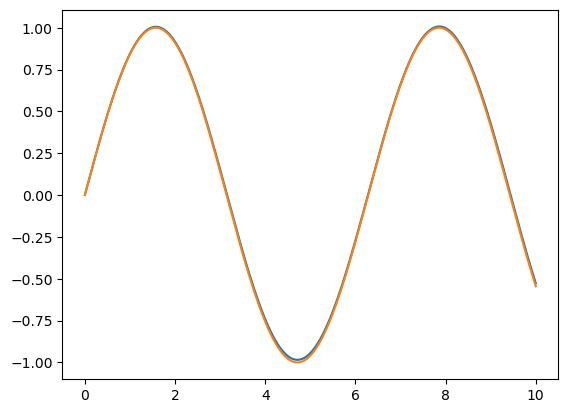

In [57]:
t_test=np.linspace(0,10,200).reshape(200,1)
pt_t_test = Variable(torch.from_numpy(t_test).float(), requires_grad=False).to(device)
u_test=model(pt_t_test)
plt.plot(t_test,u_test.detach().numpy())
plt.plot(t_test, np.sin(t_test))